In [1]:
import pandas

In [2]:
from pyspark.sql import functions as f

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
spark

In [5]:
traces =(spark.read
              .option('mergeSchema', 'true')
              .parquet('data/*.parquet'))

In [6]:
def filterSelfDurations(cols):
    return list(filter(lambda c:c.endswith('avg_self_dur'), traces.columns))

In [7]:
def filterFullDurations(cols):
    return list(filter(lambda c:c.endswith('avg_dur'), traces.columns))

In [8]:
pd_traces = traces.toPandas()

In [9]:
print(traces.count())

296869


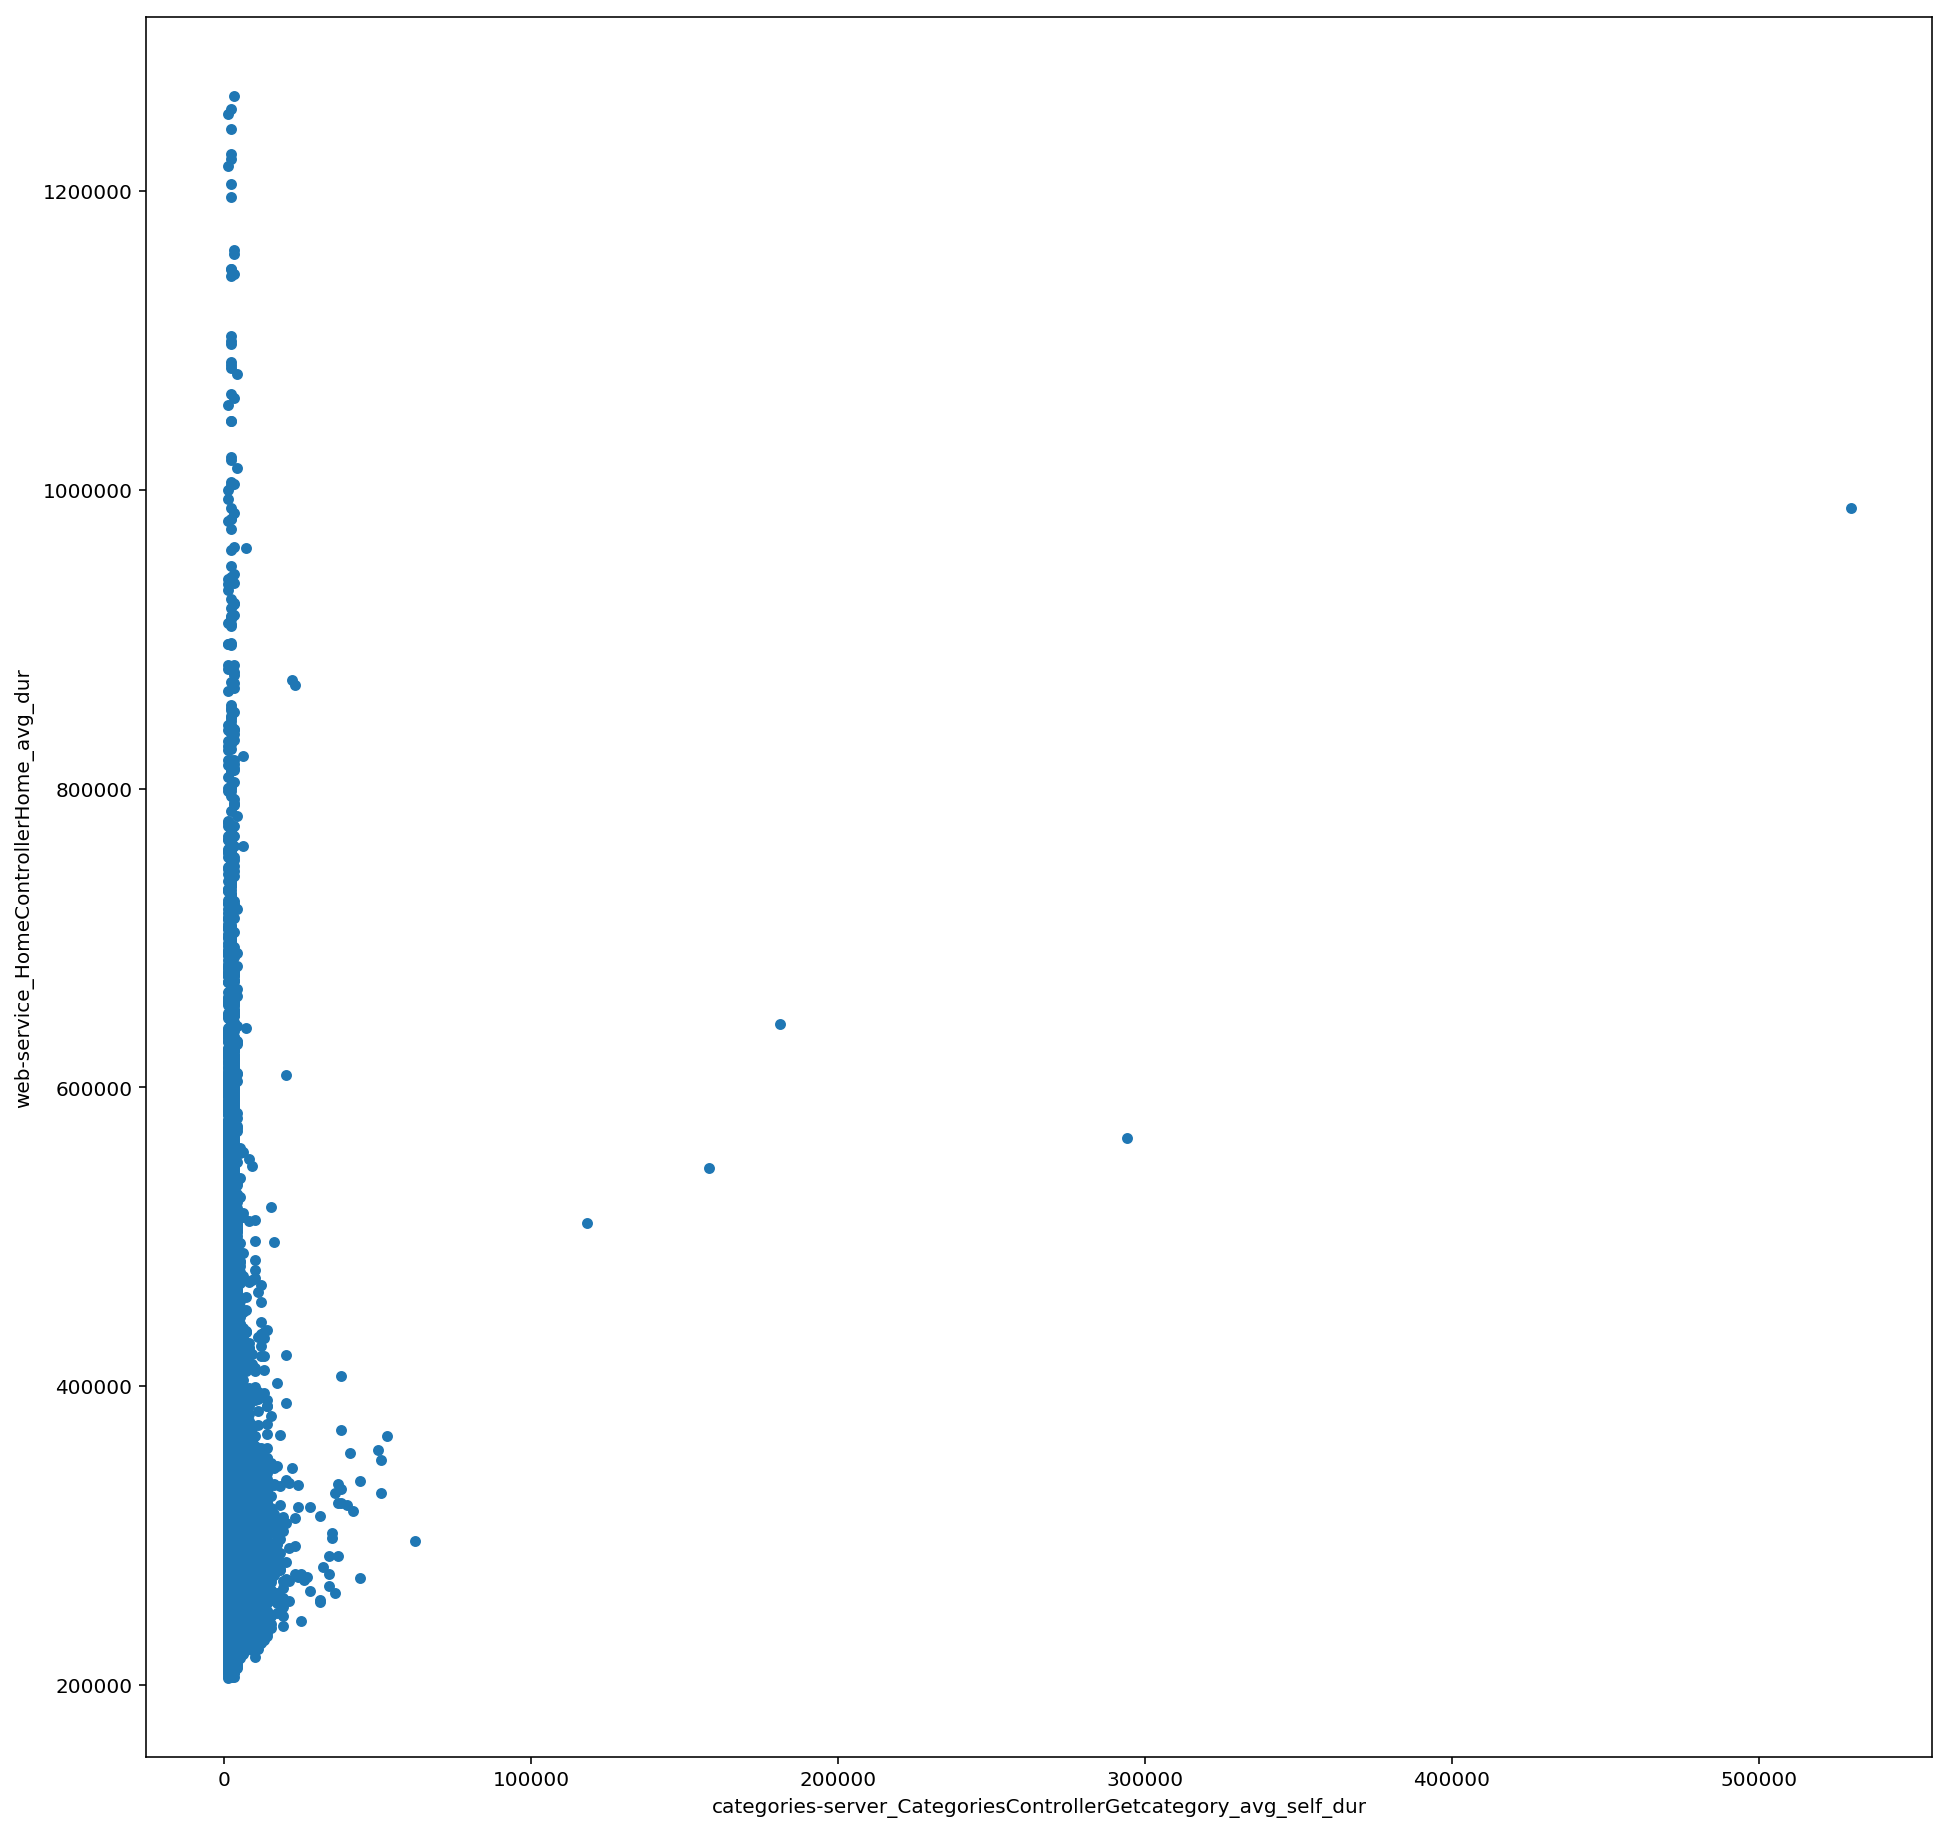

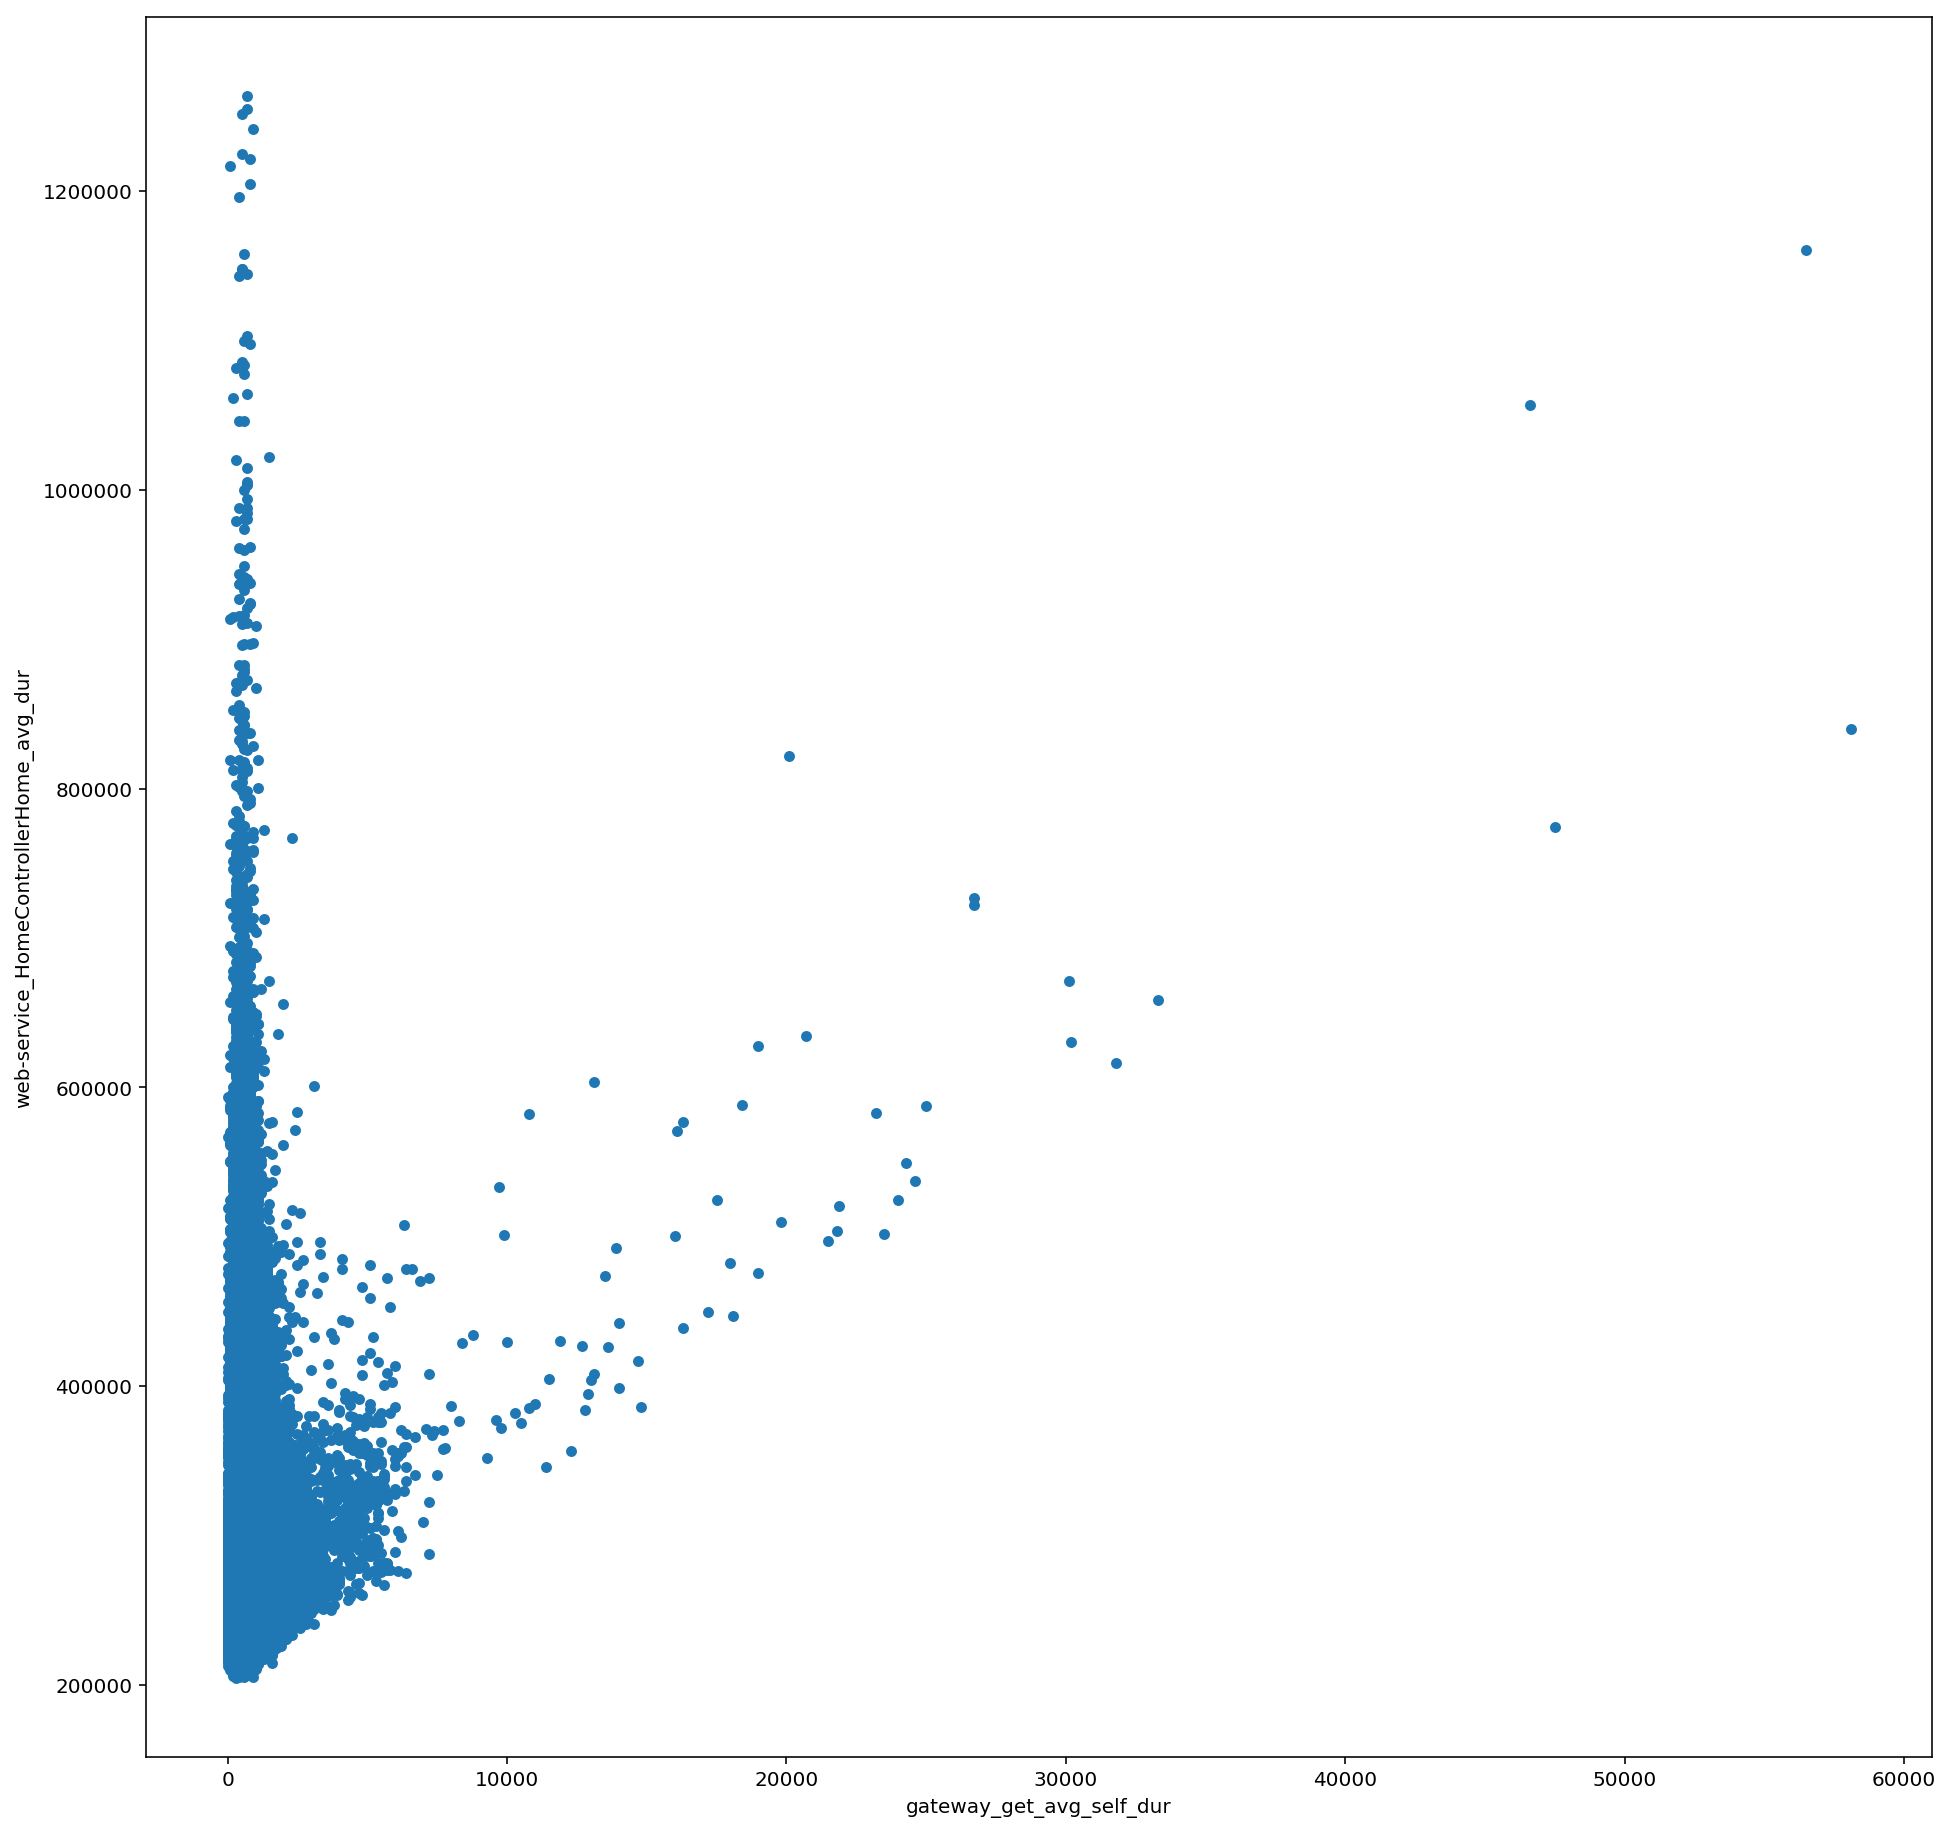

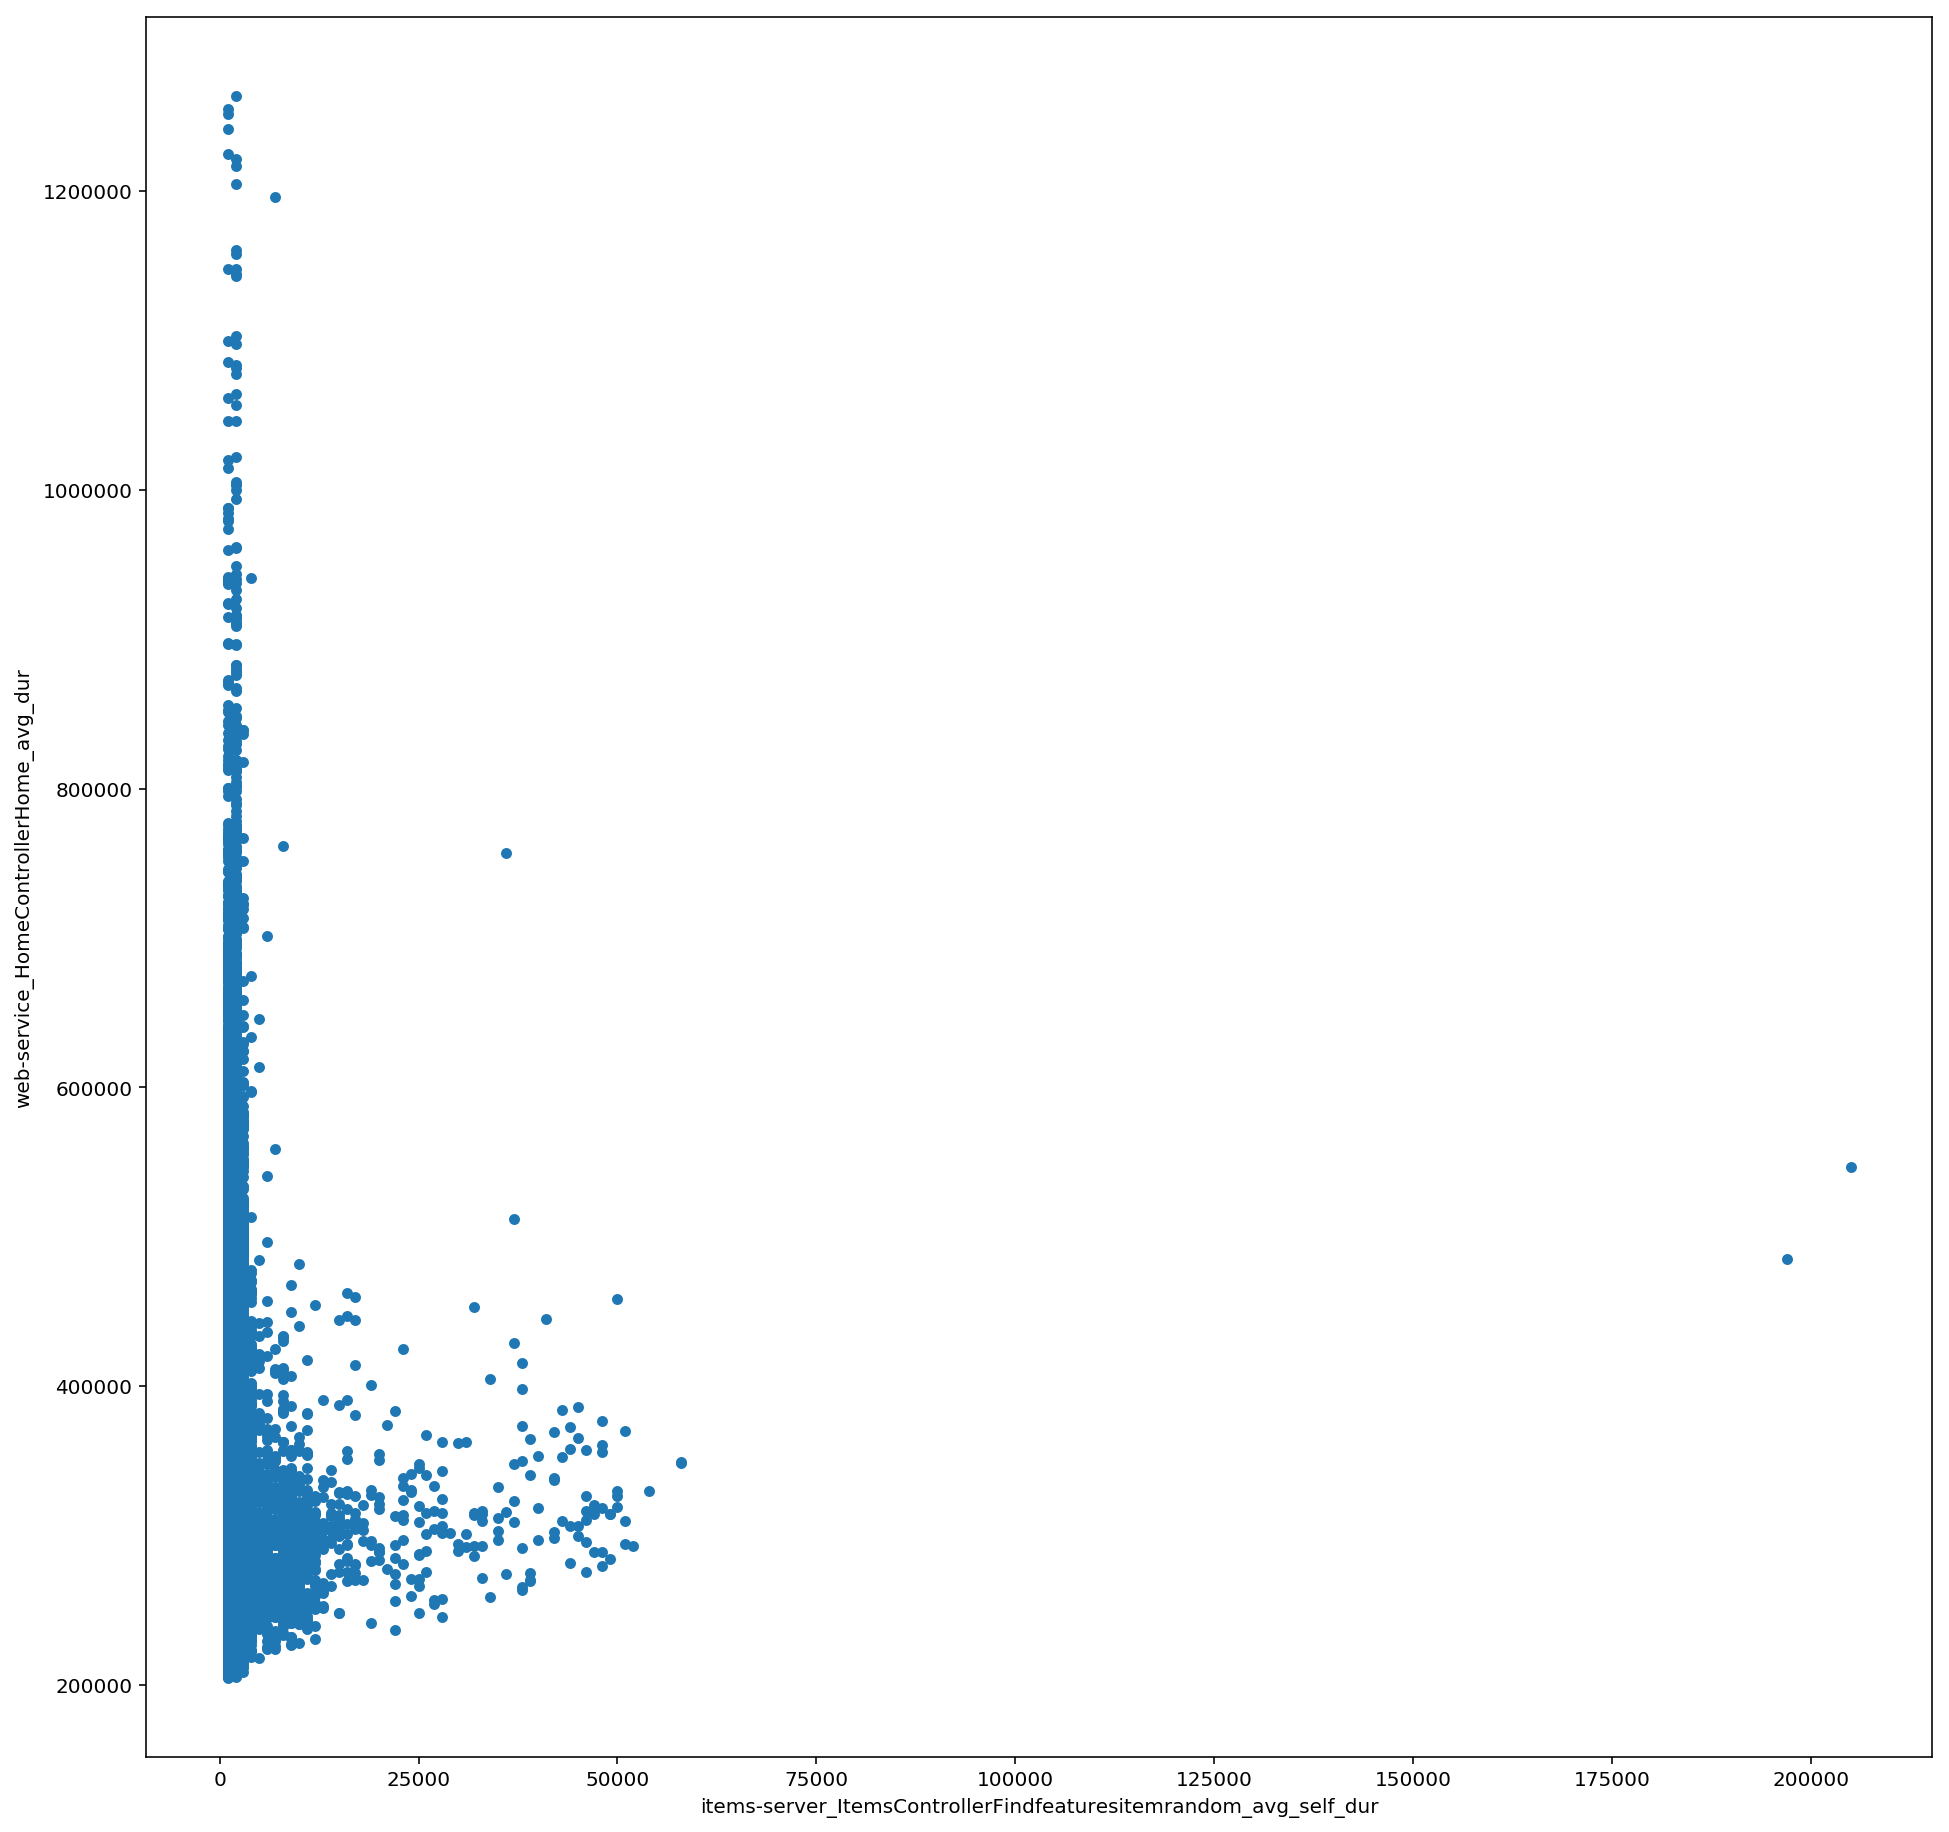

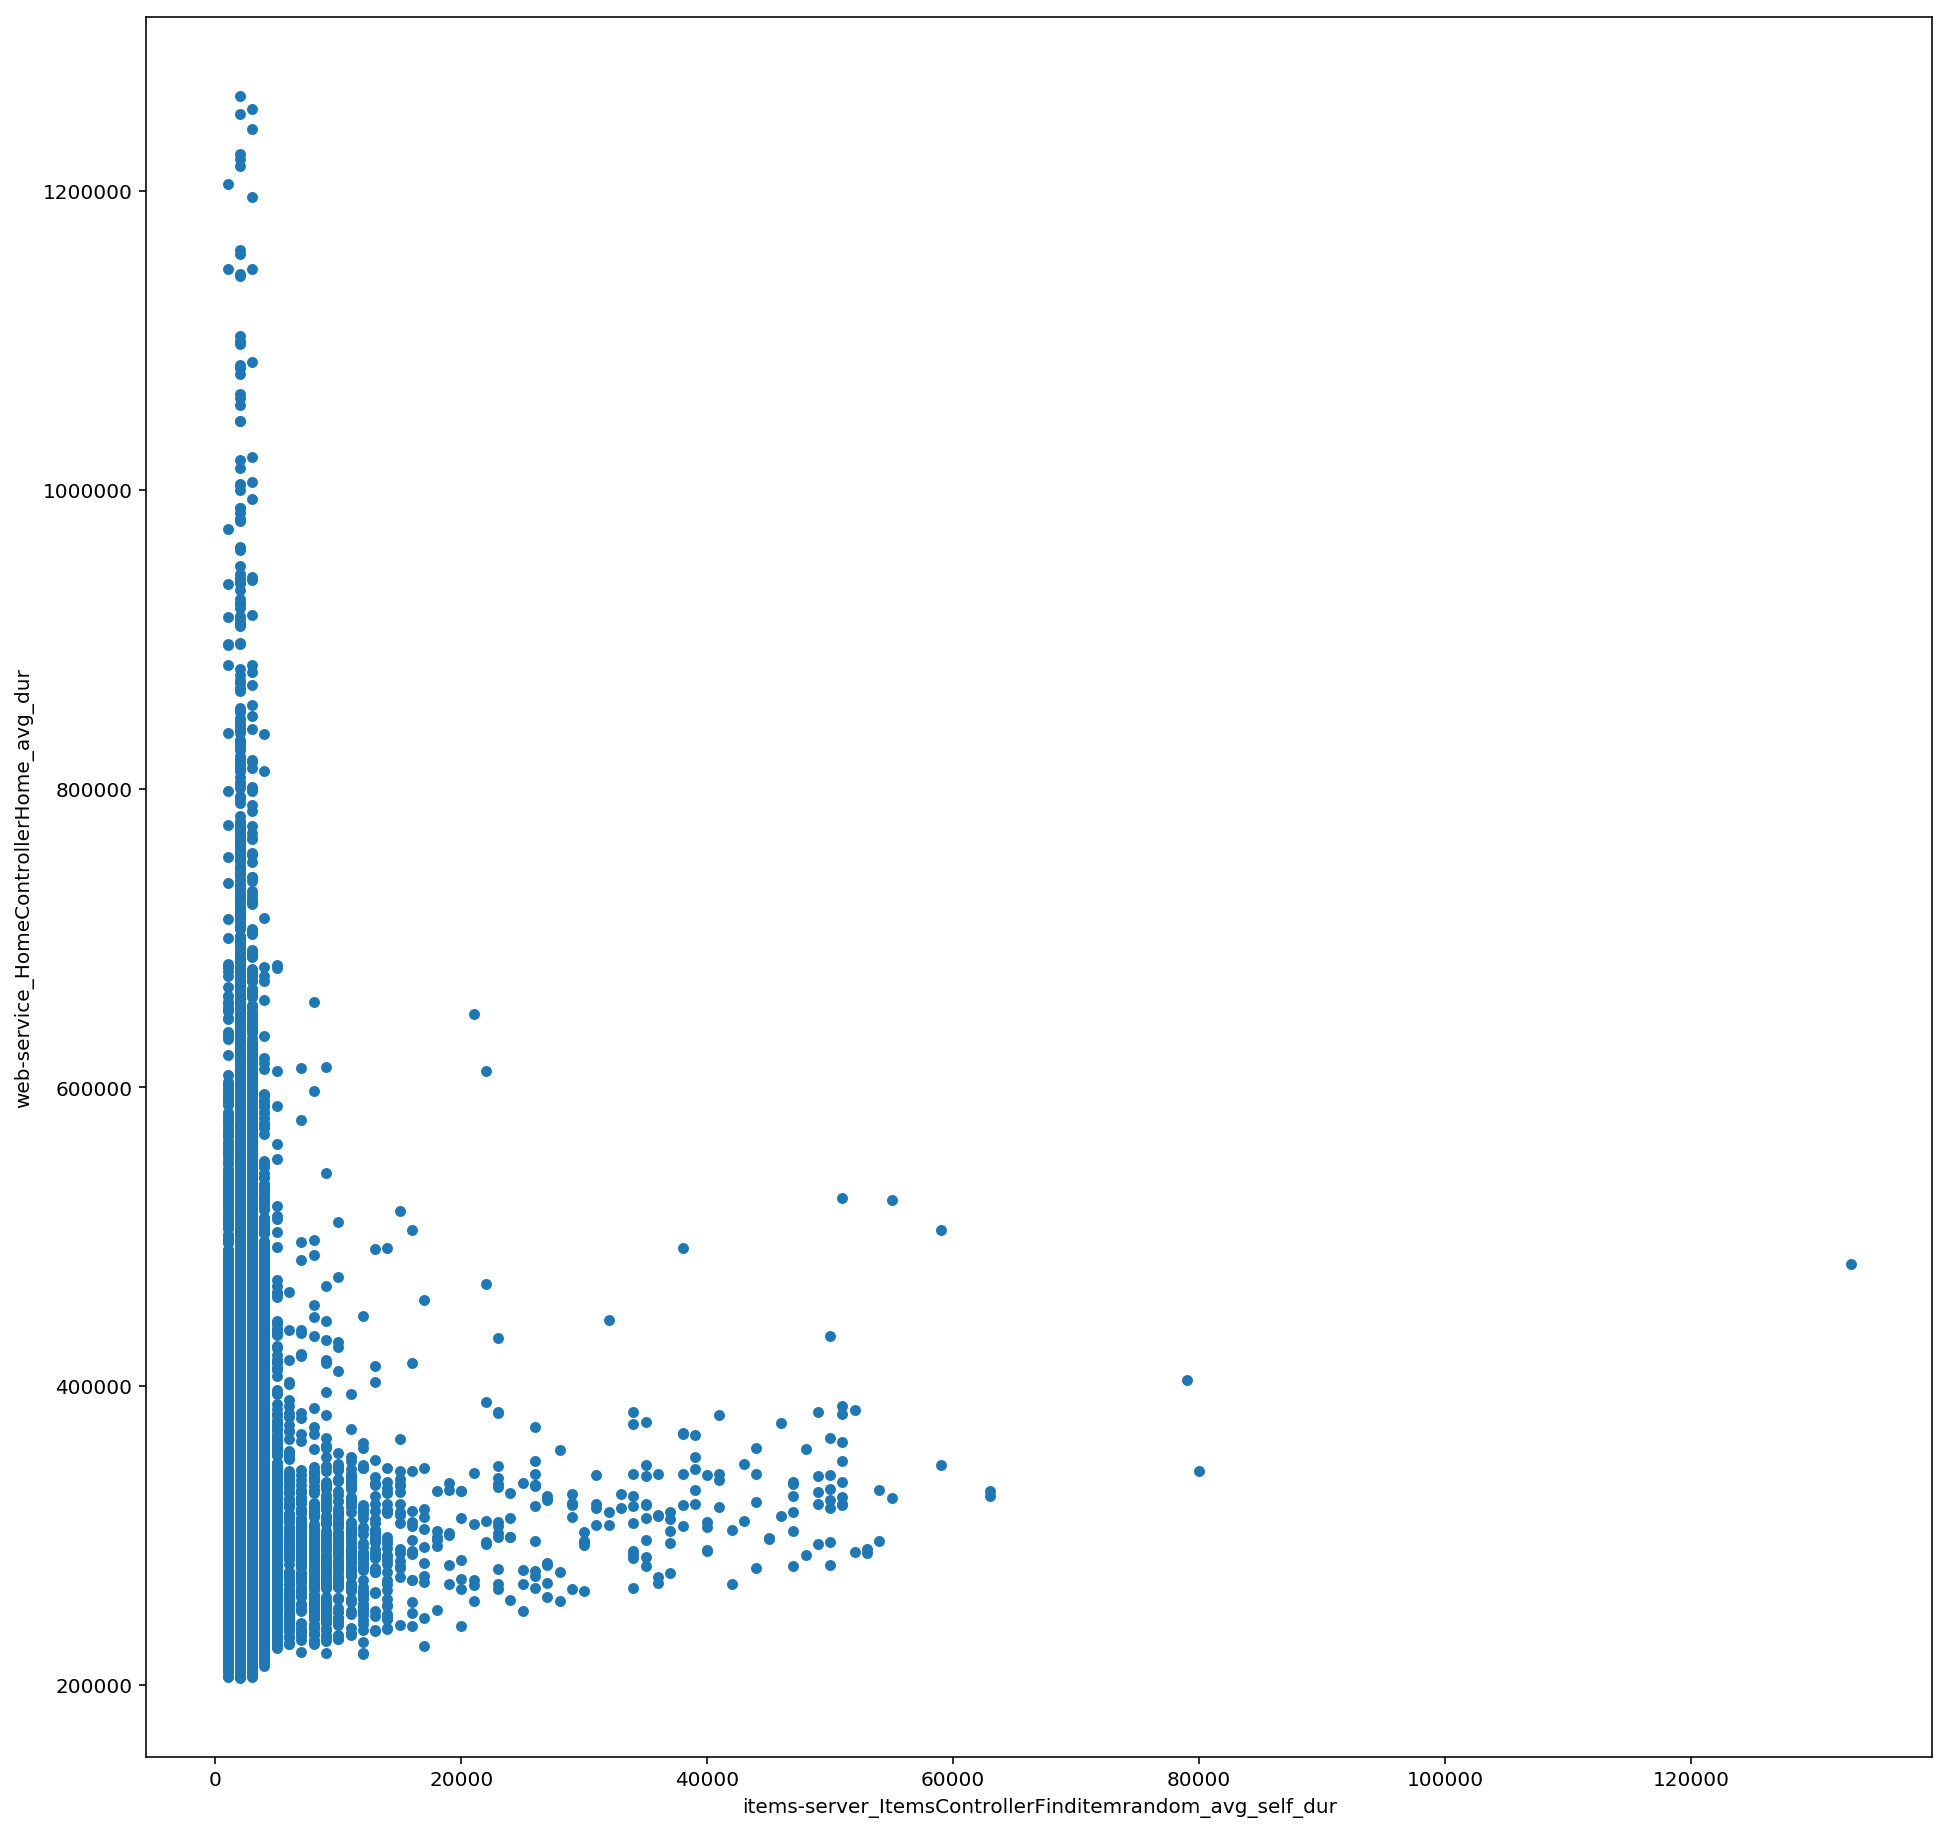

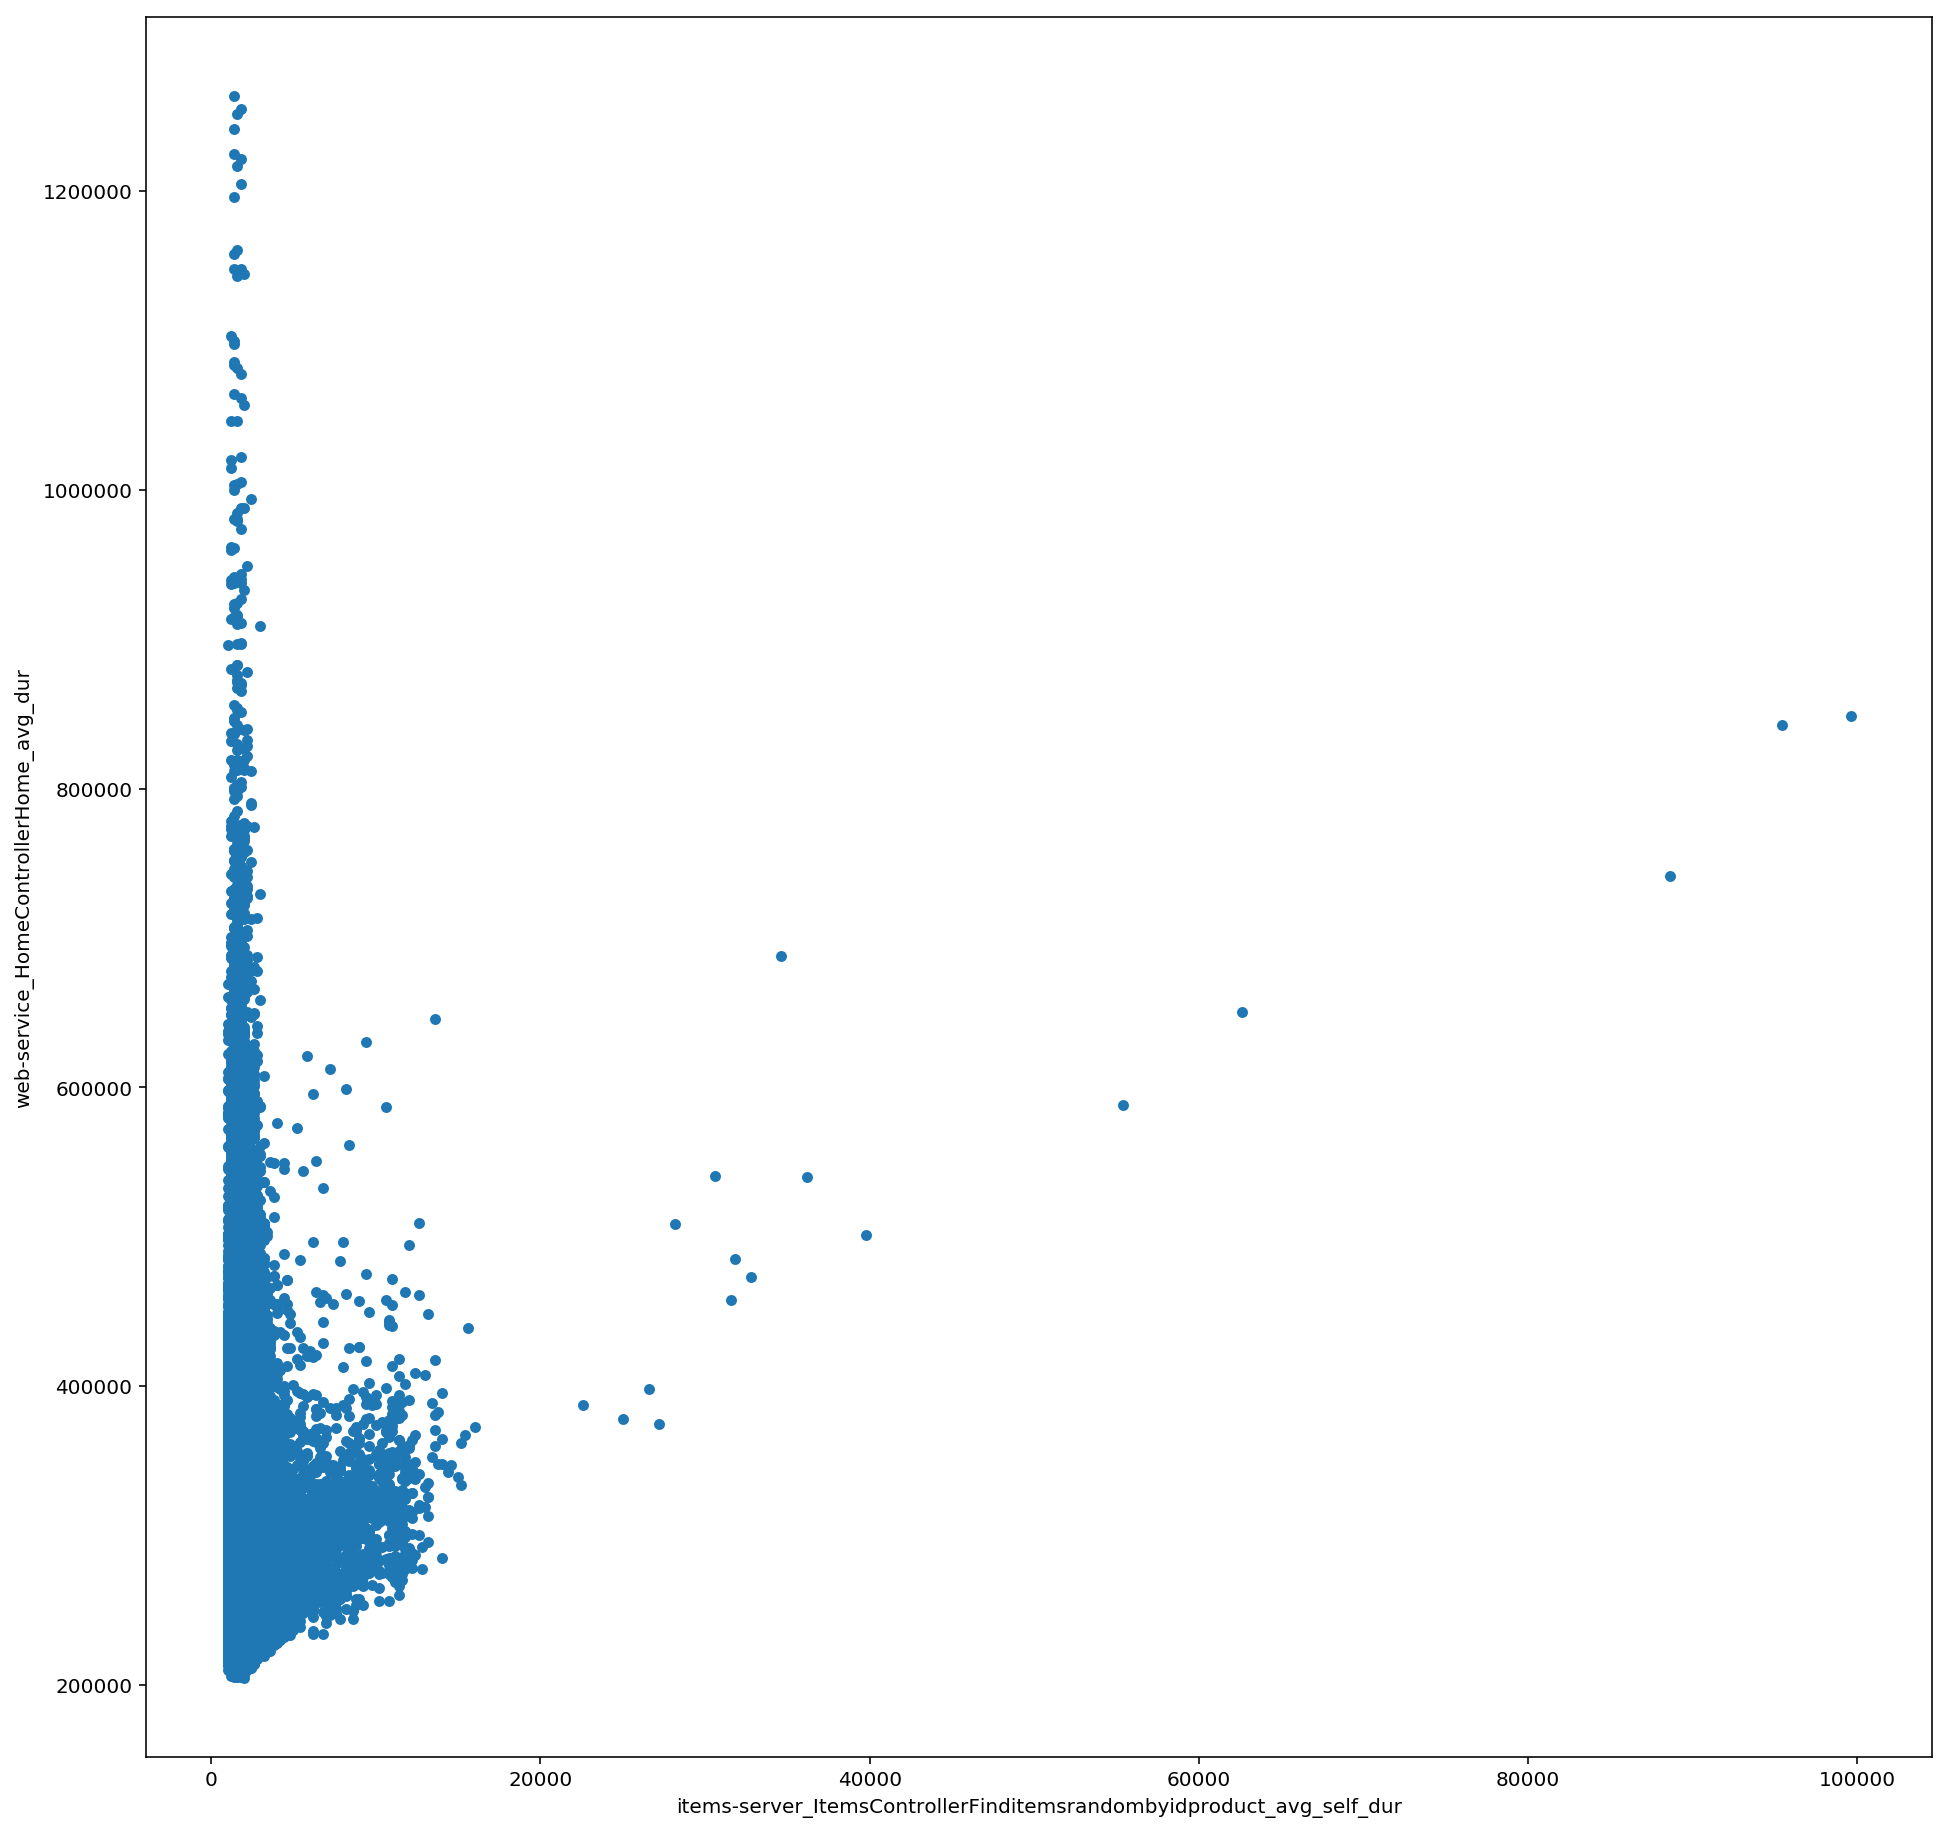

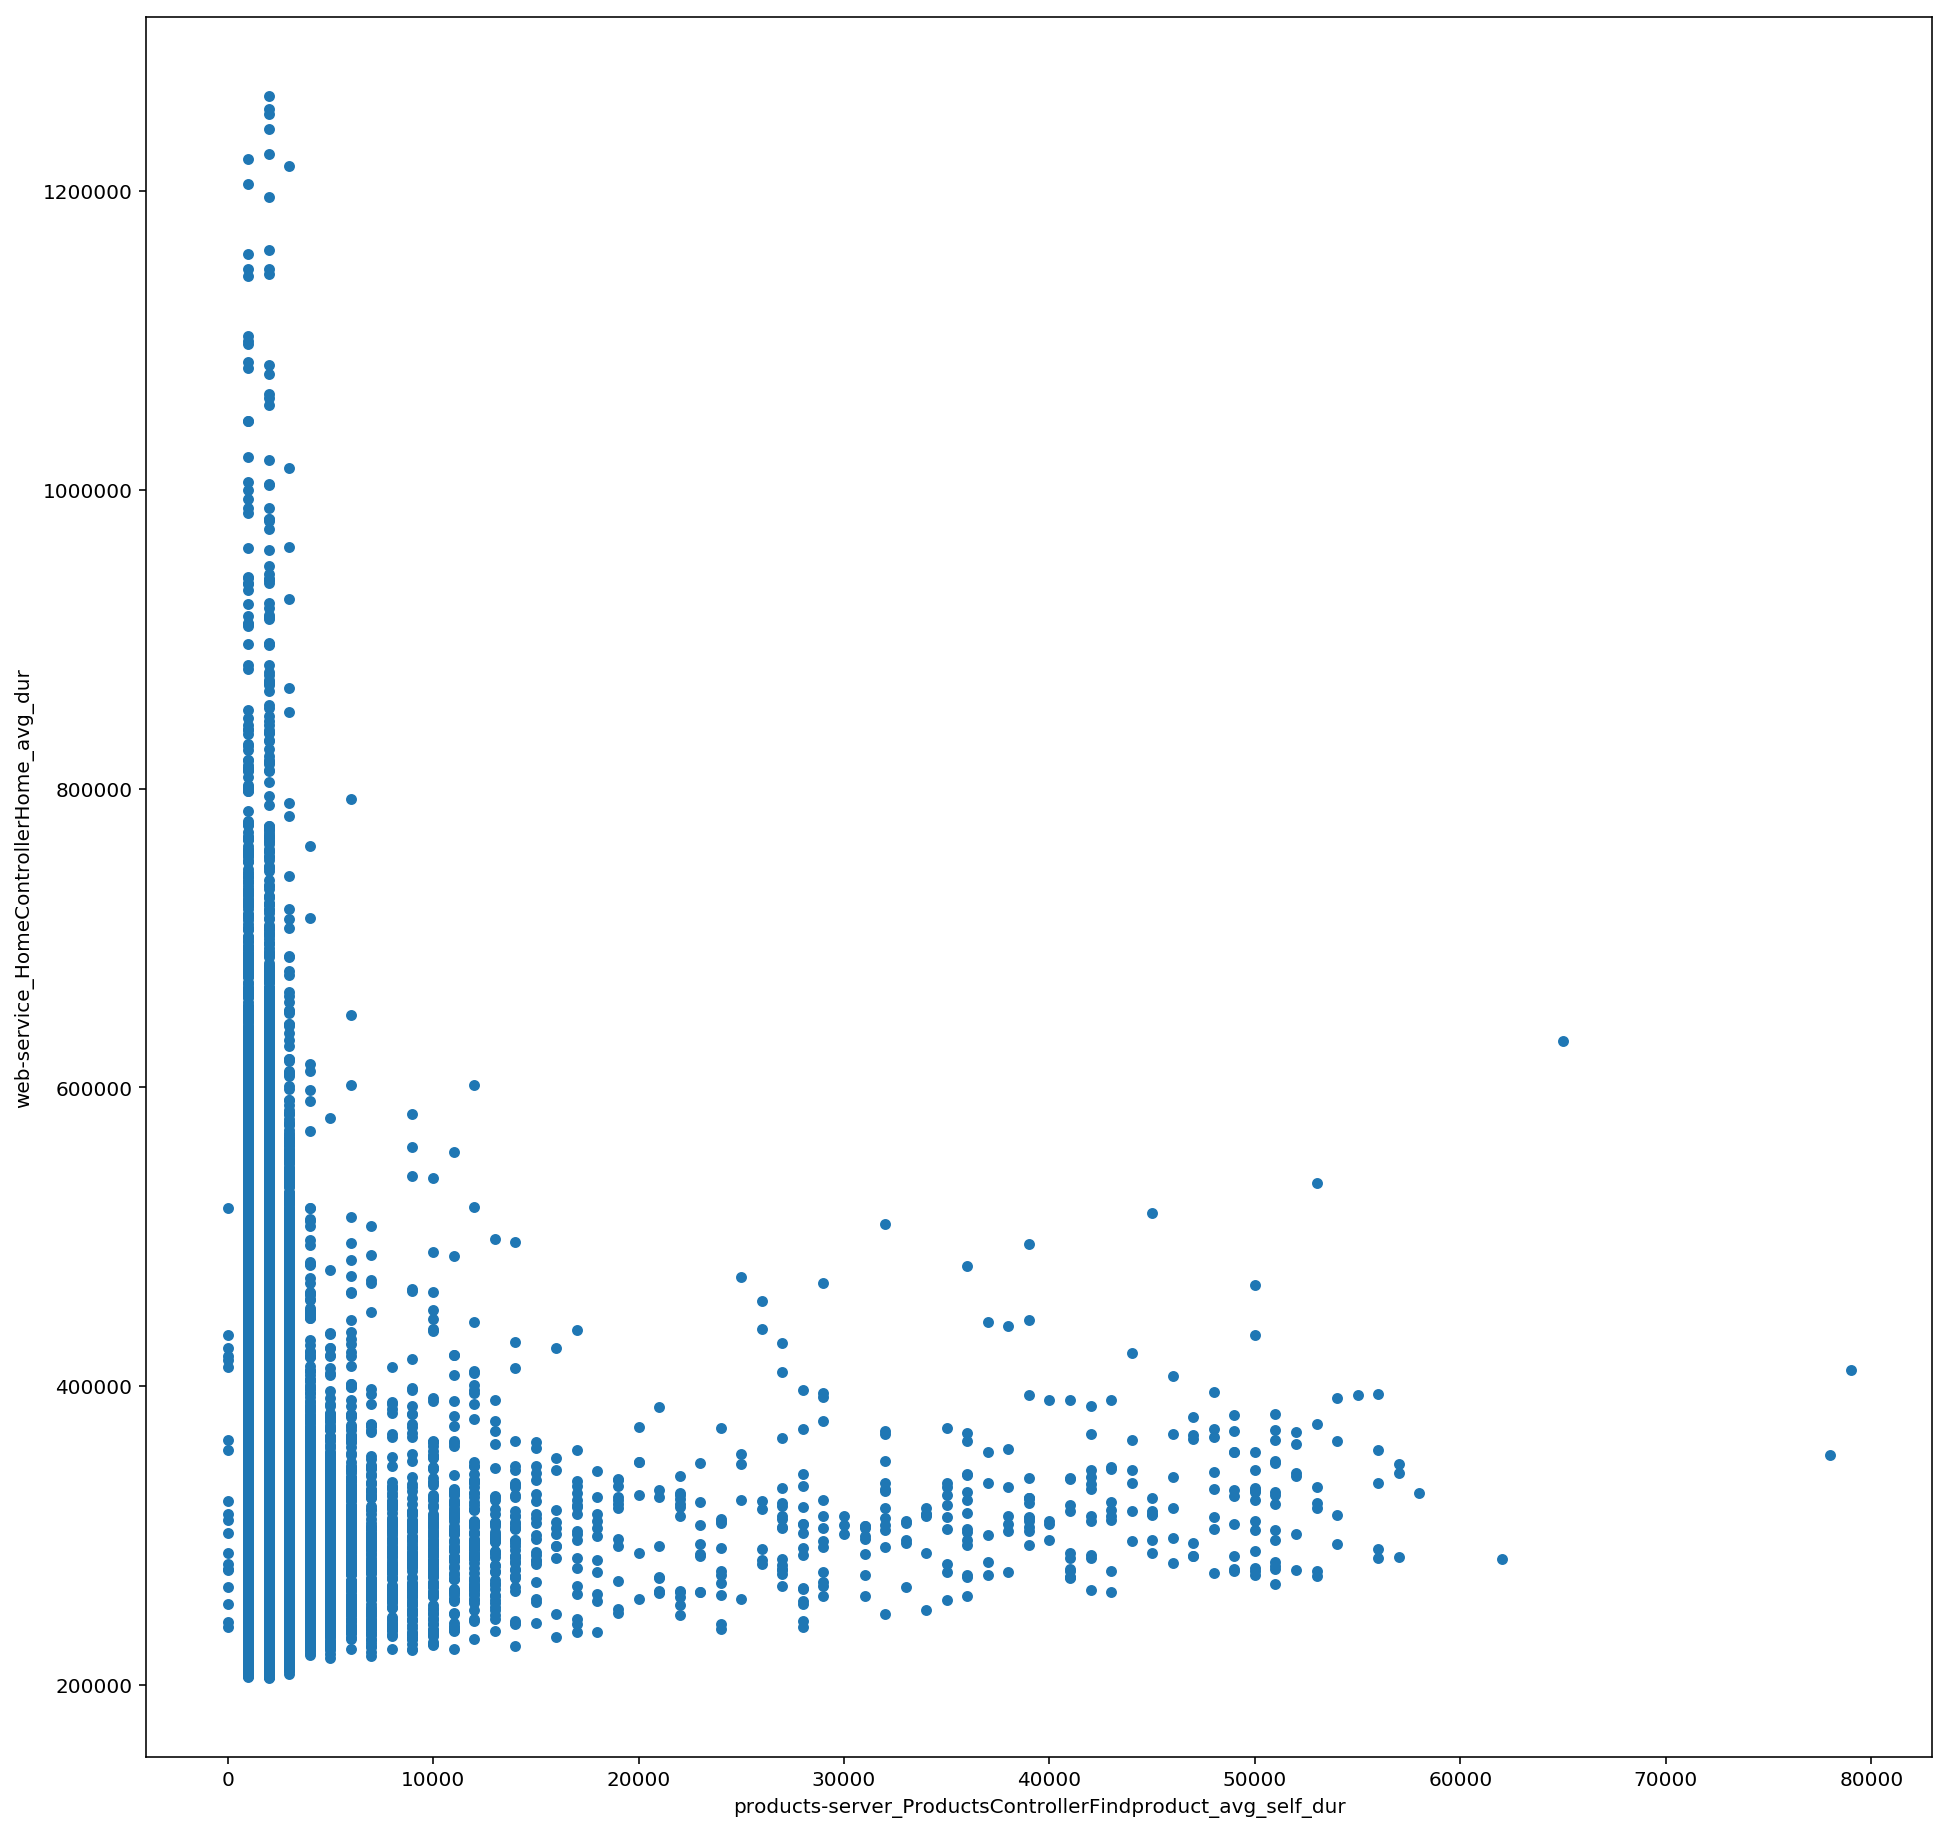

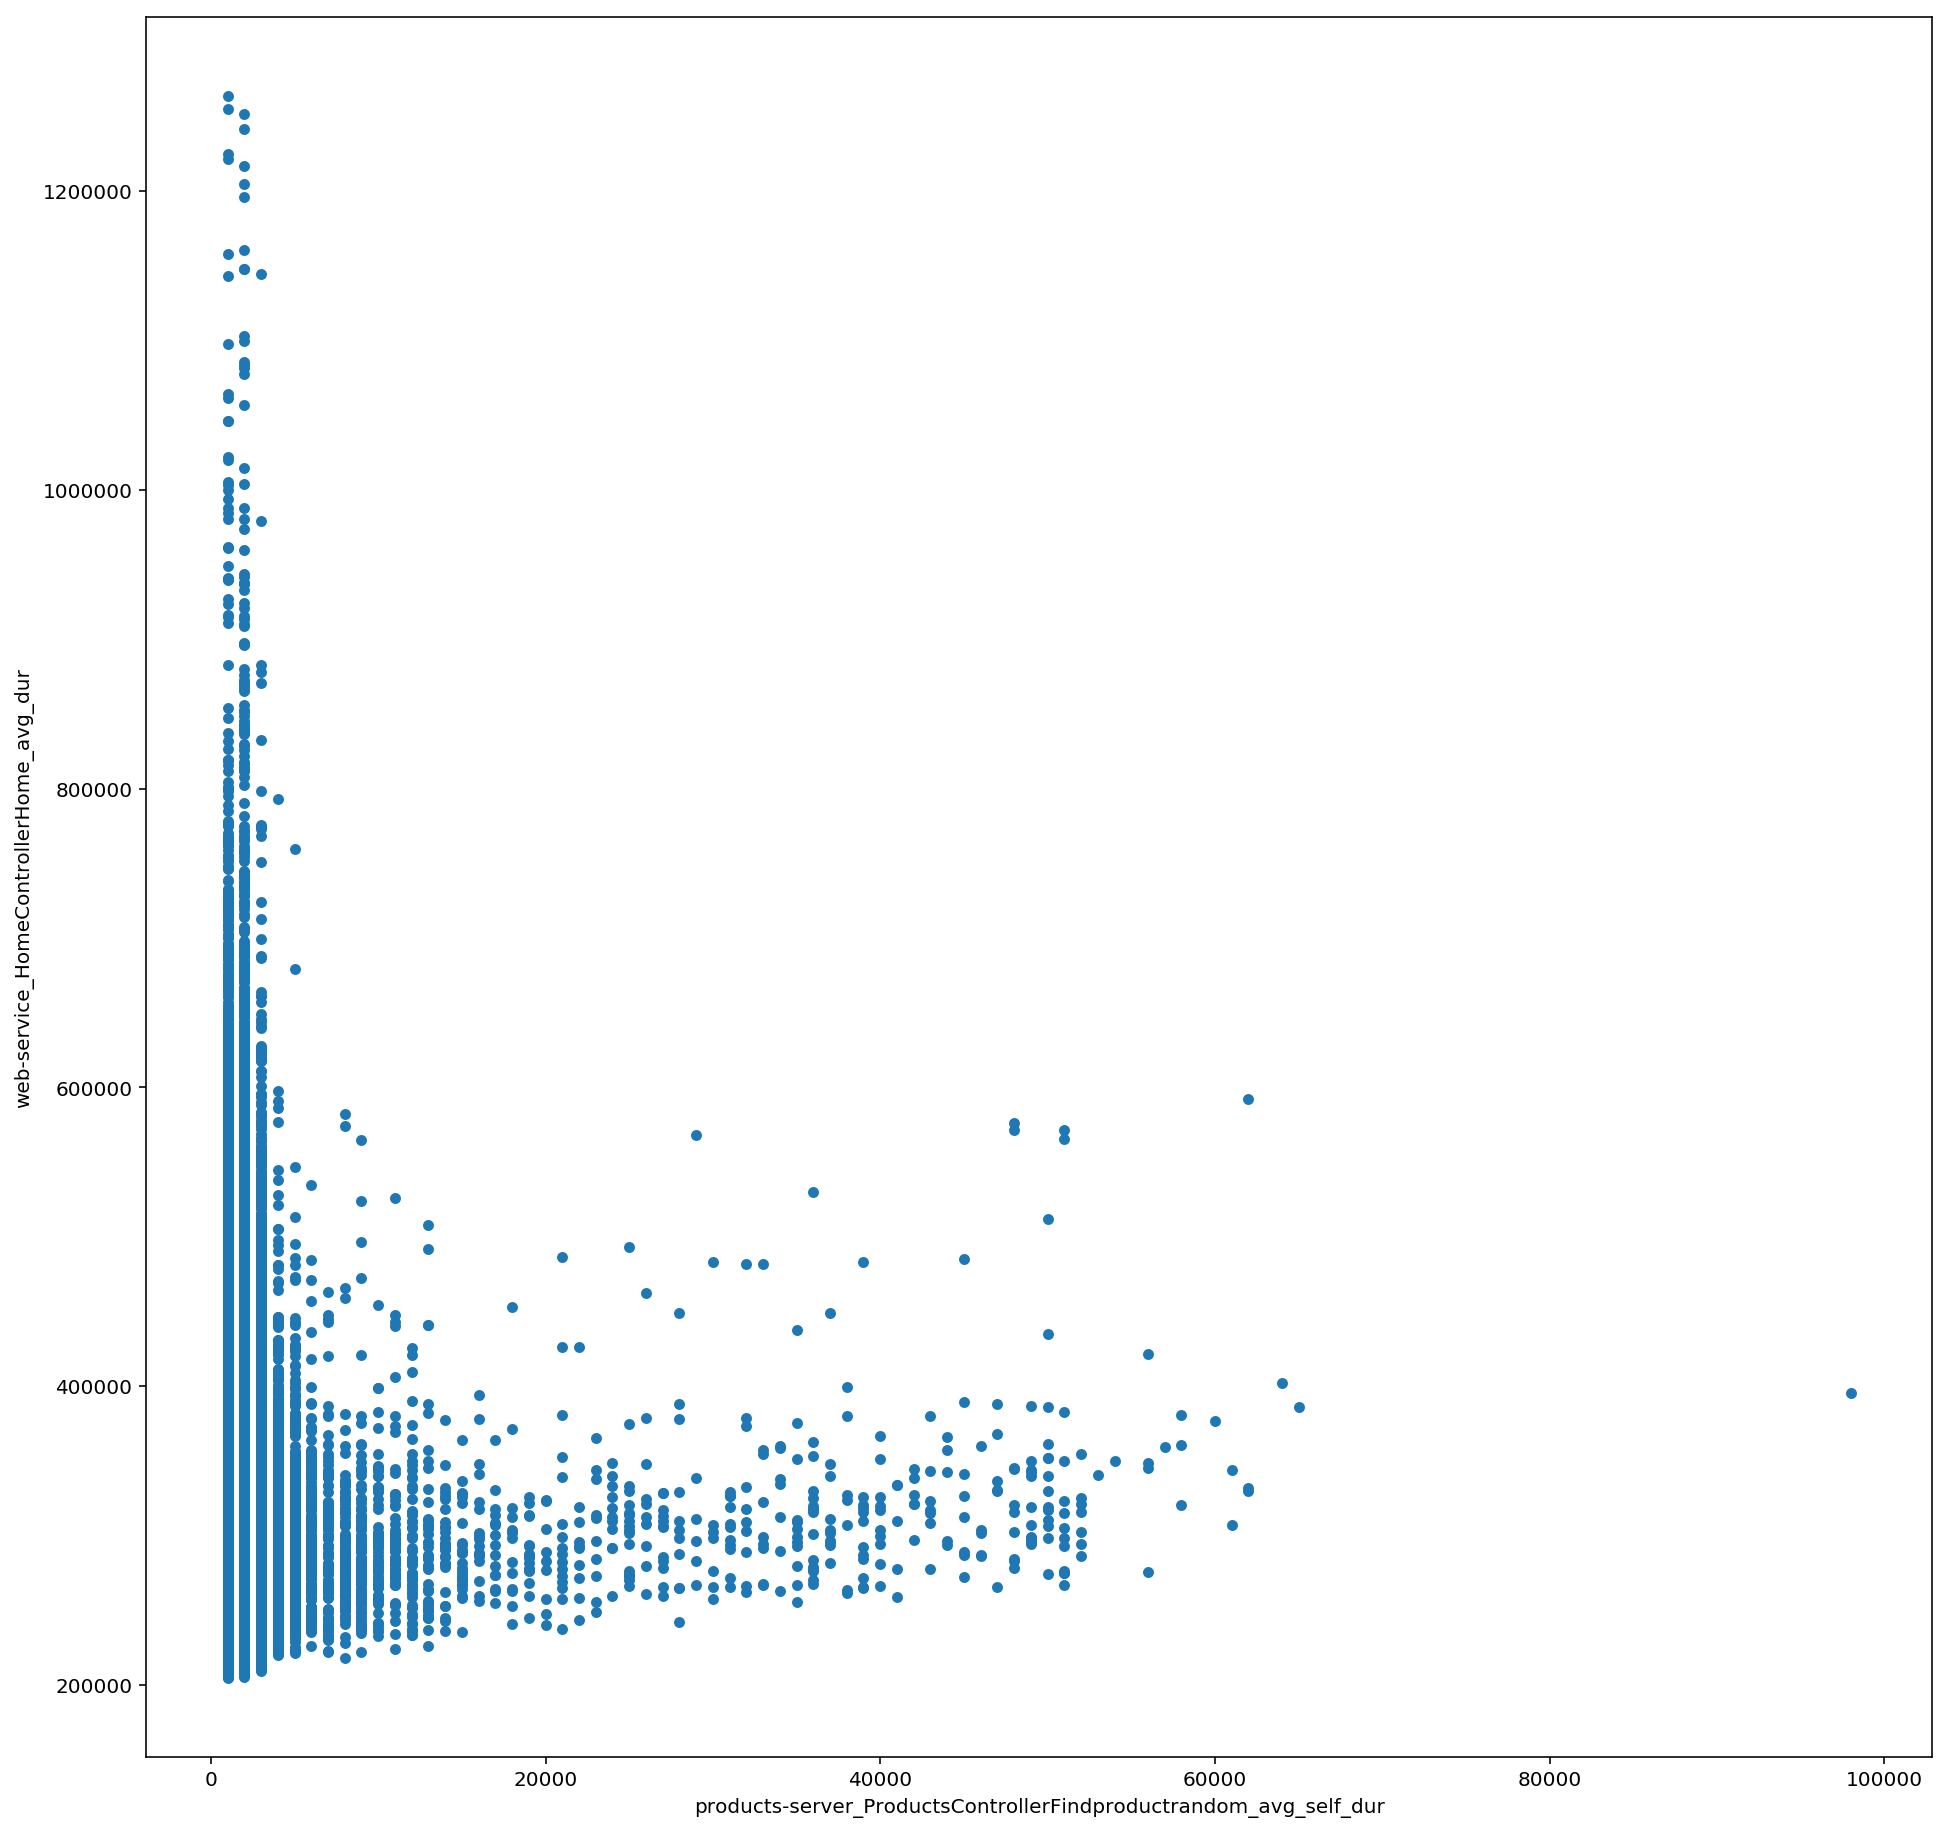

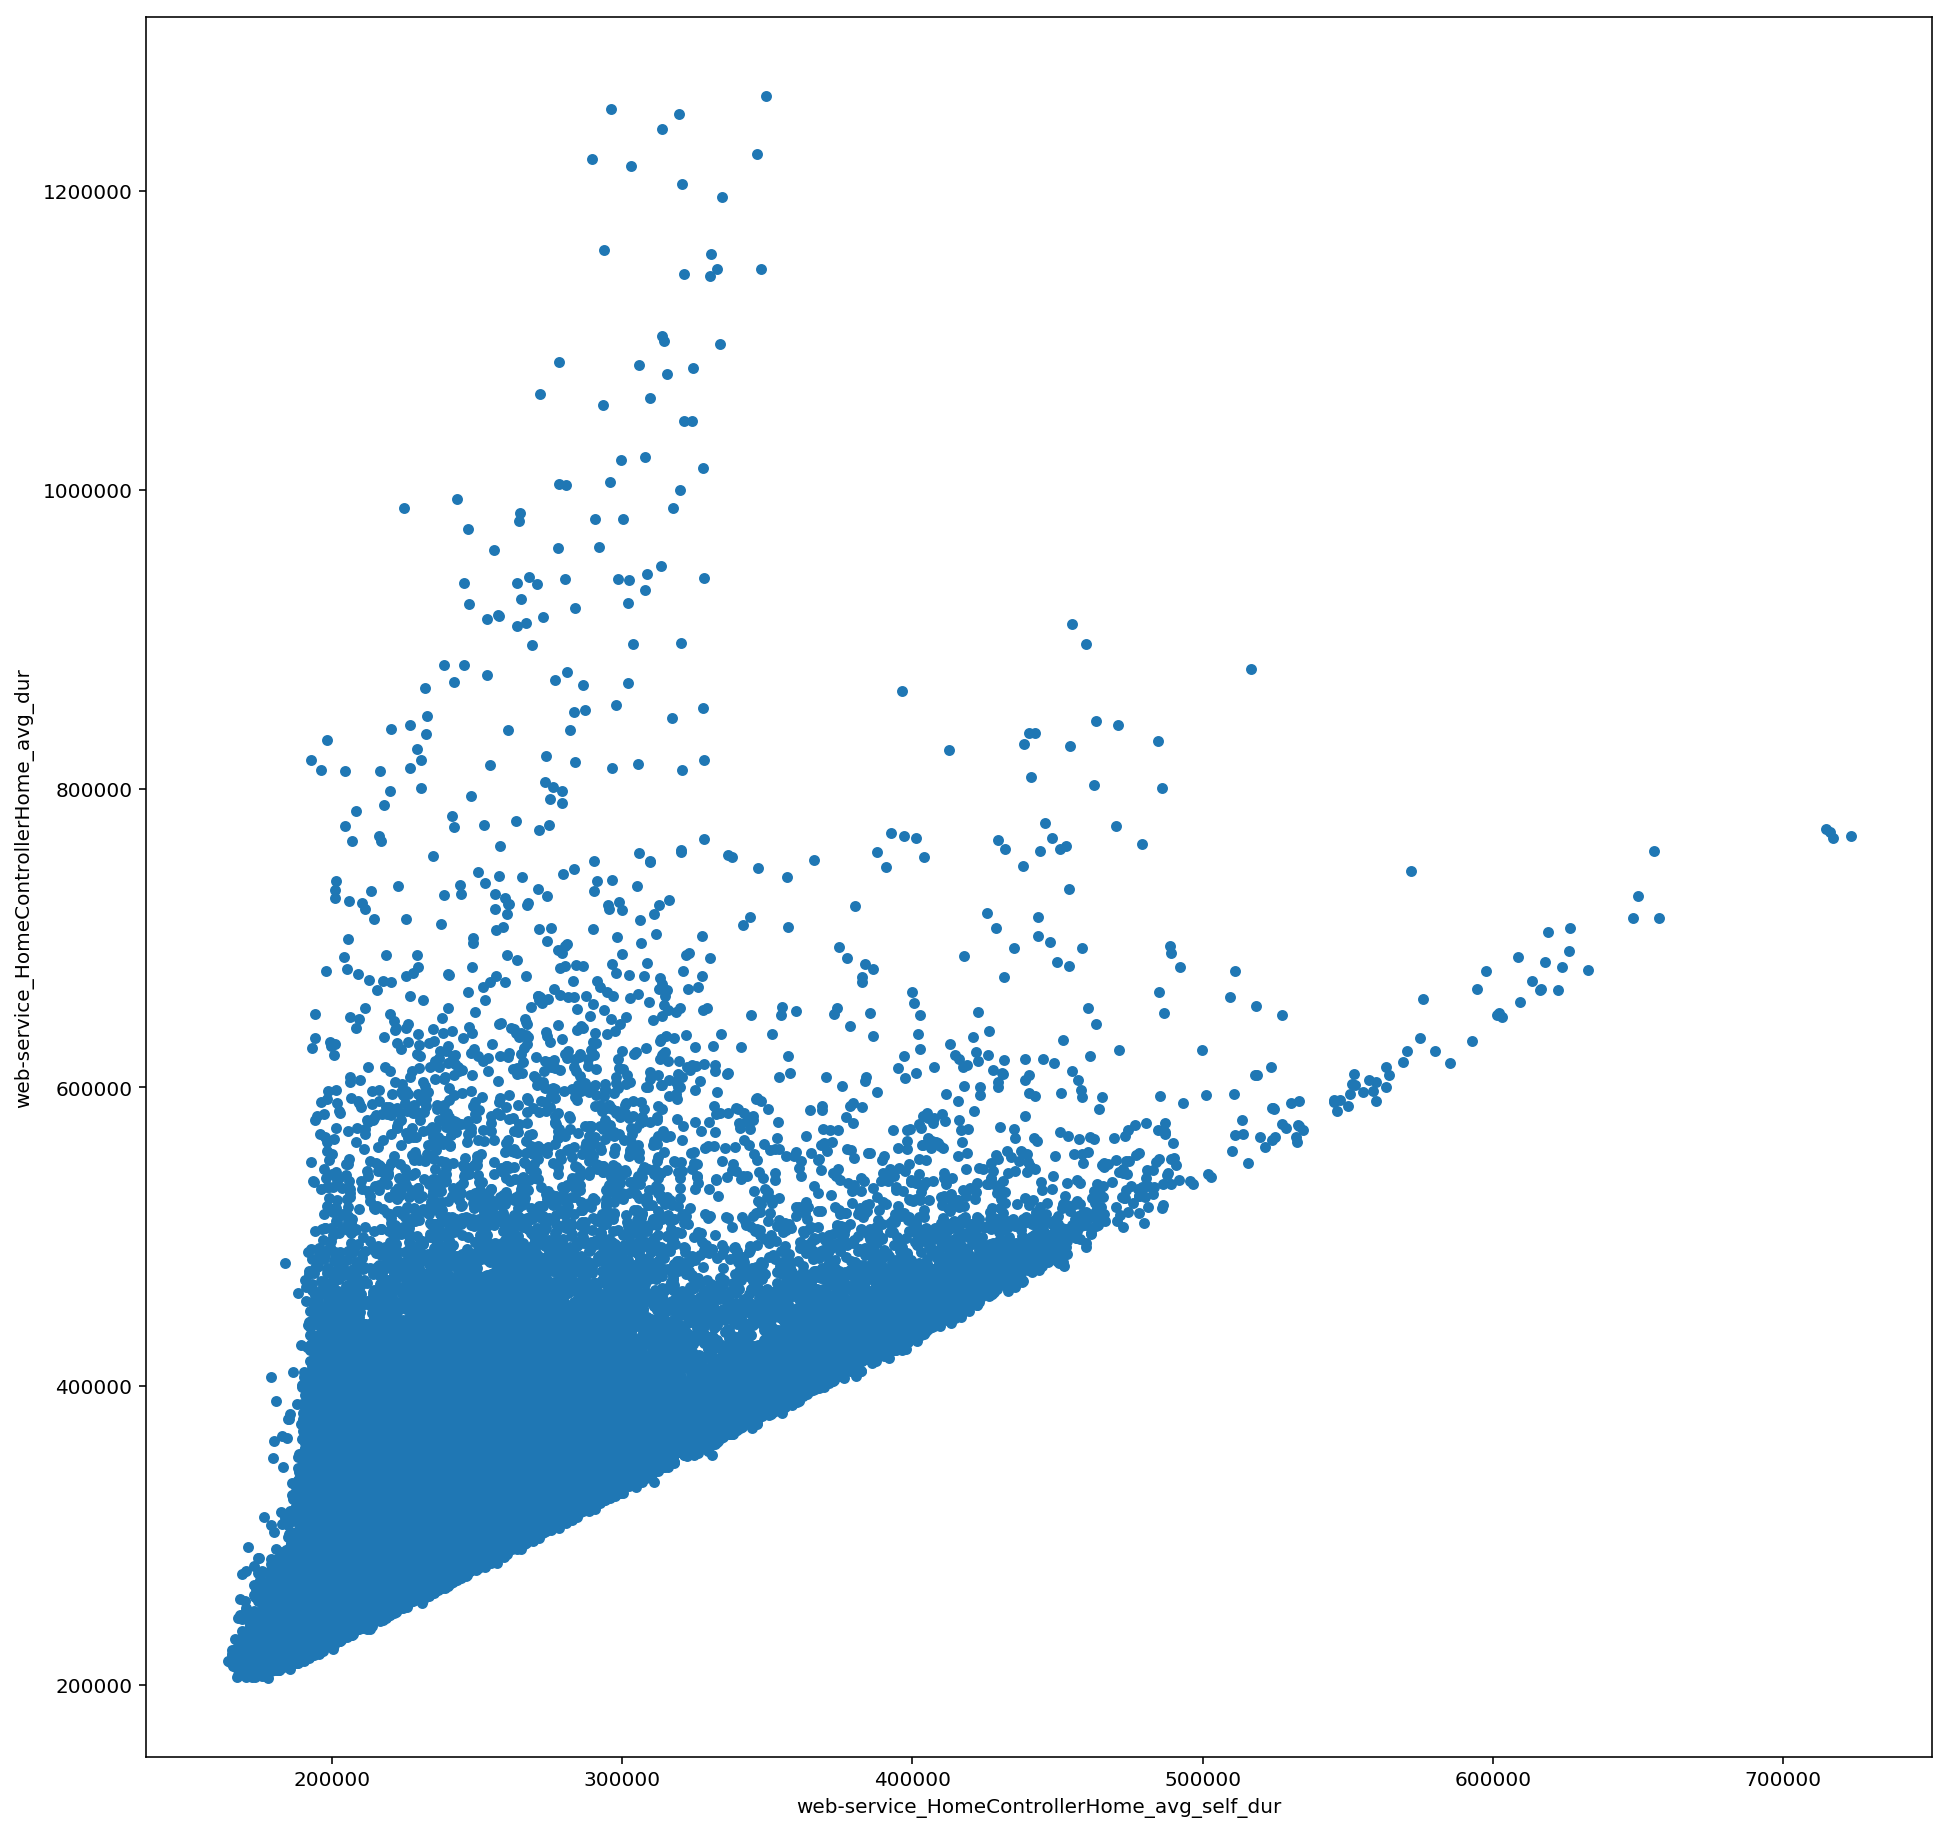

In [10]:
plt.rcParams['figure.figsize'] = (16,16)
for c in filterSelfDurations(traces.columns):
        pd_traces.plot.scatter(x=c, y='web-service_HomeControllerHome_avg_dur');

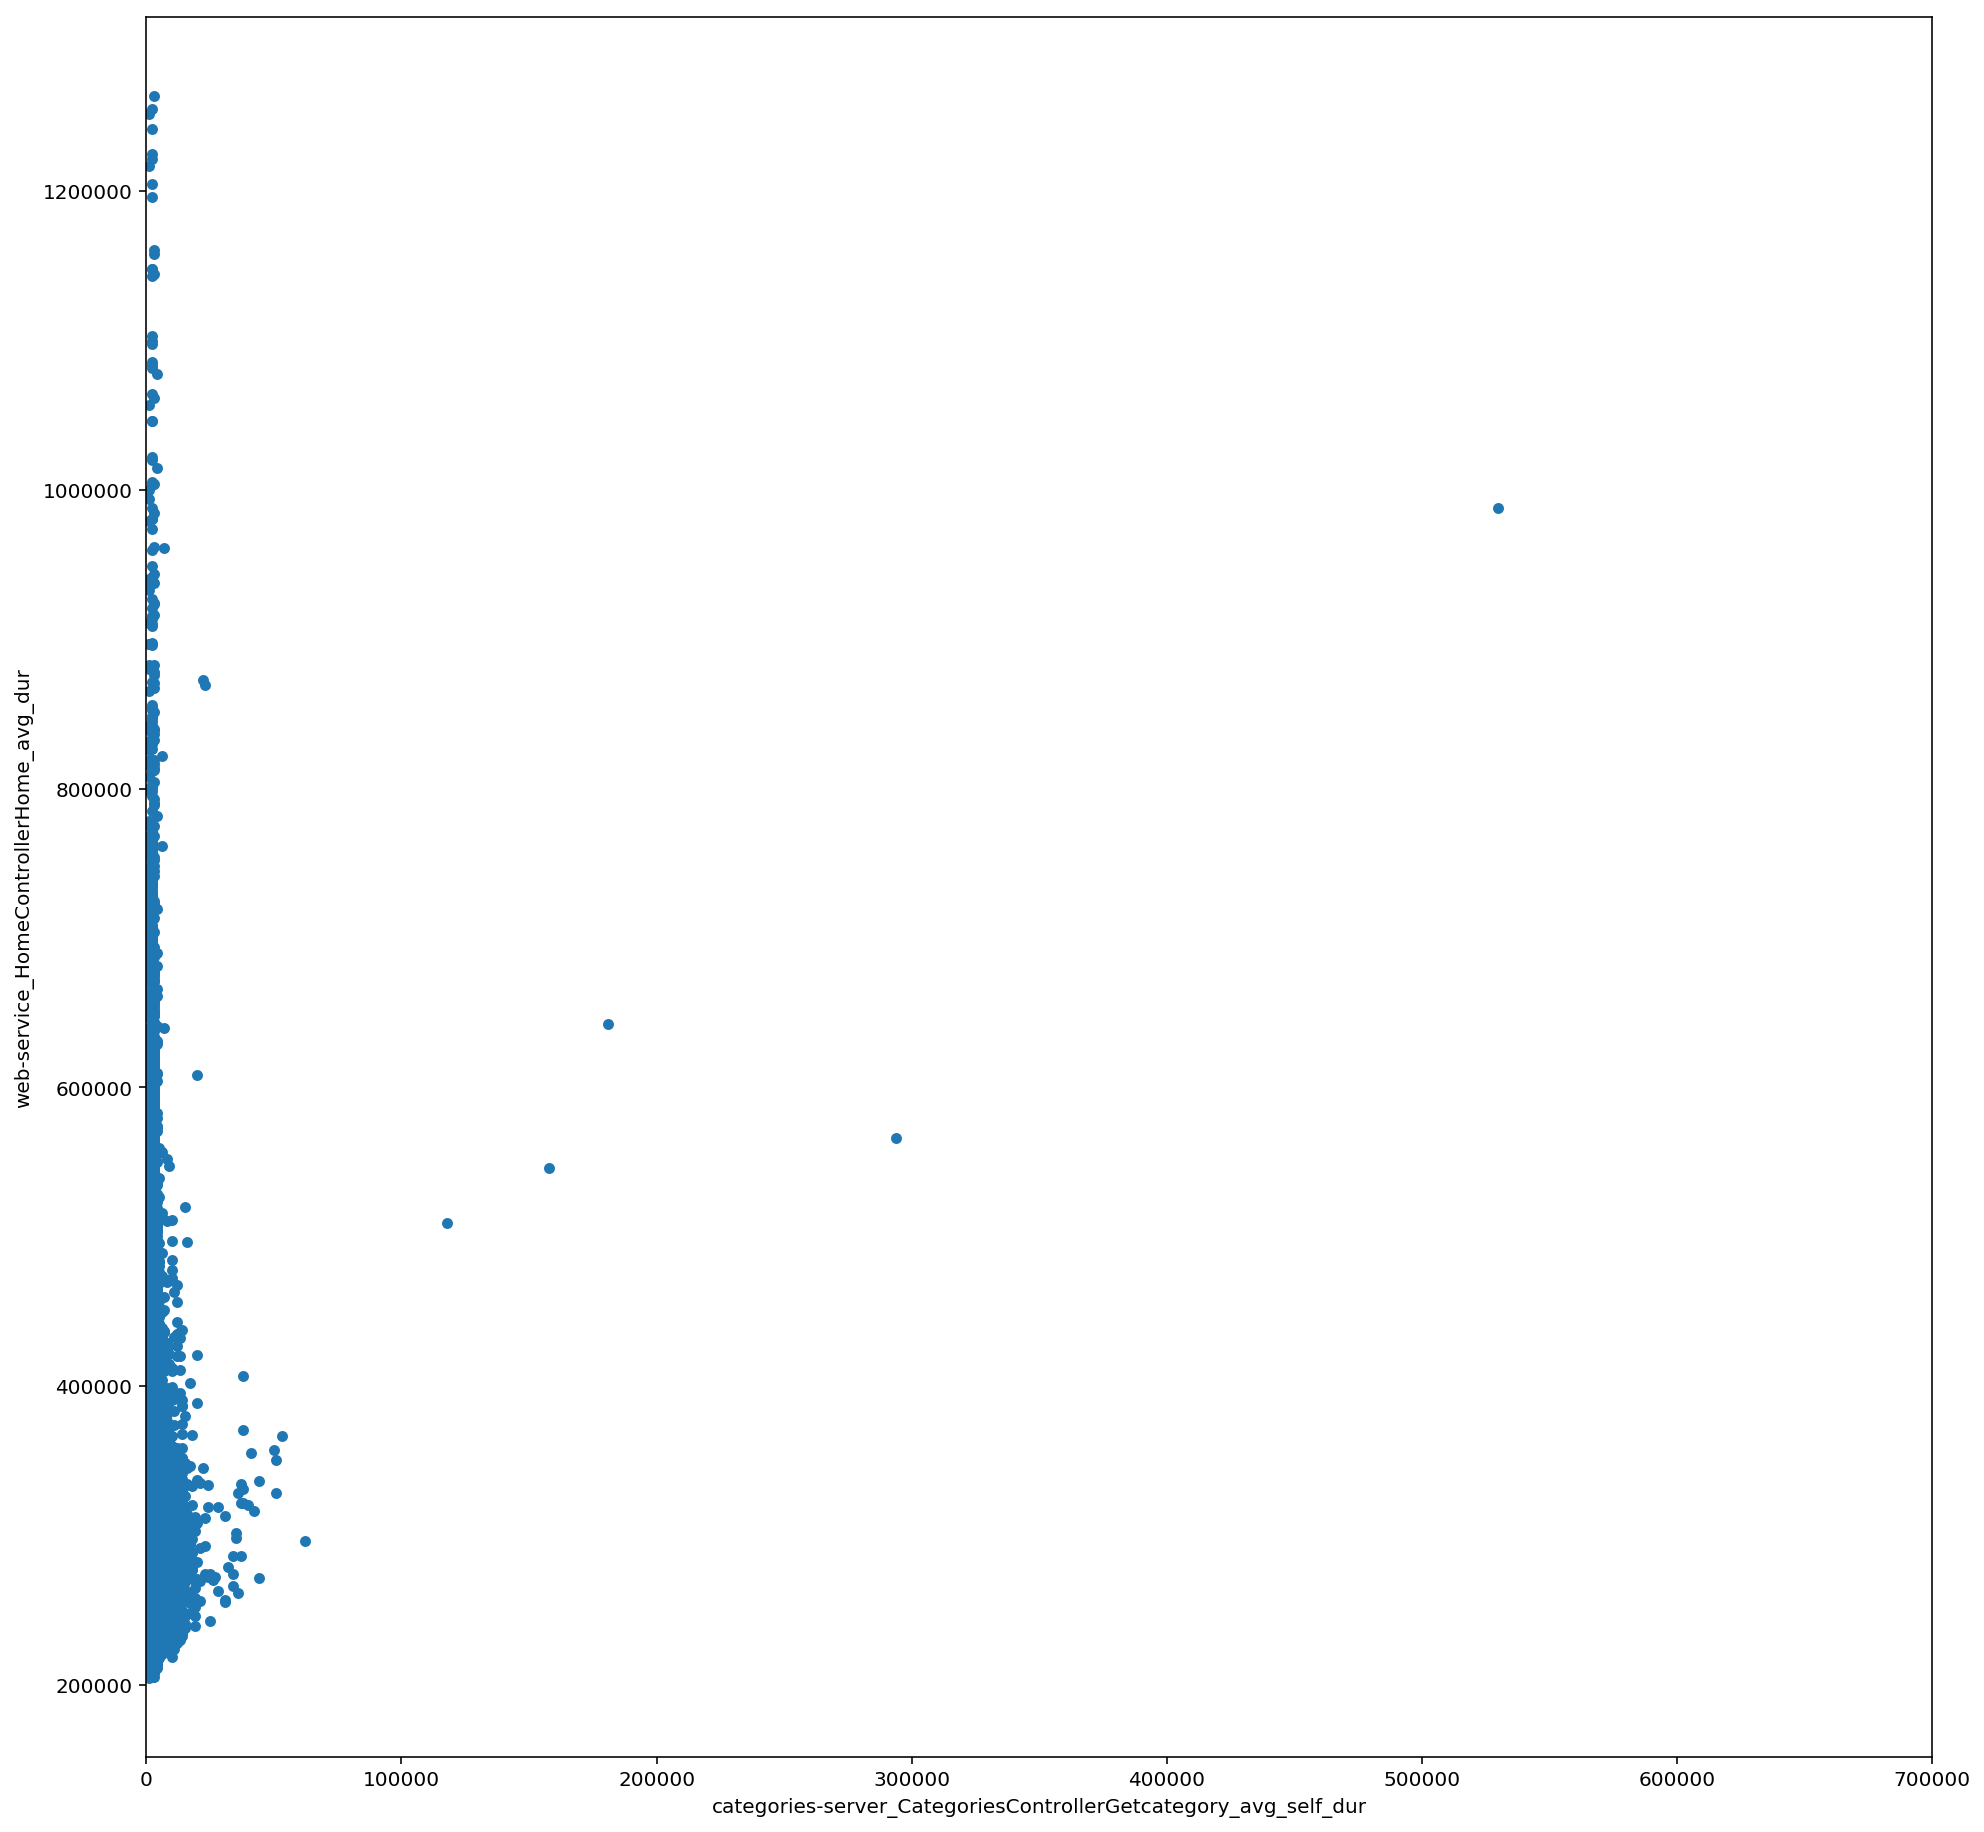

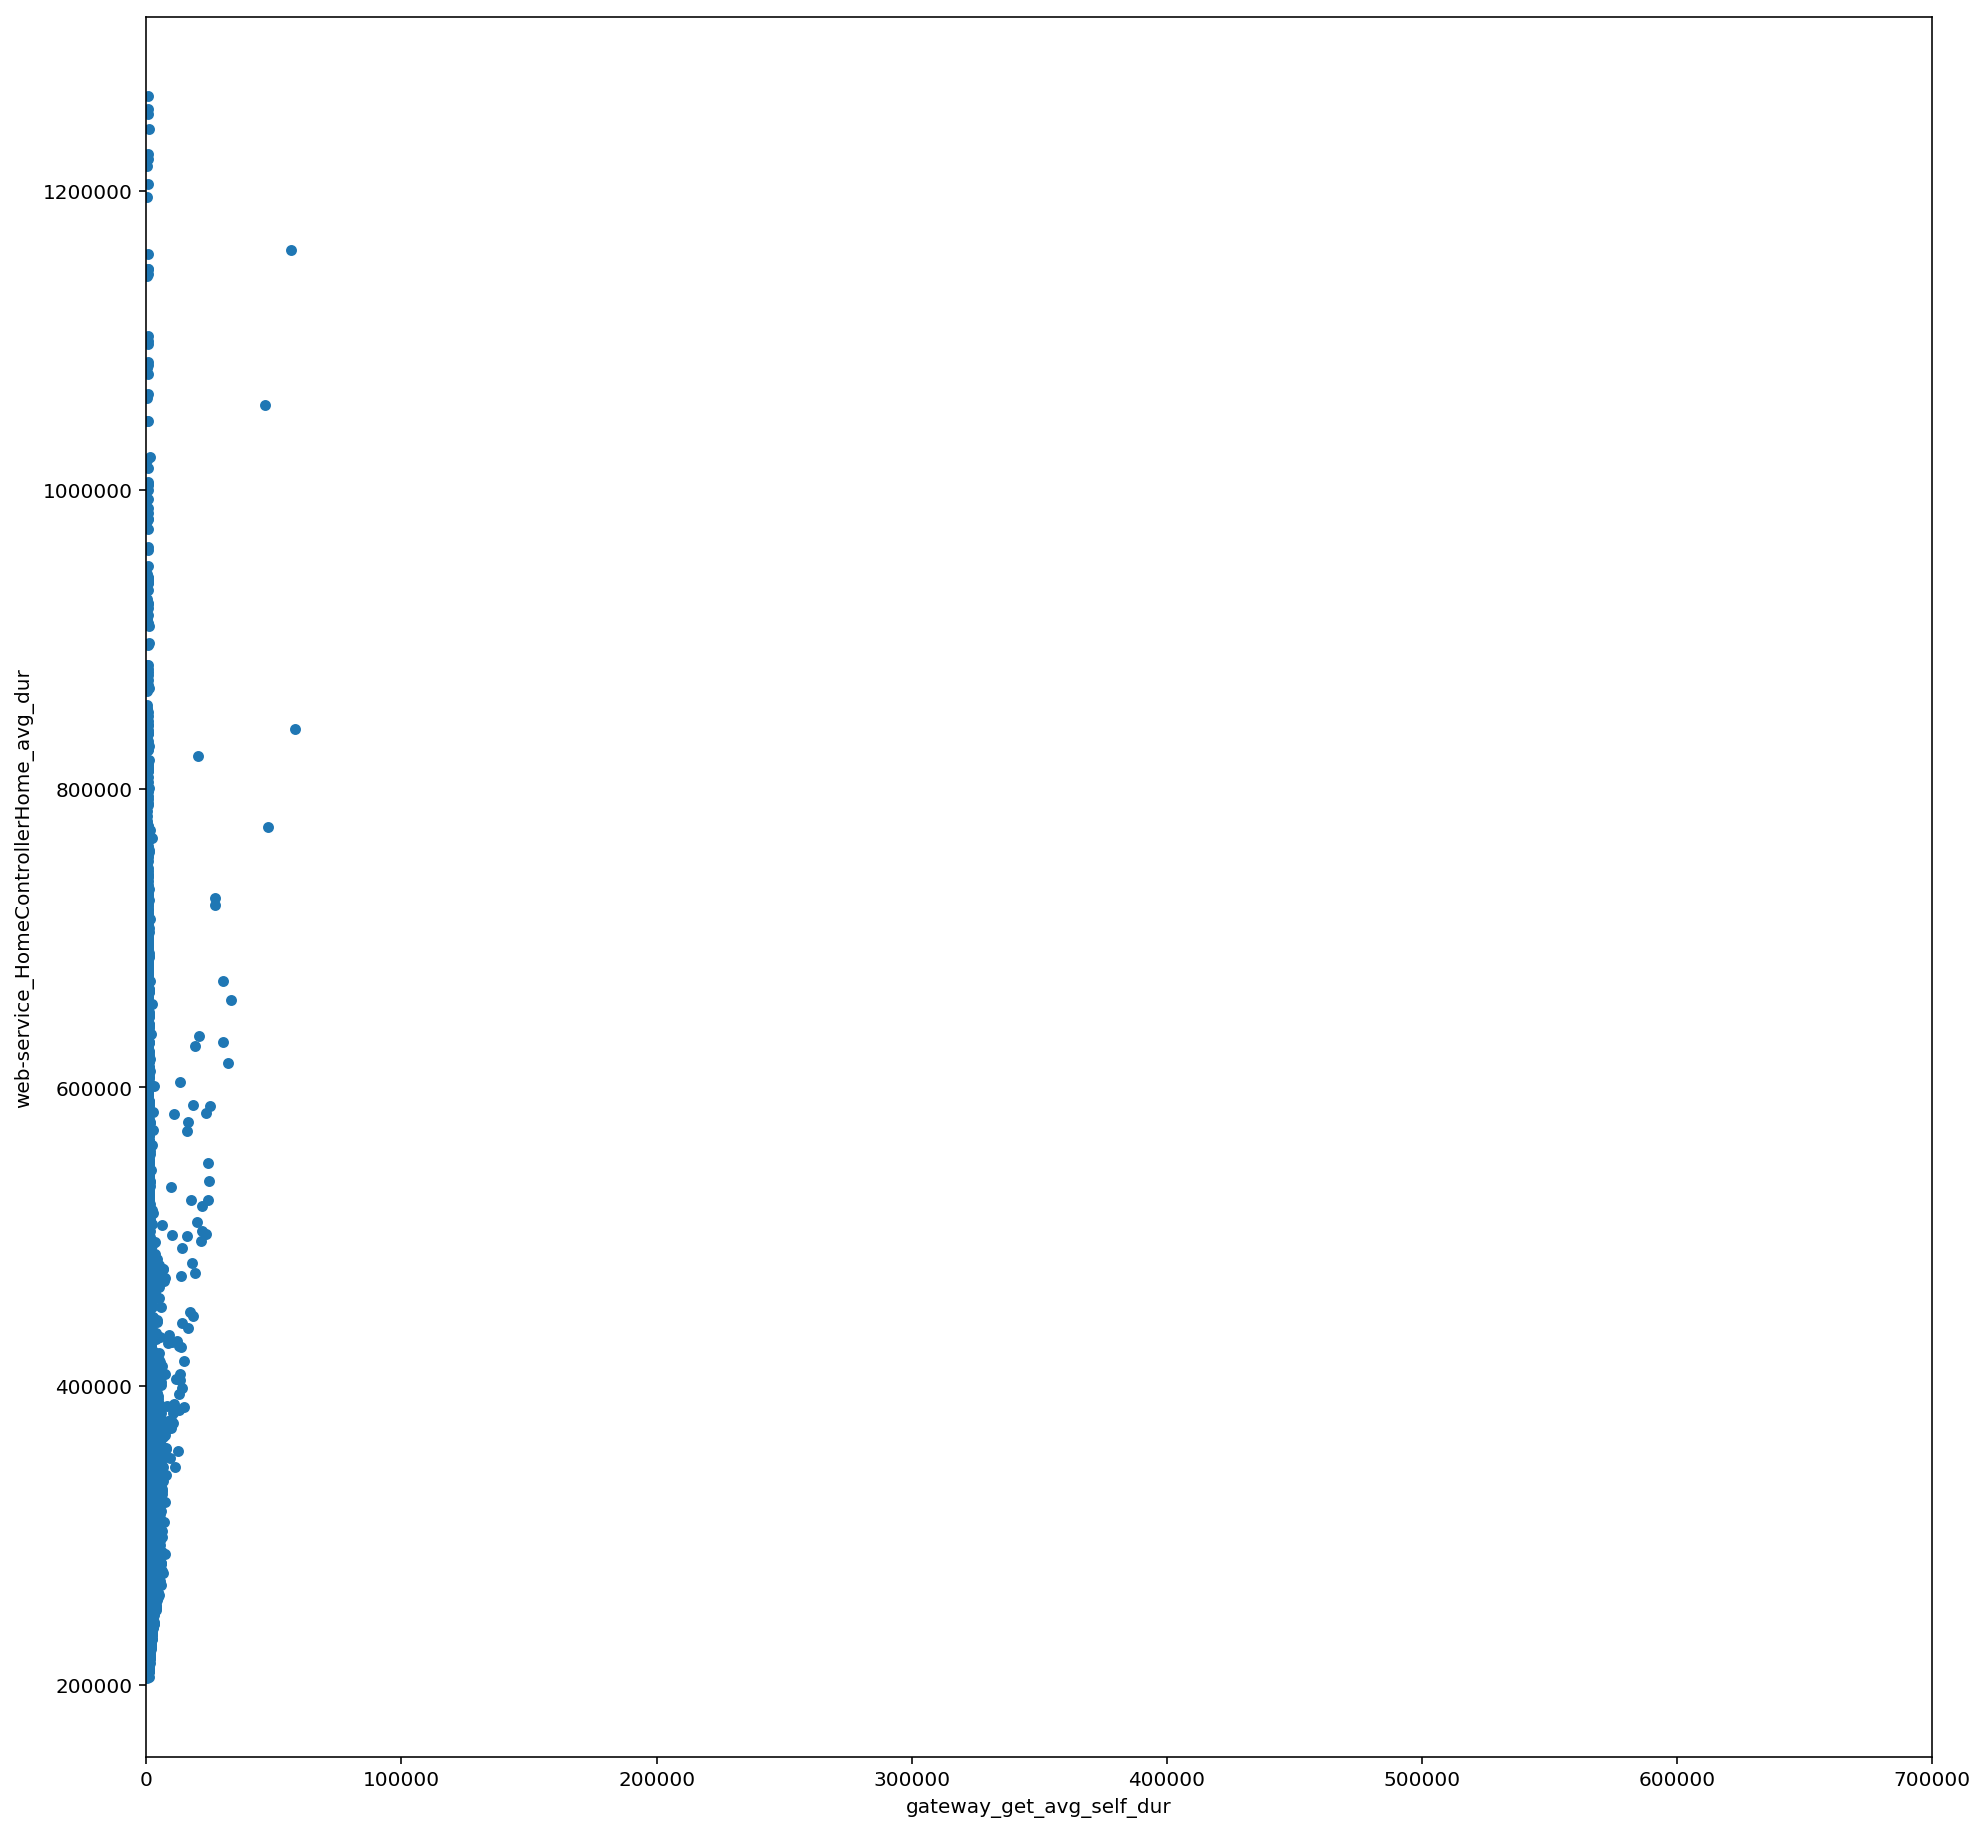

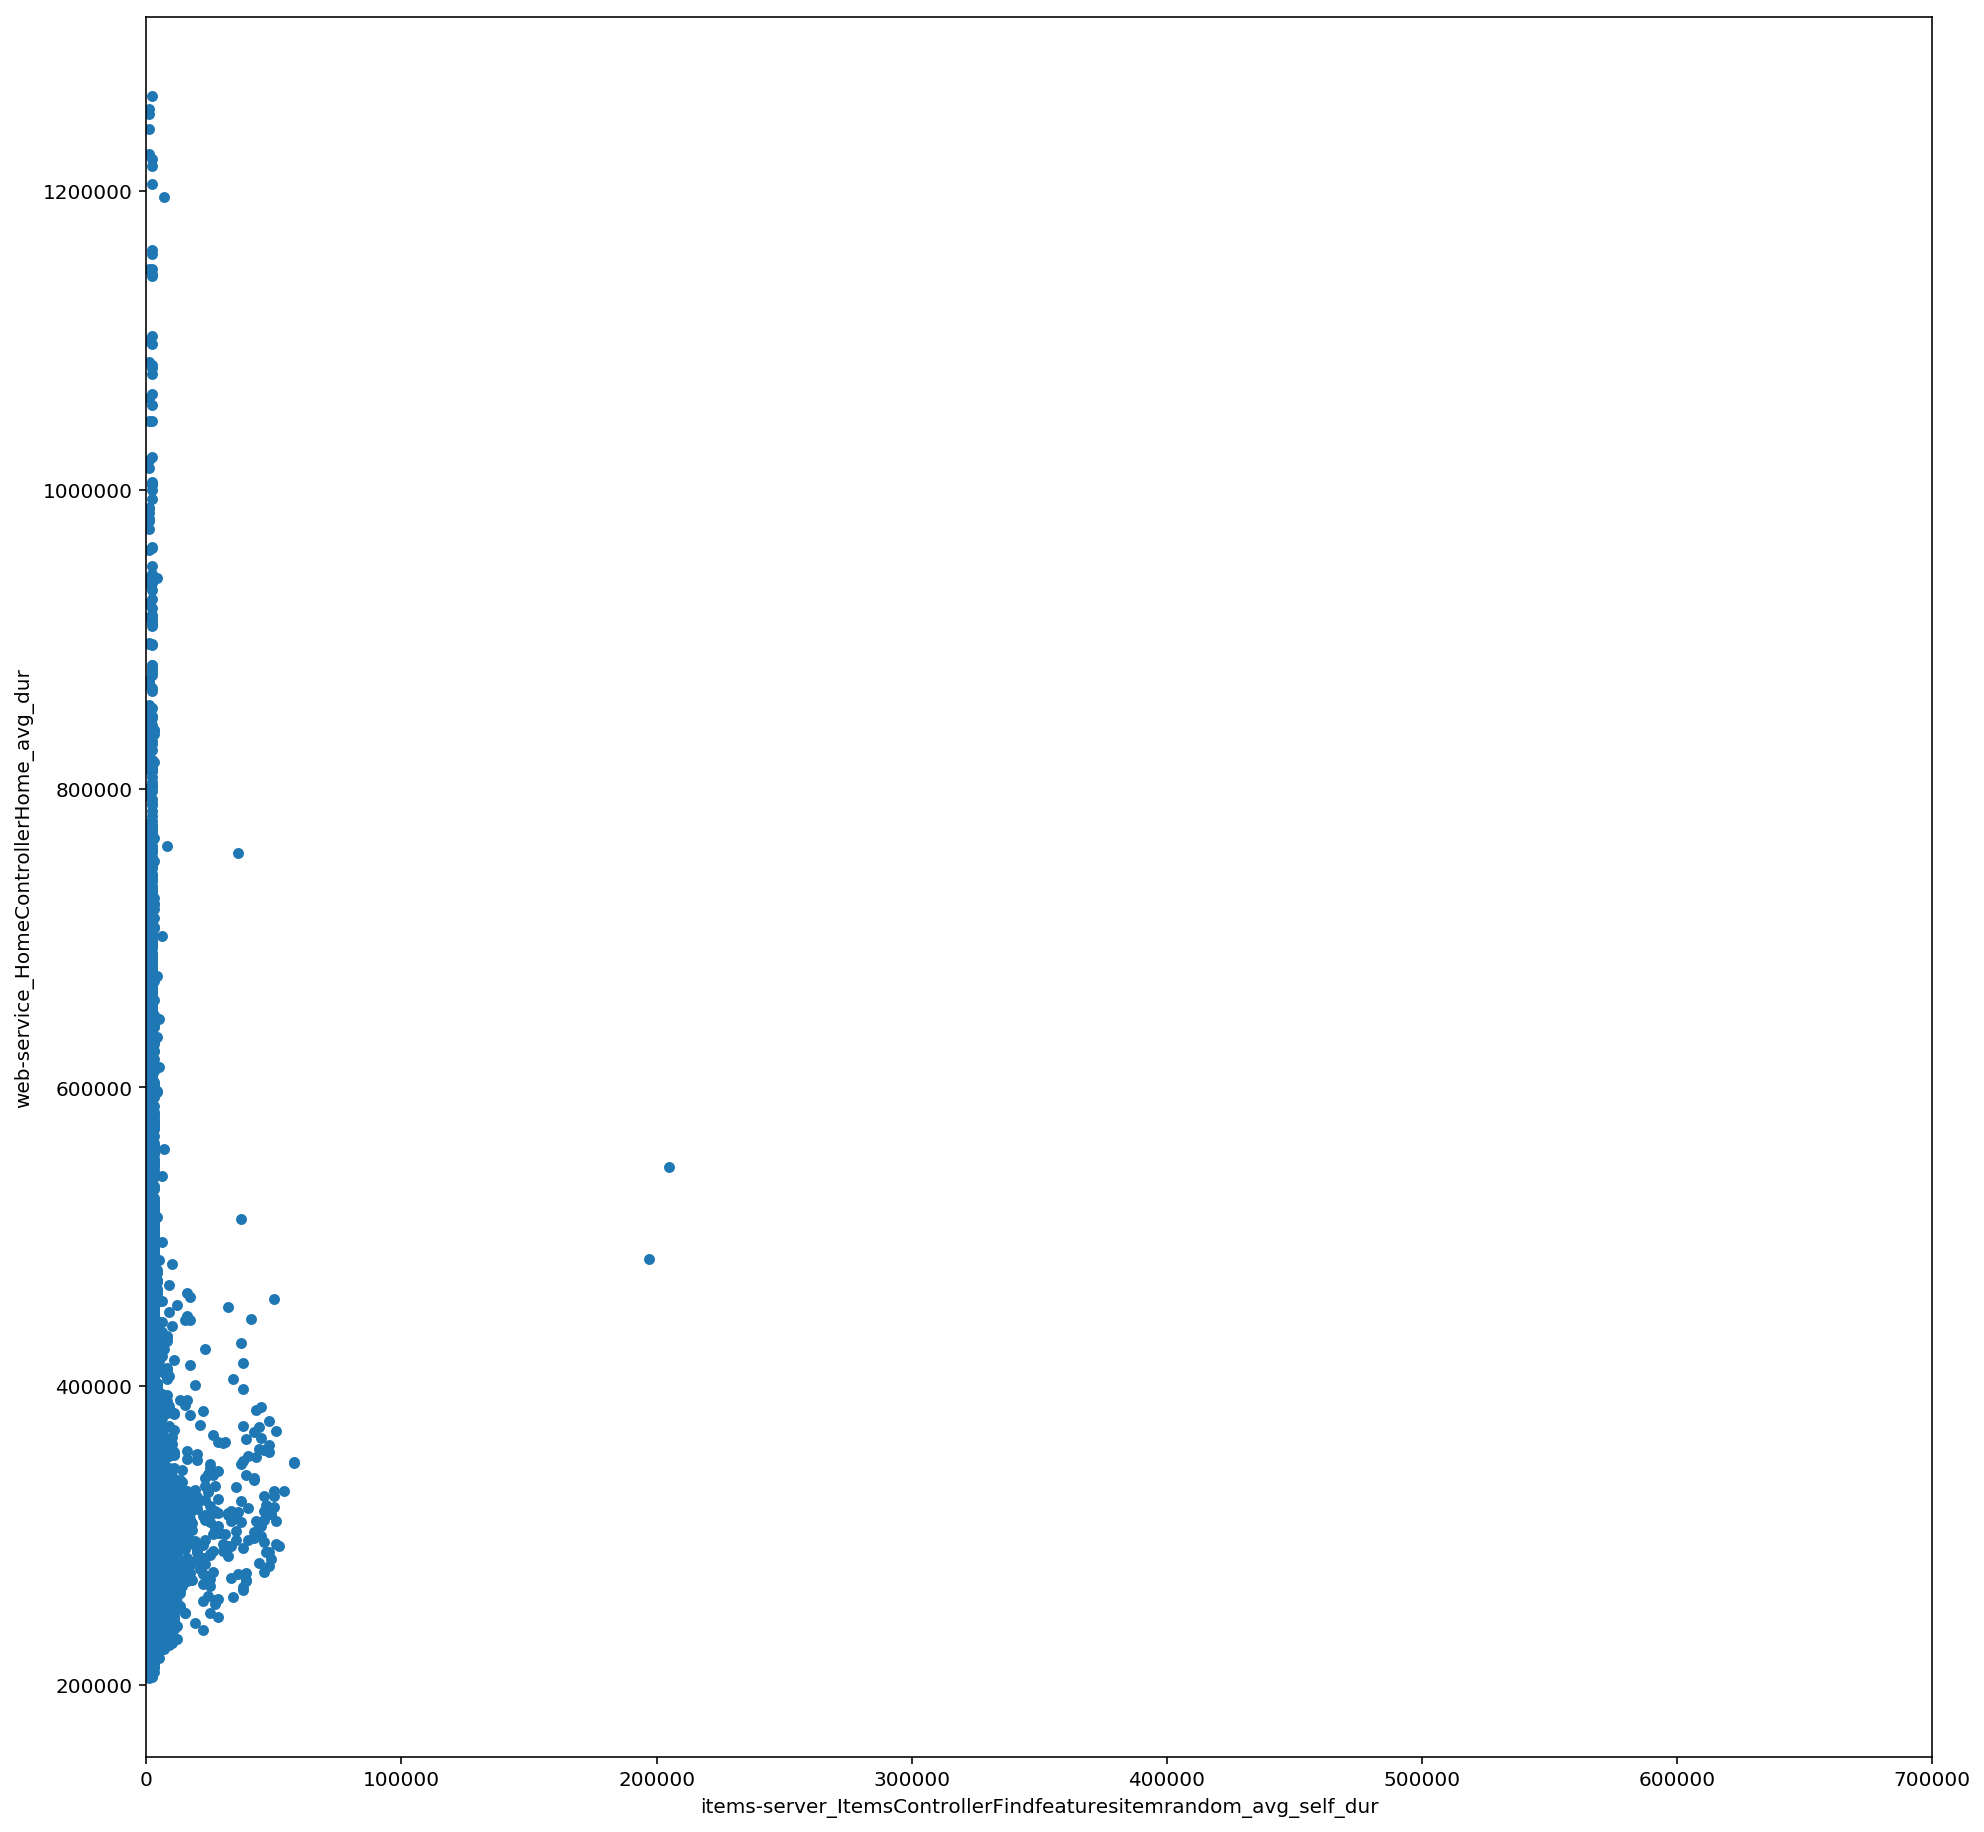

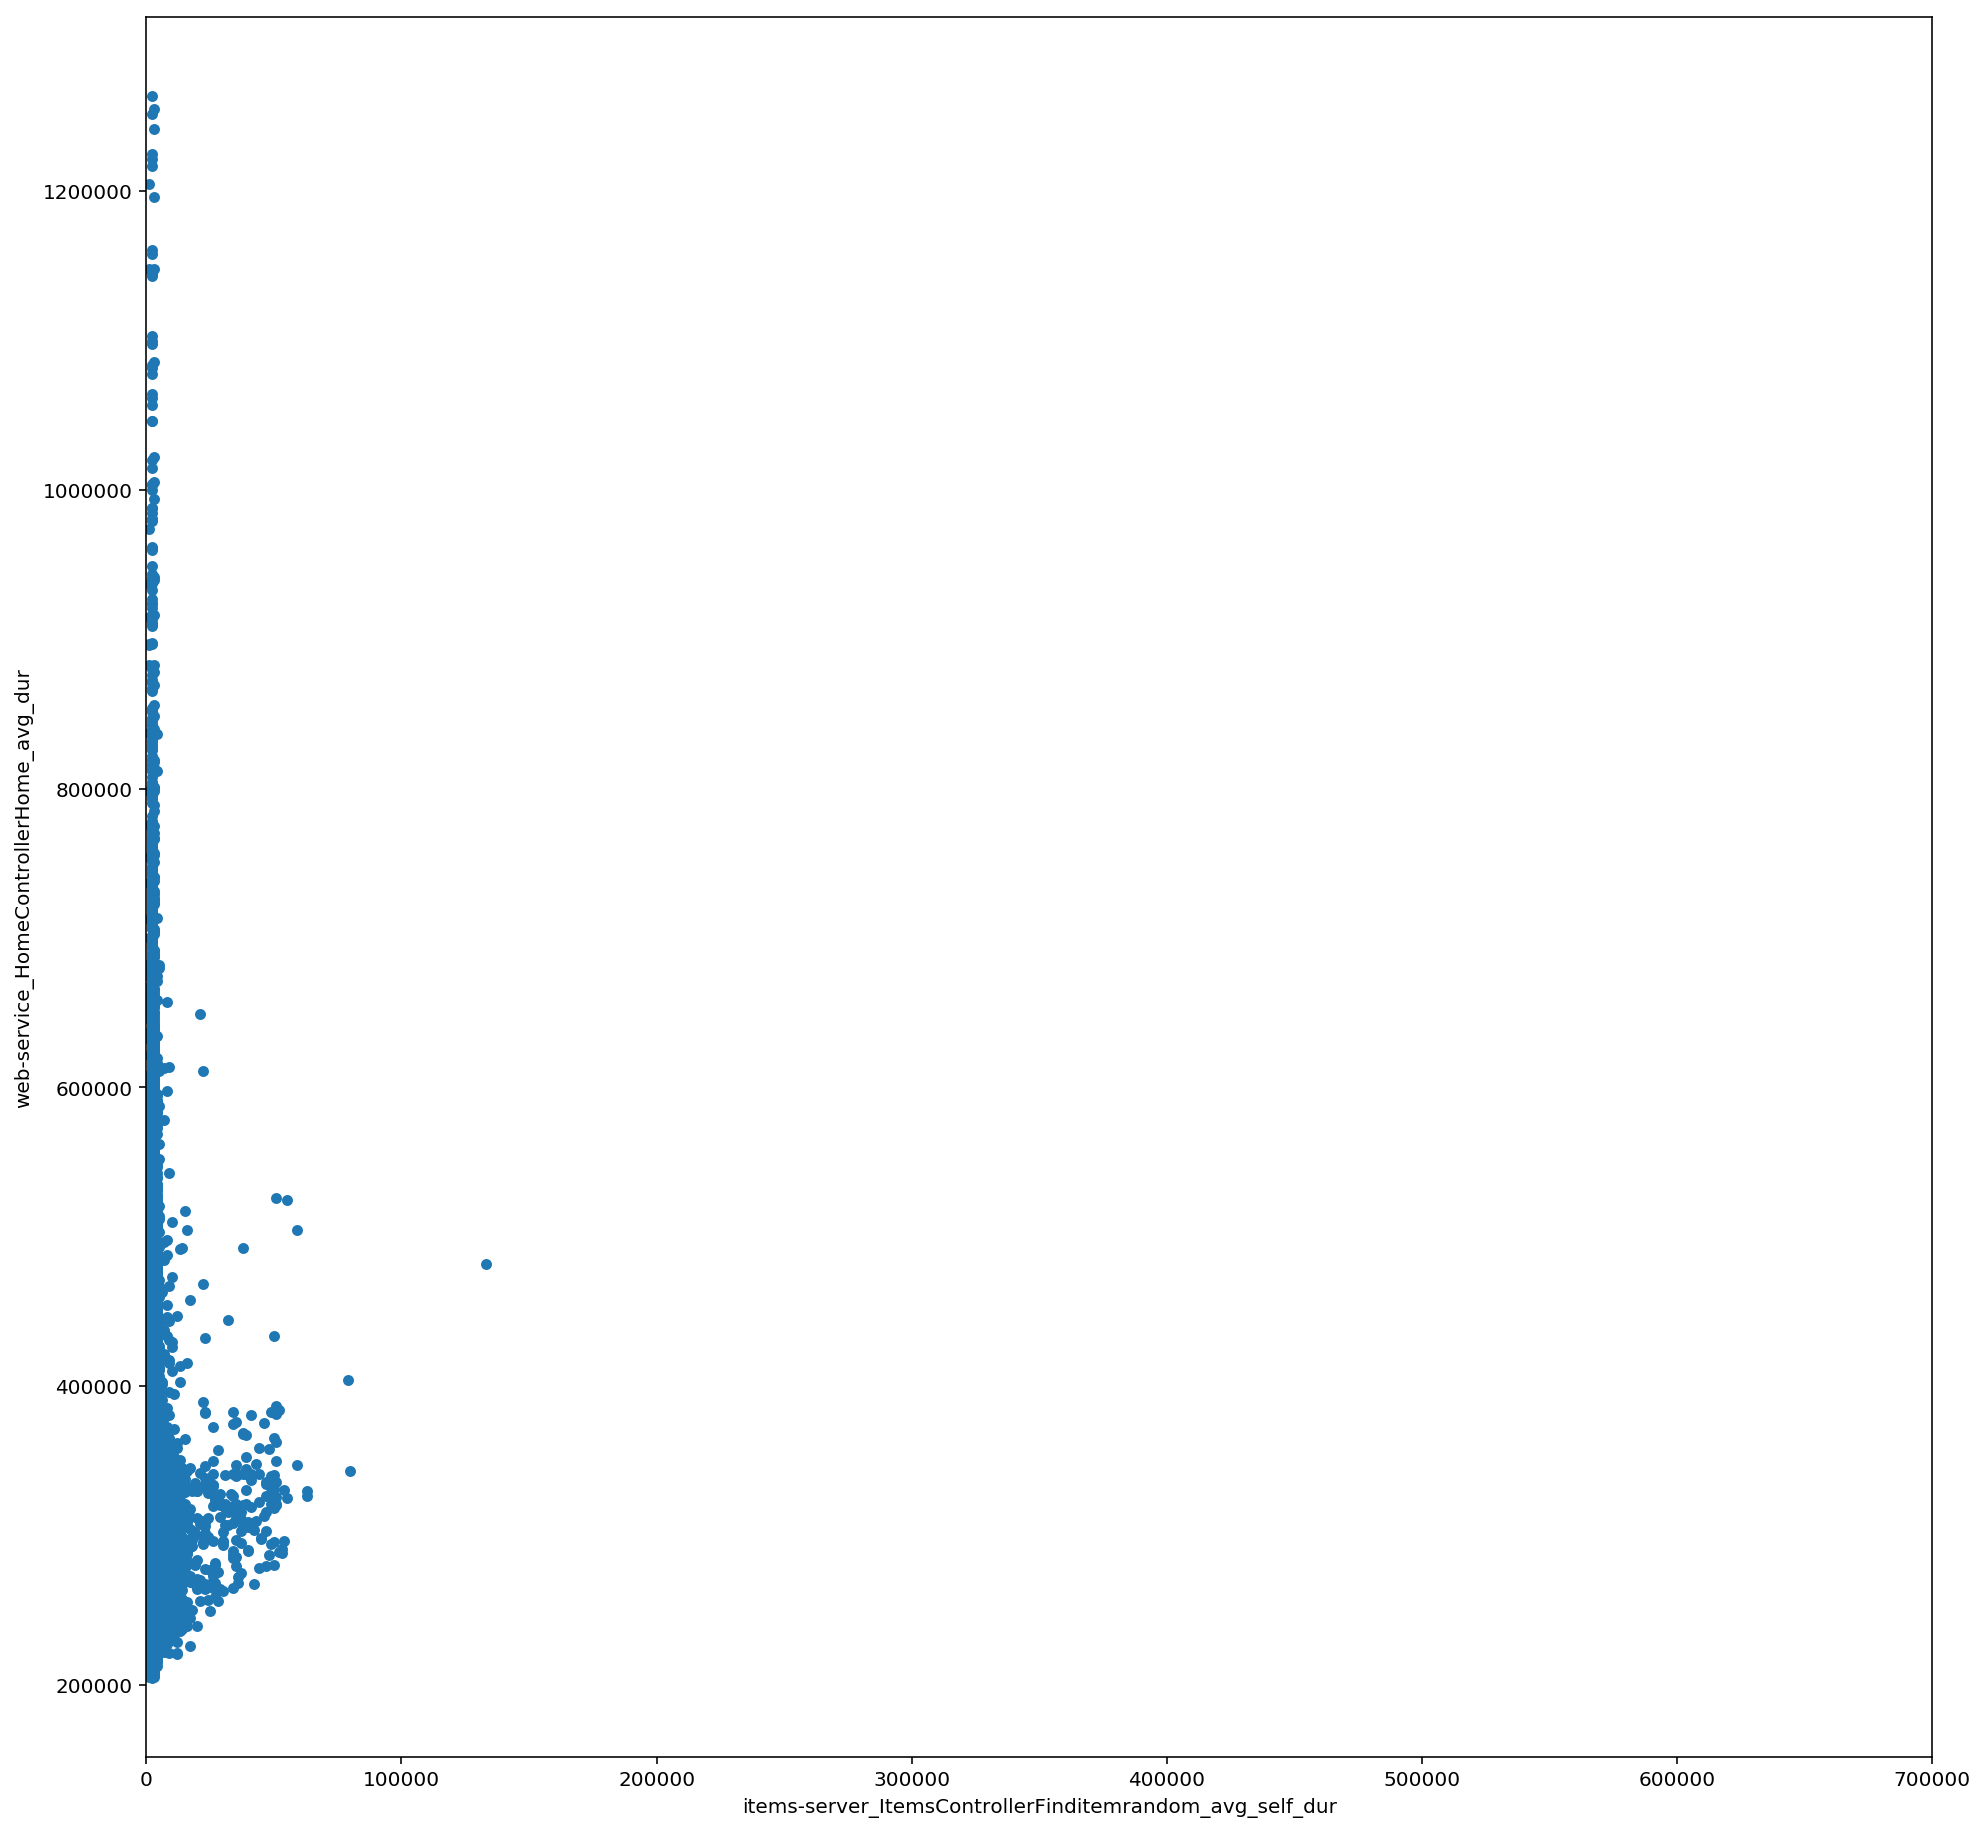

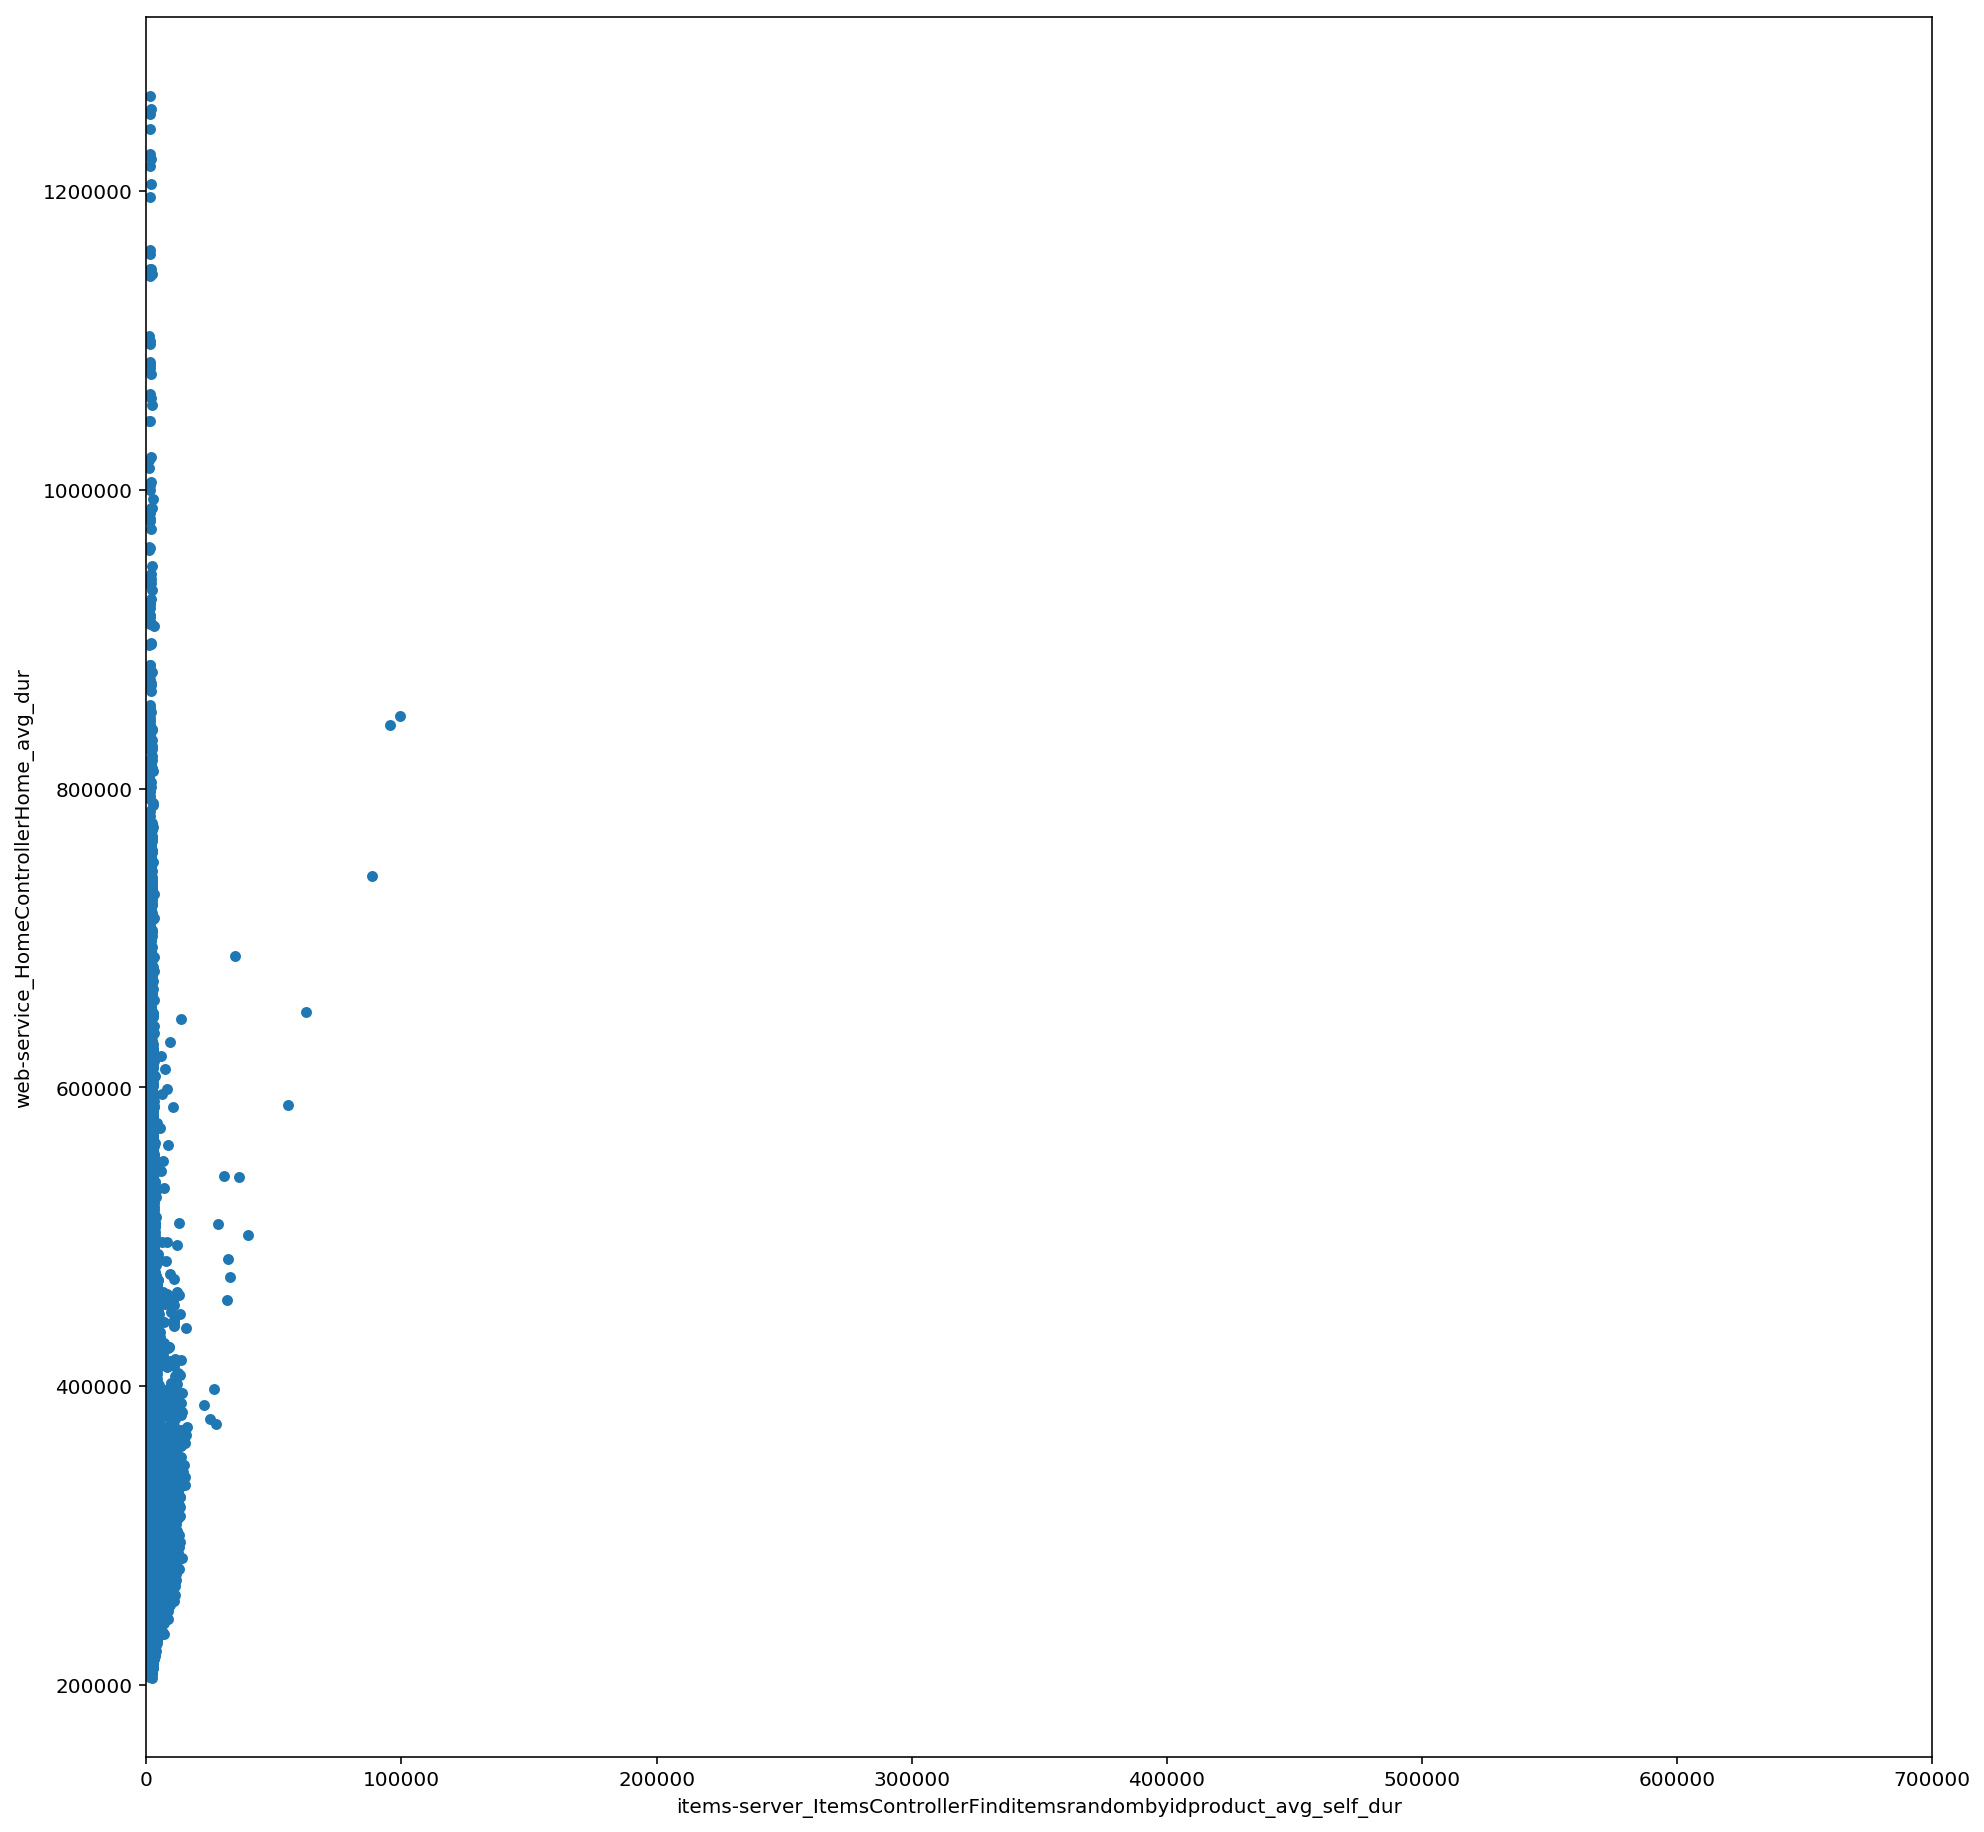

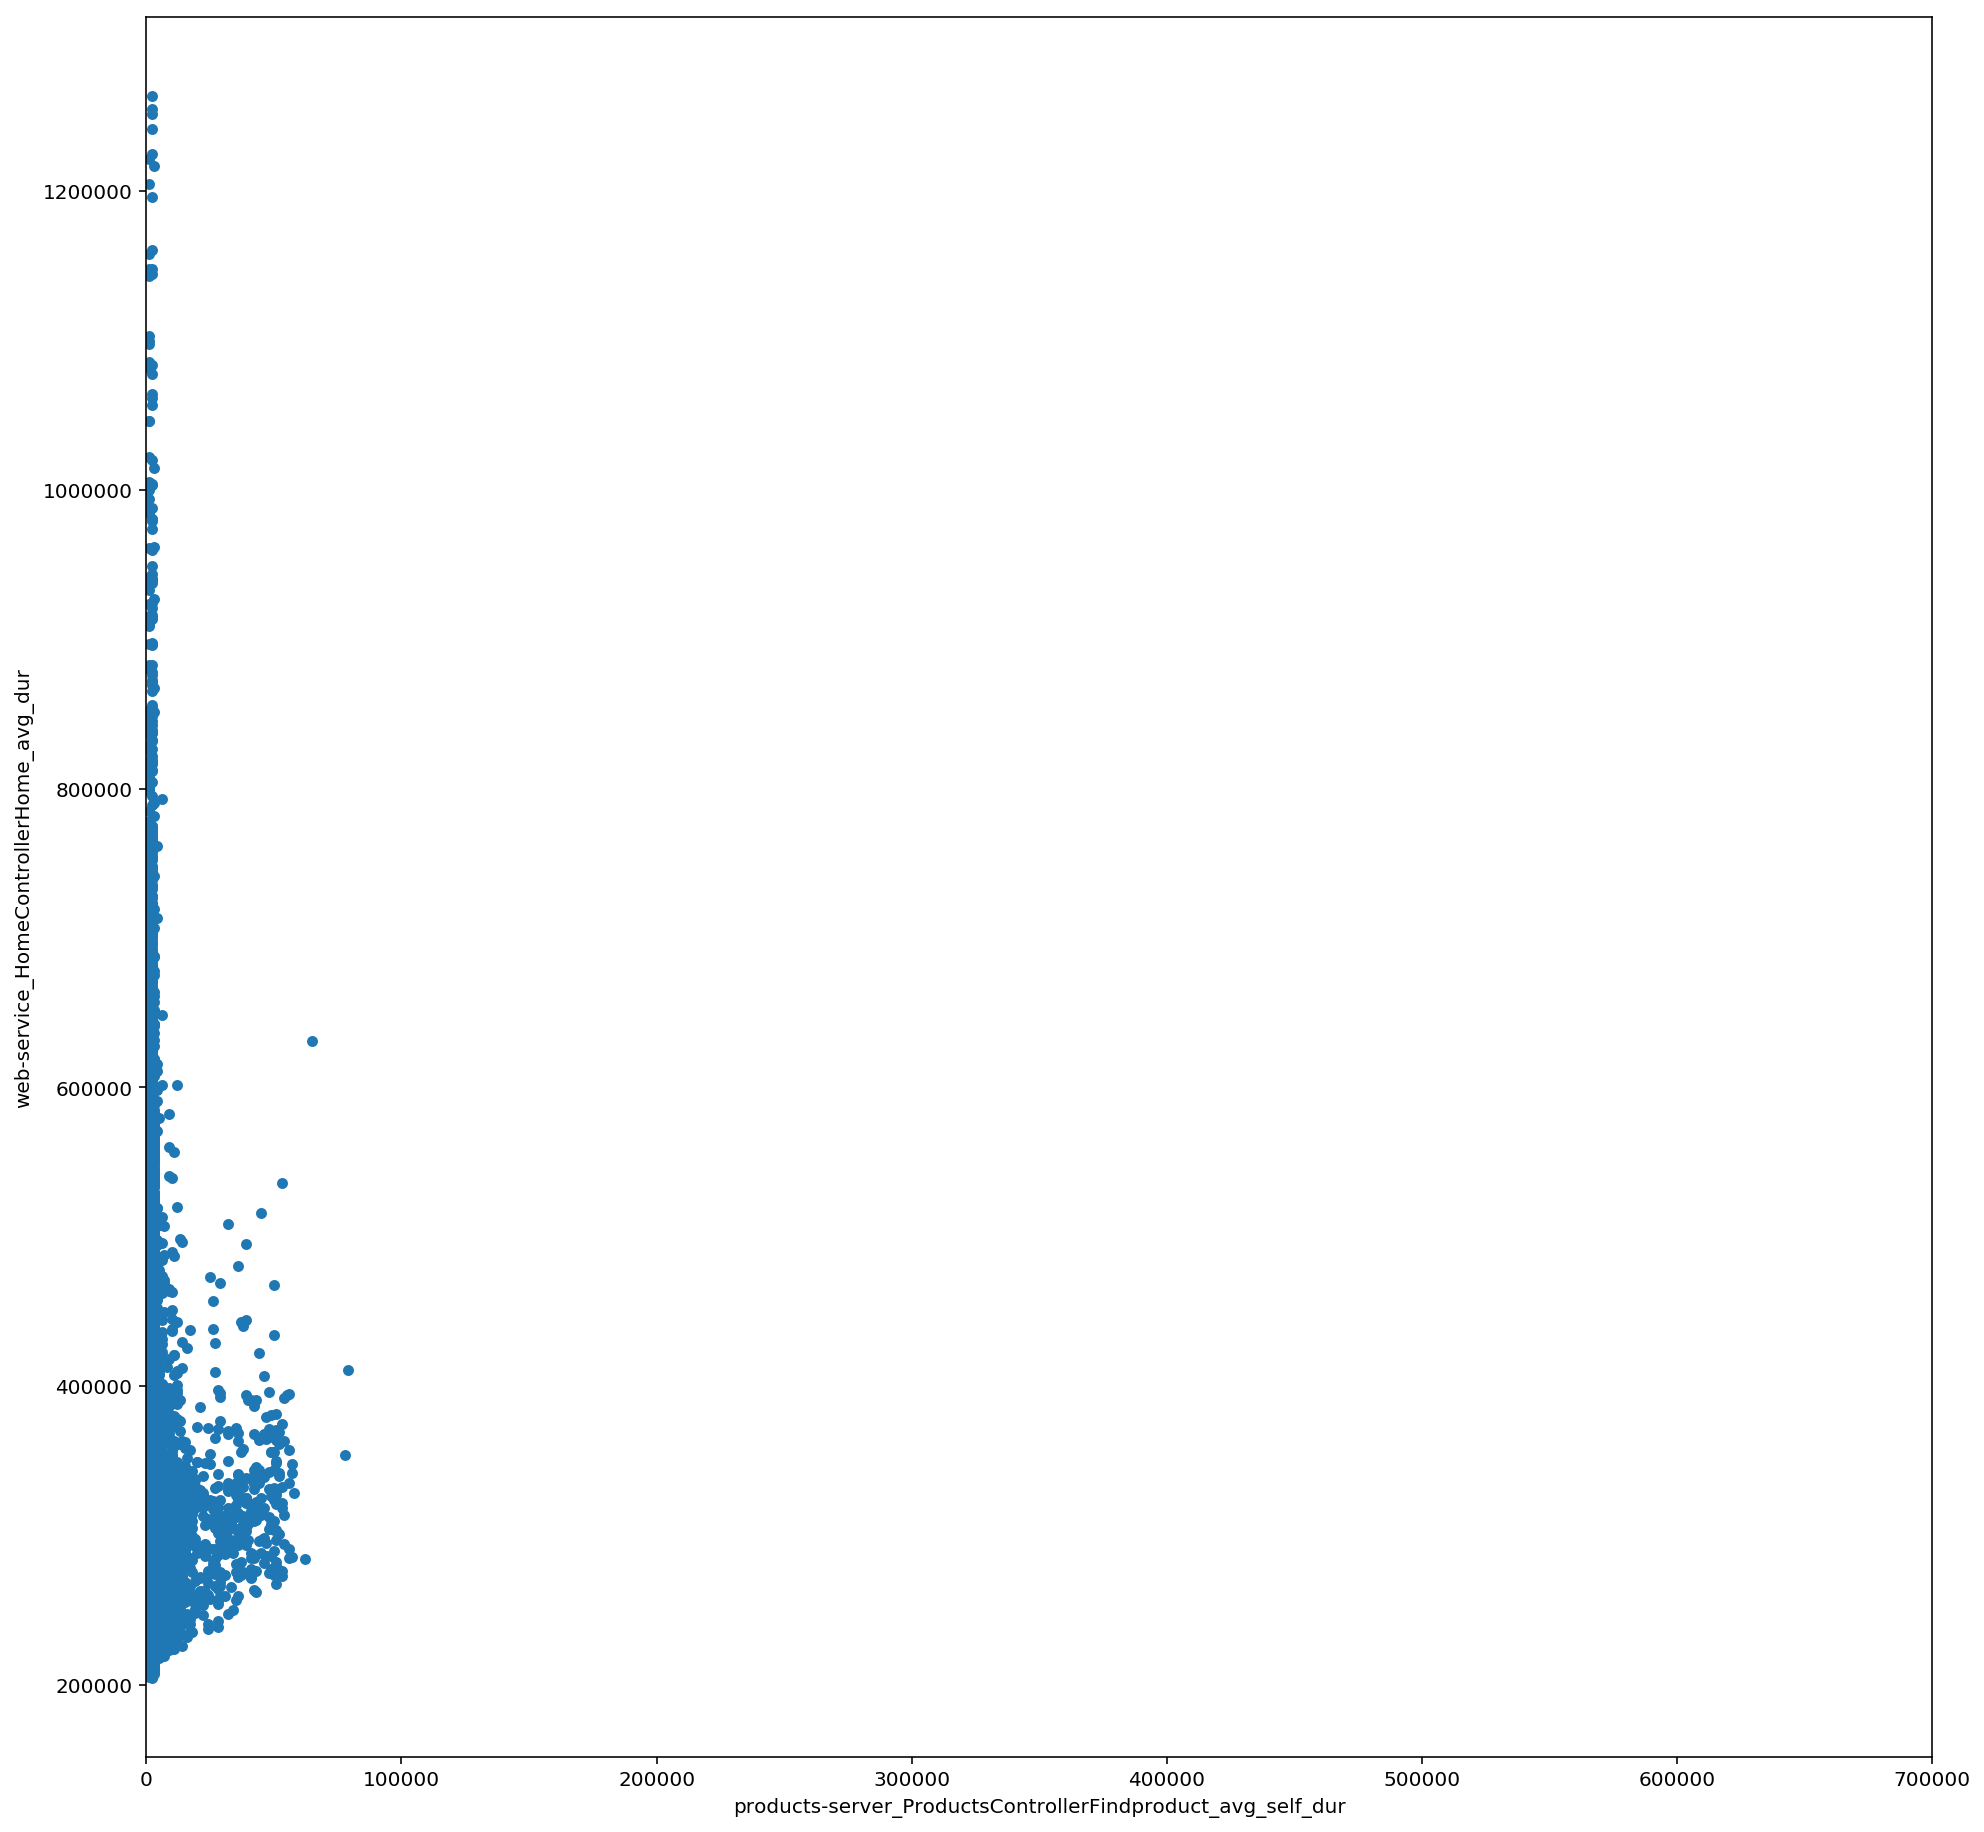

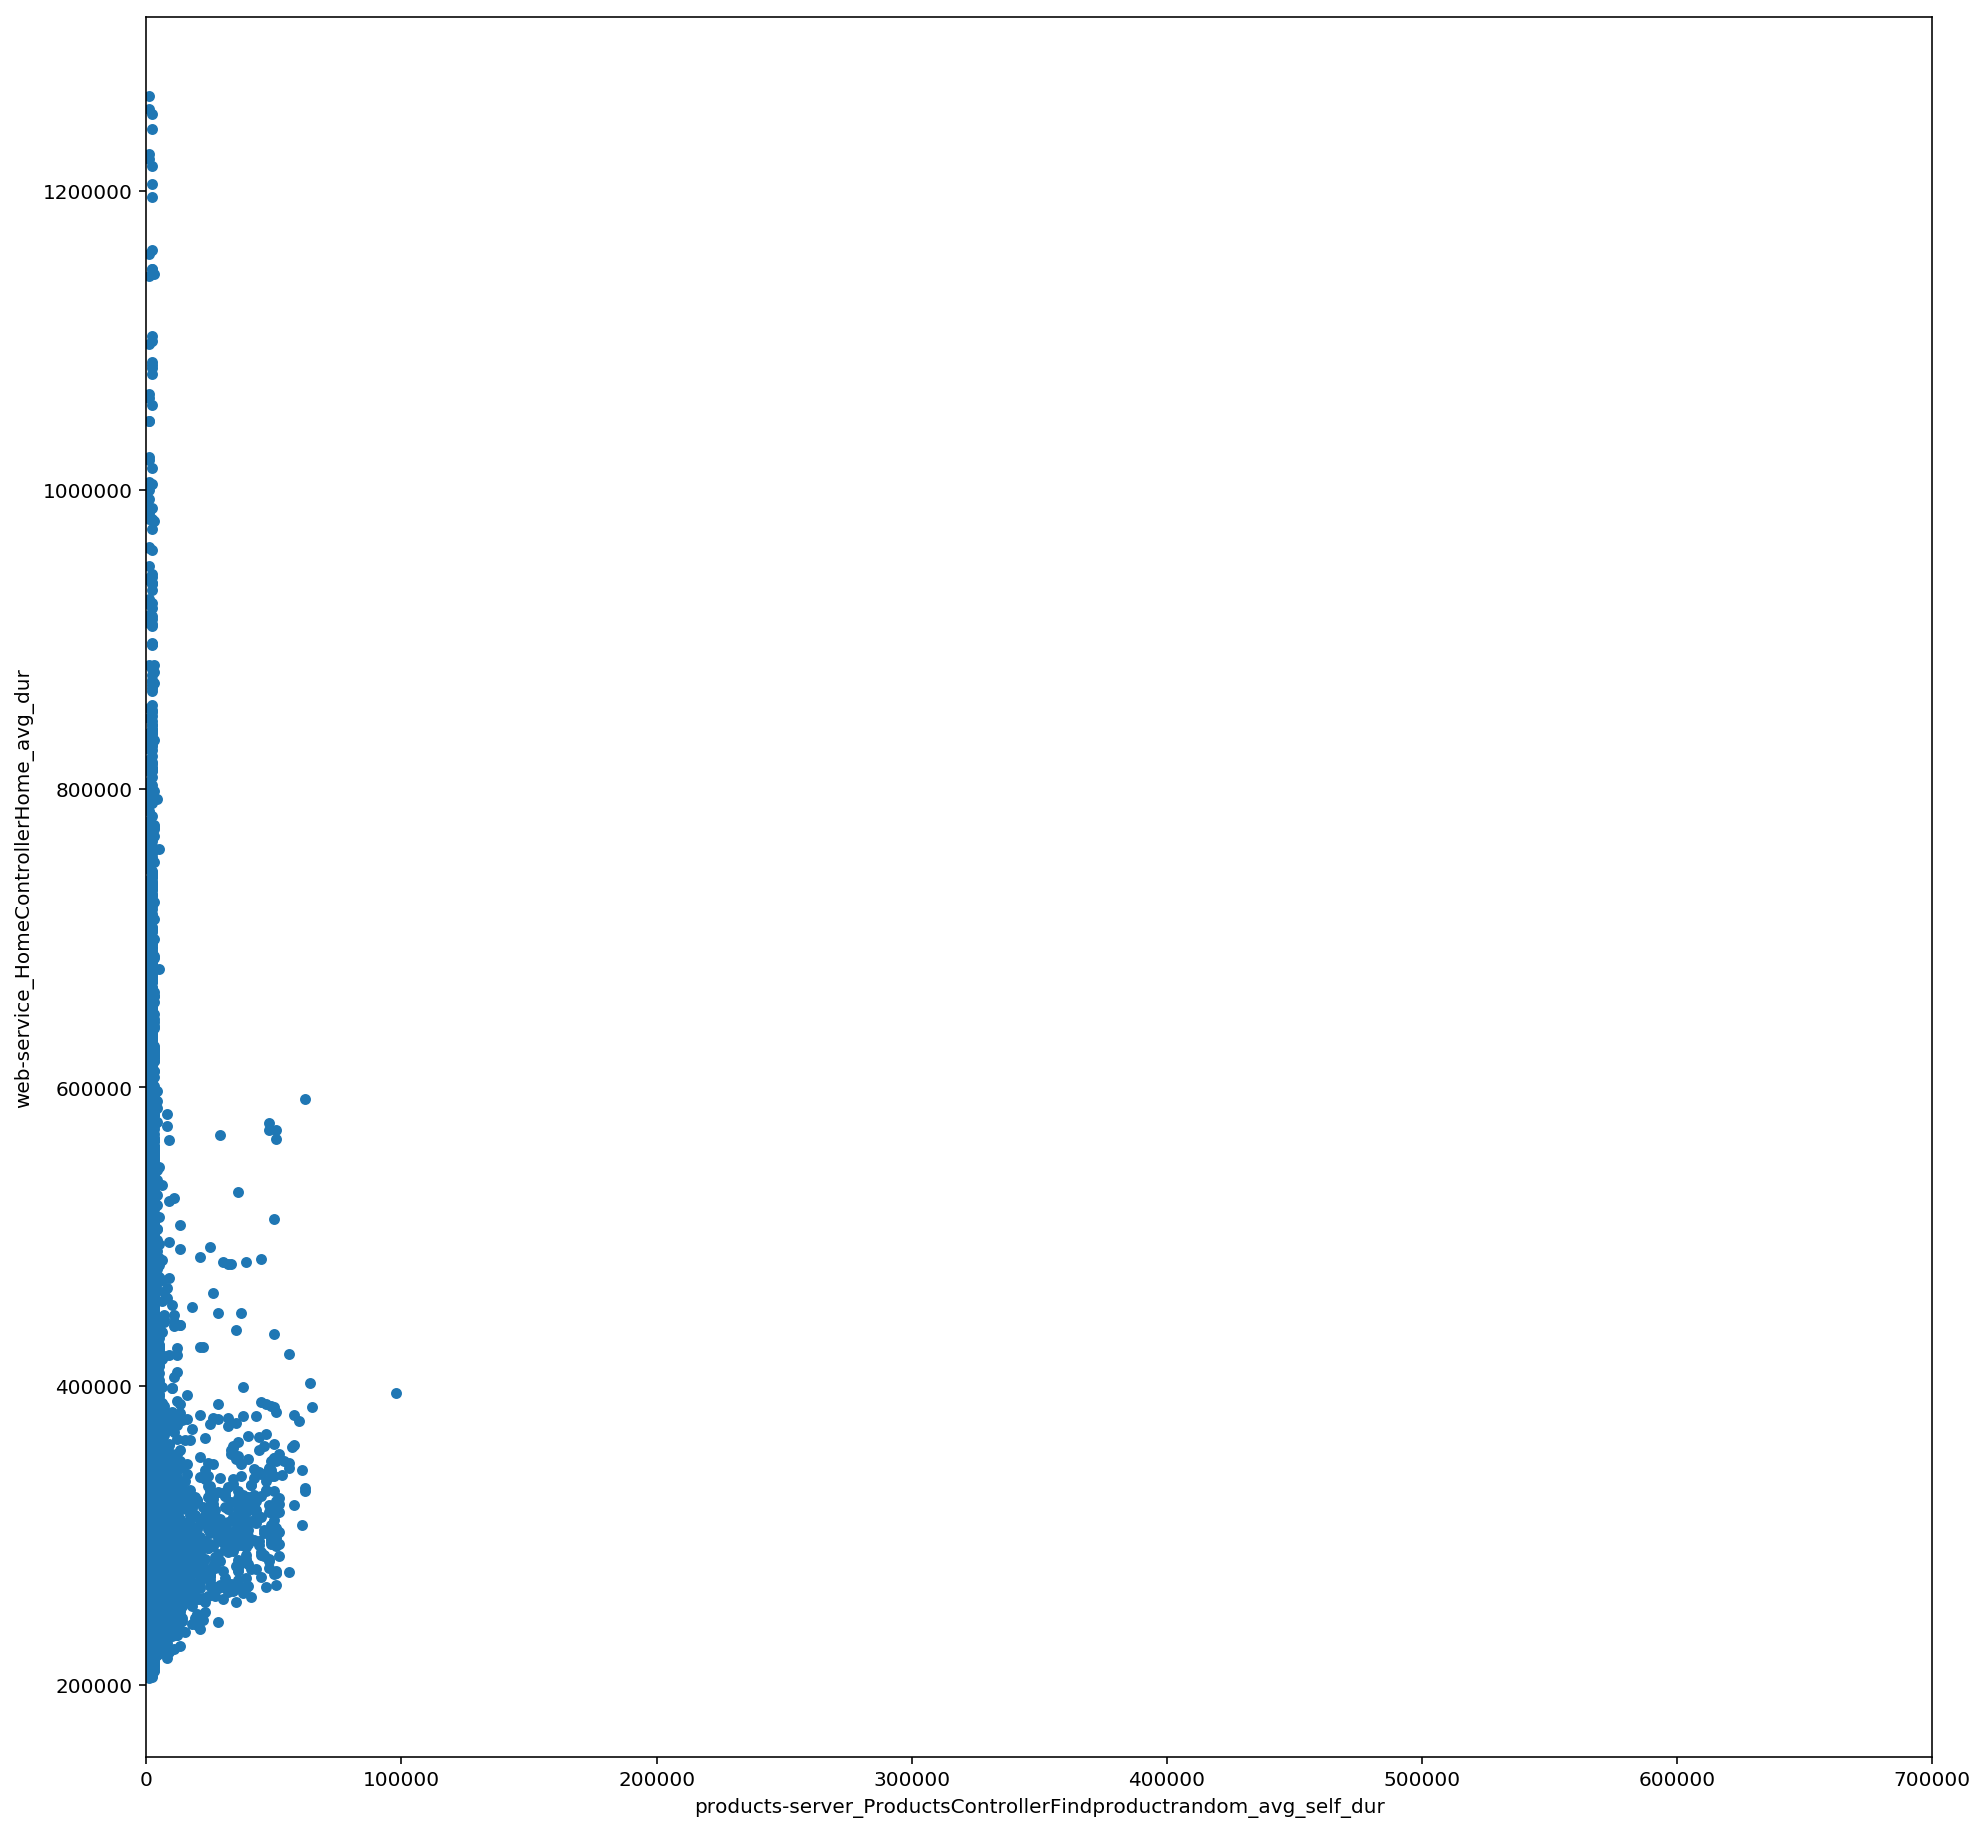

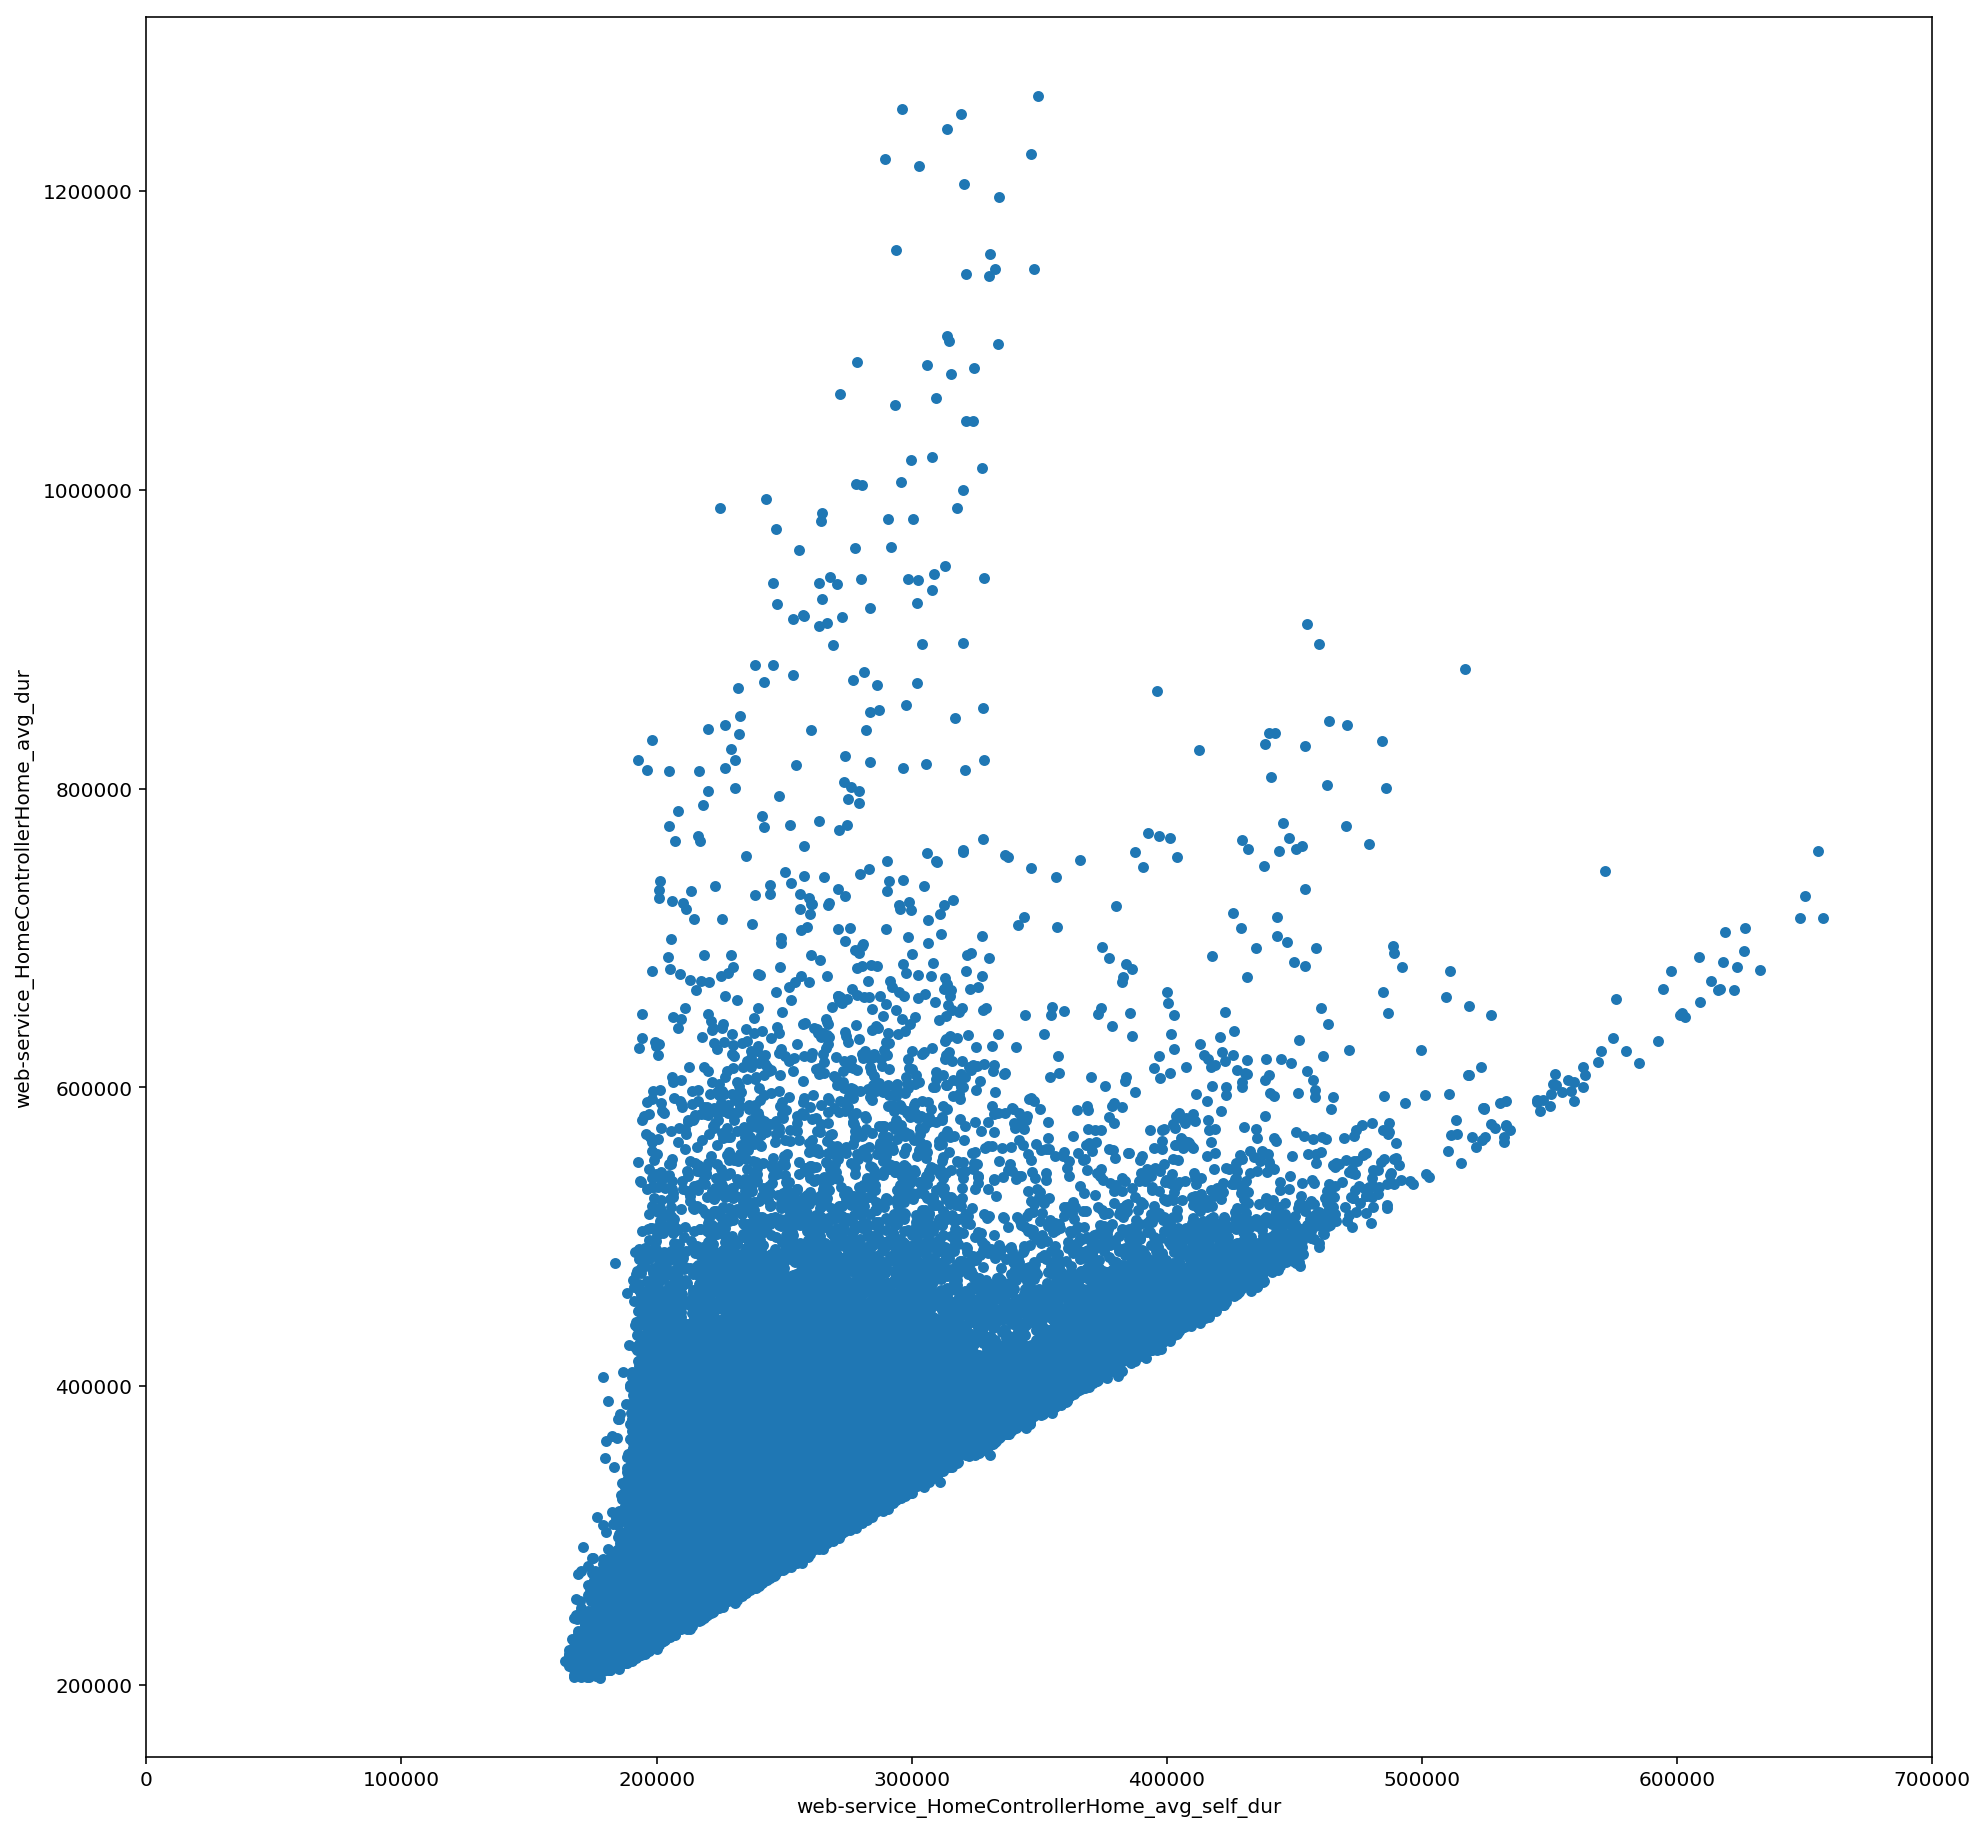

In [10]:
plt.rcParams['figure.figsize'] = (16,16)
for c in filterSelfDurations(traces.columns):
        pd_traces.plot.scatter(x=c, y='web-service_HomeControllerHome_avg_dur', xlim=(0,700000));

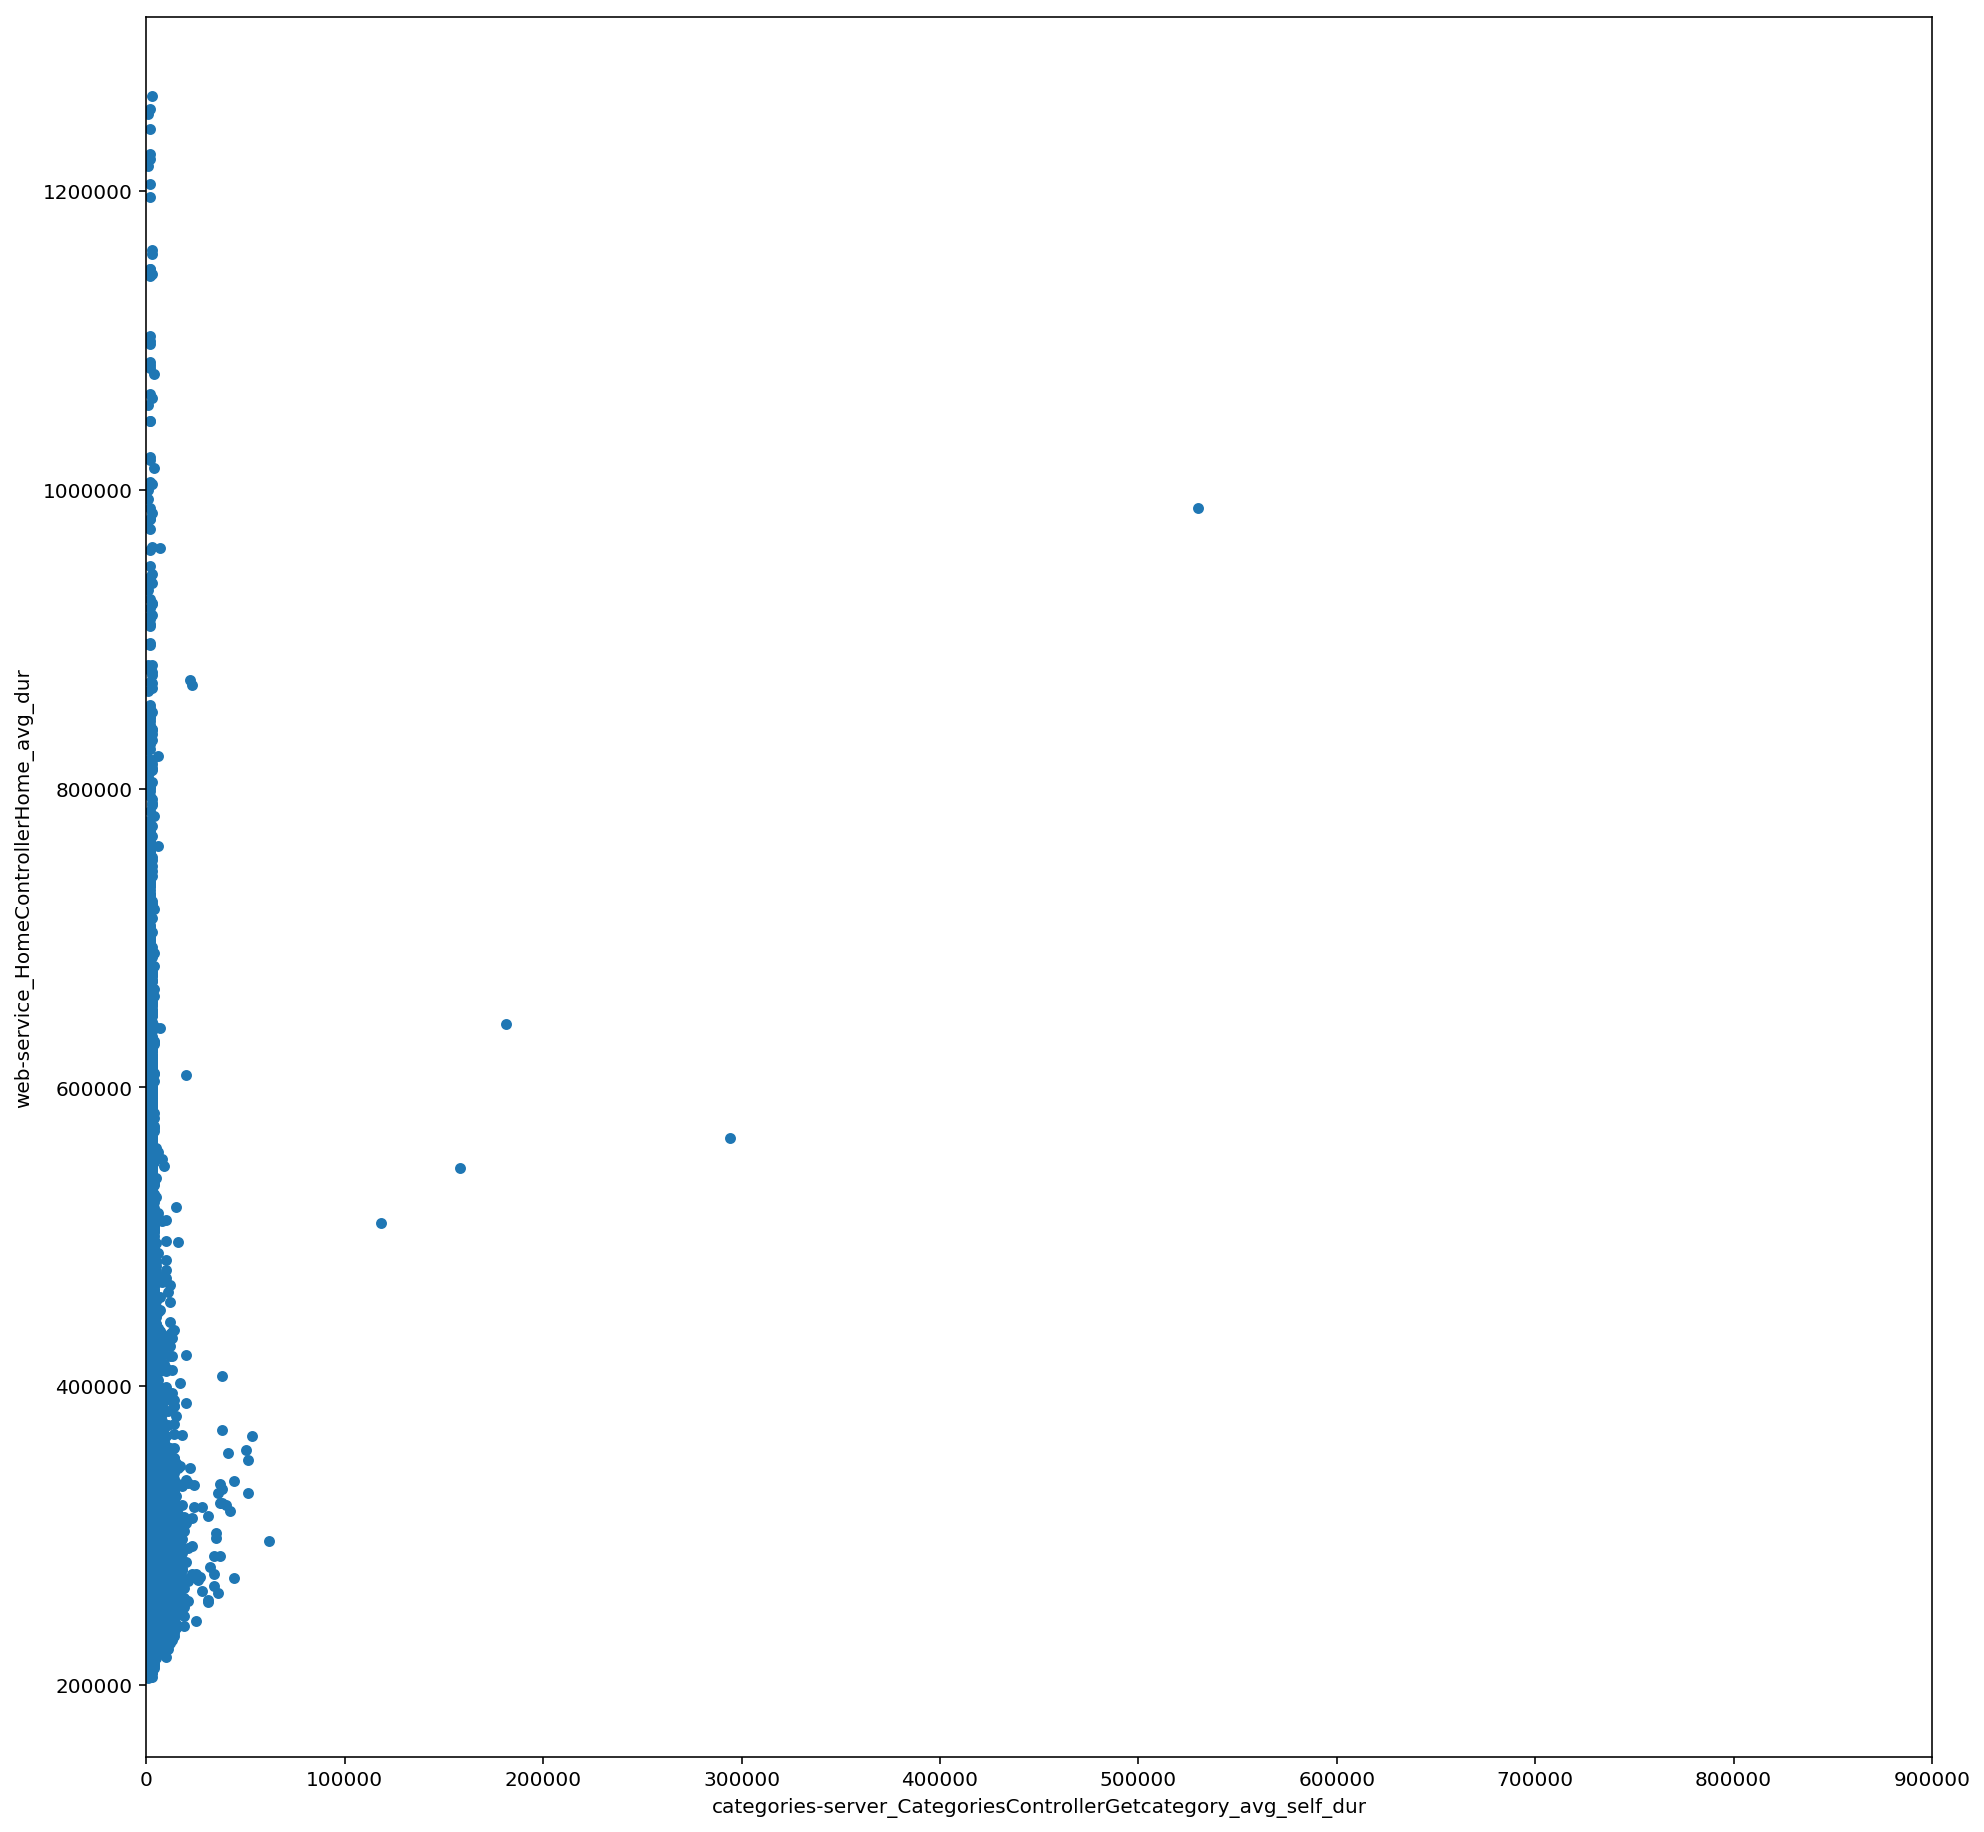

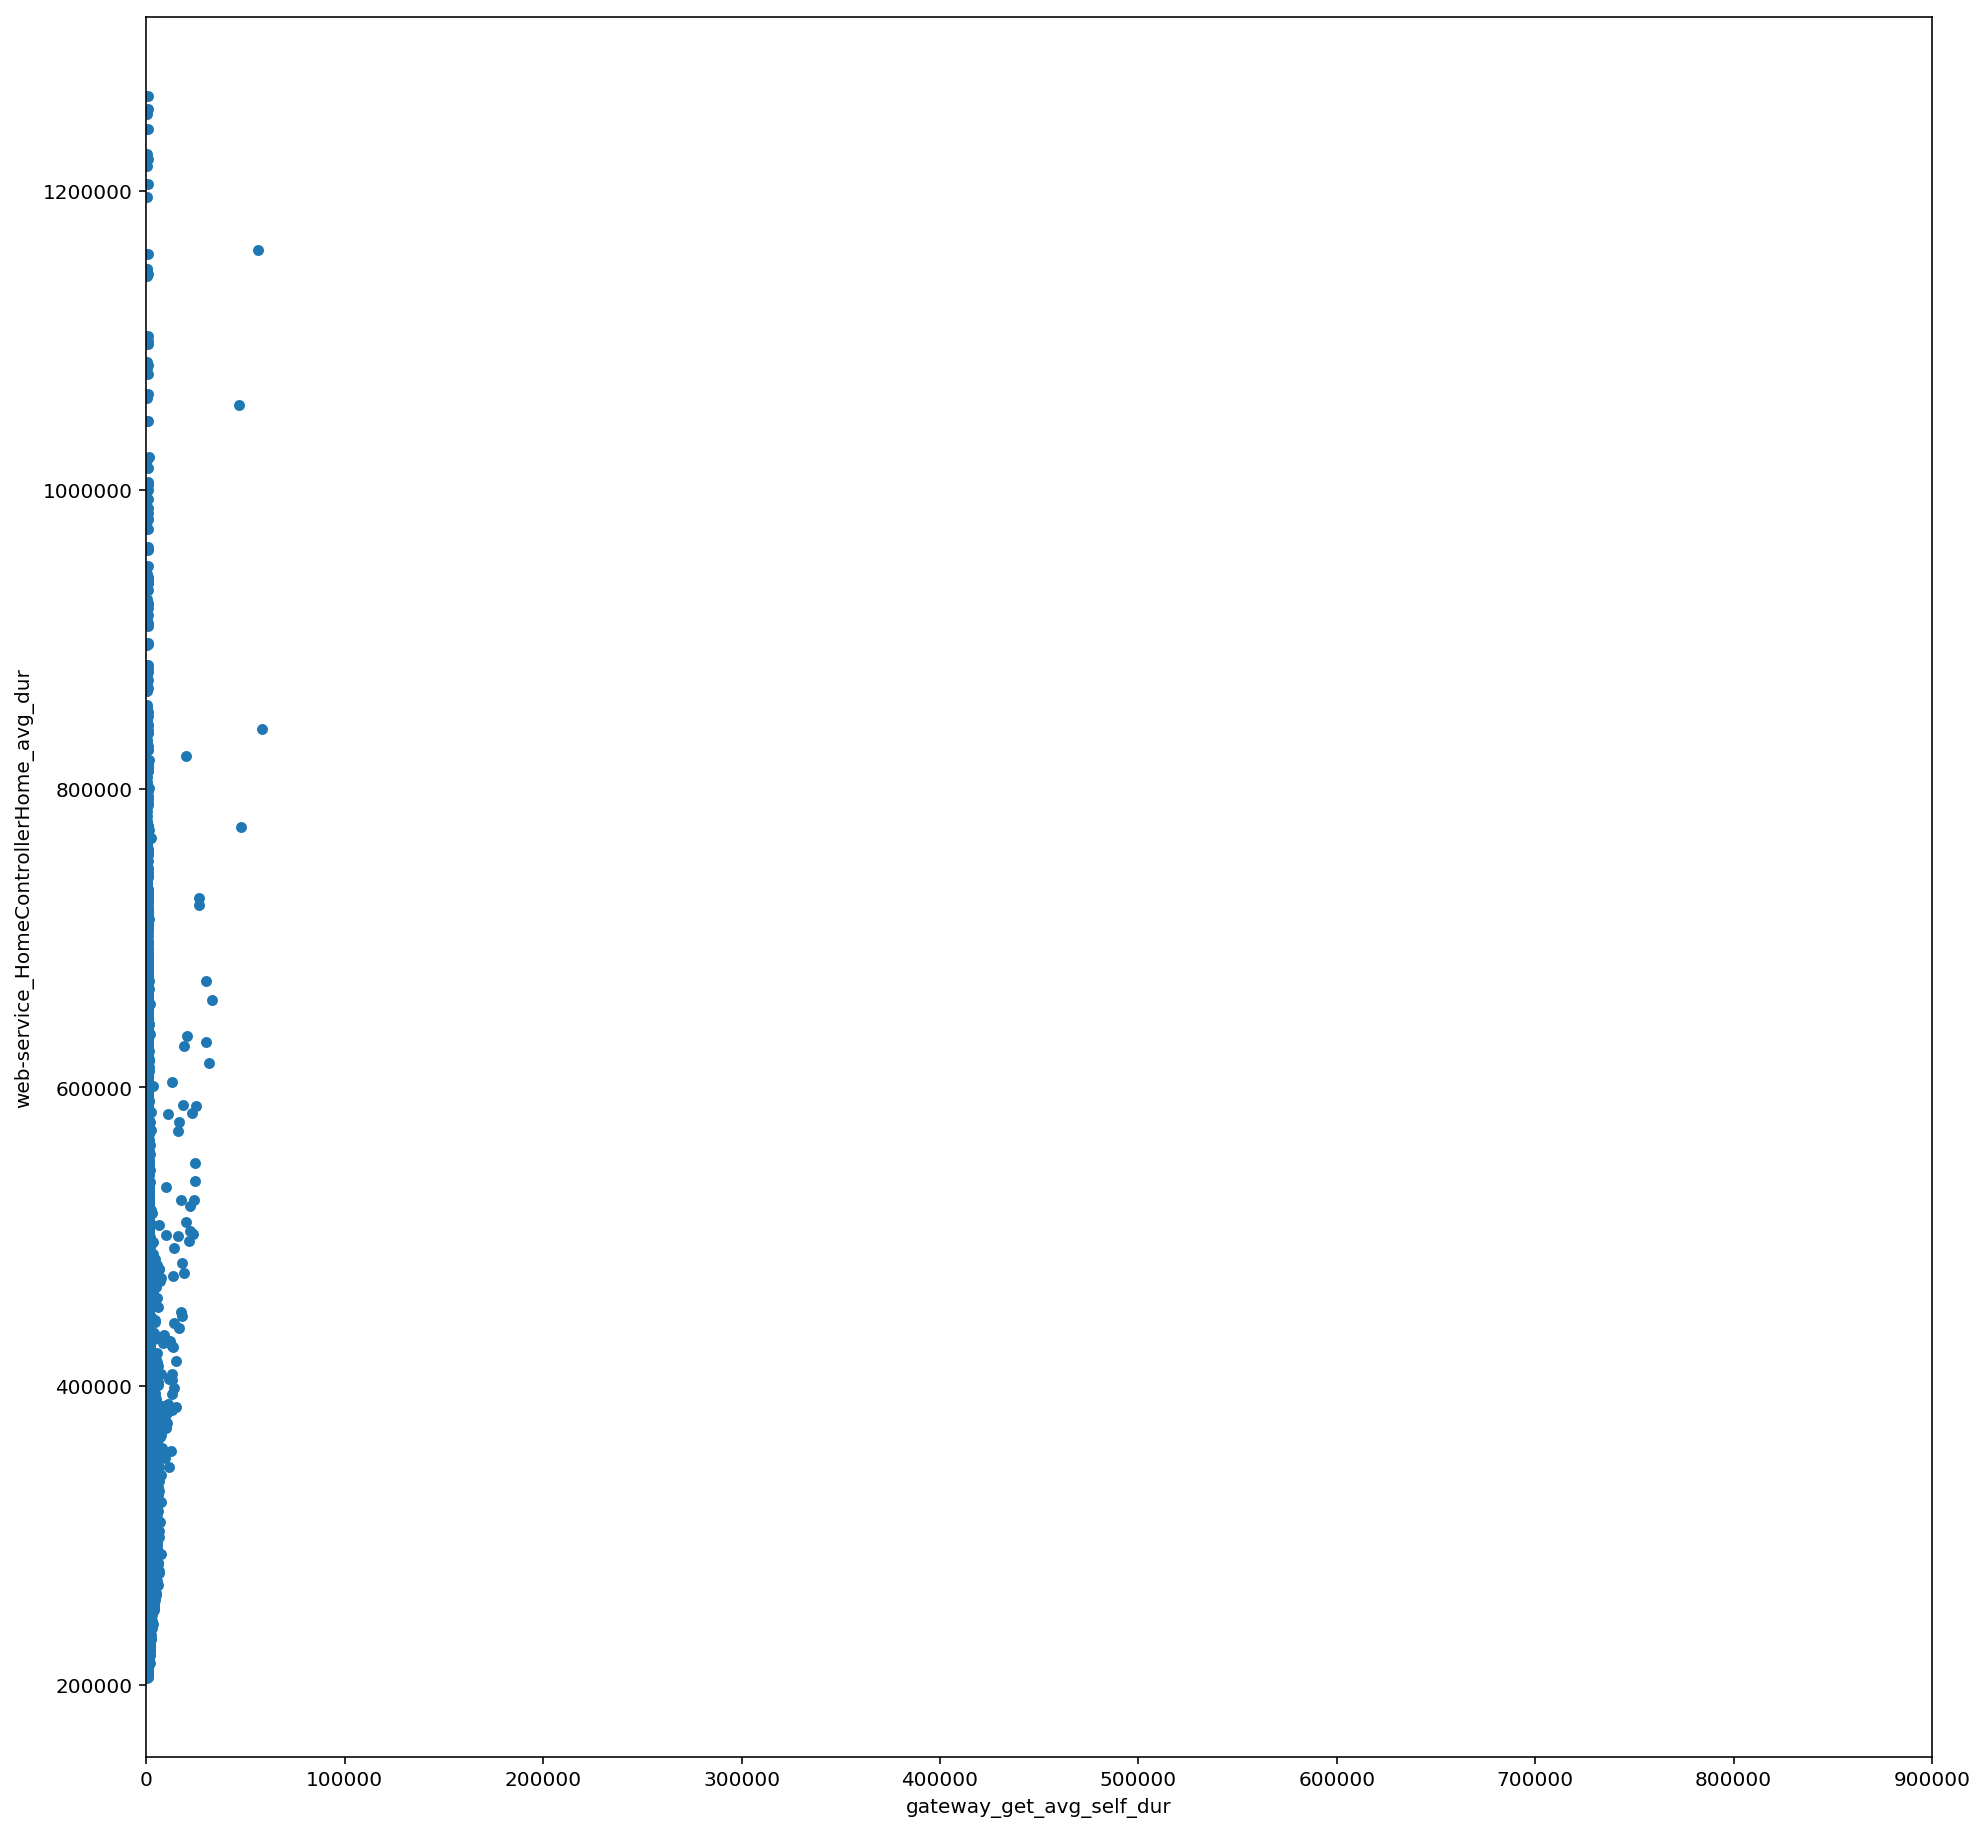

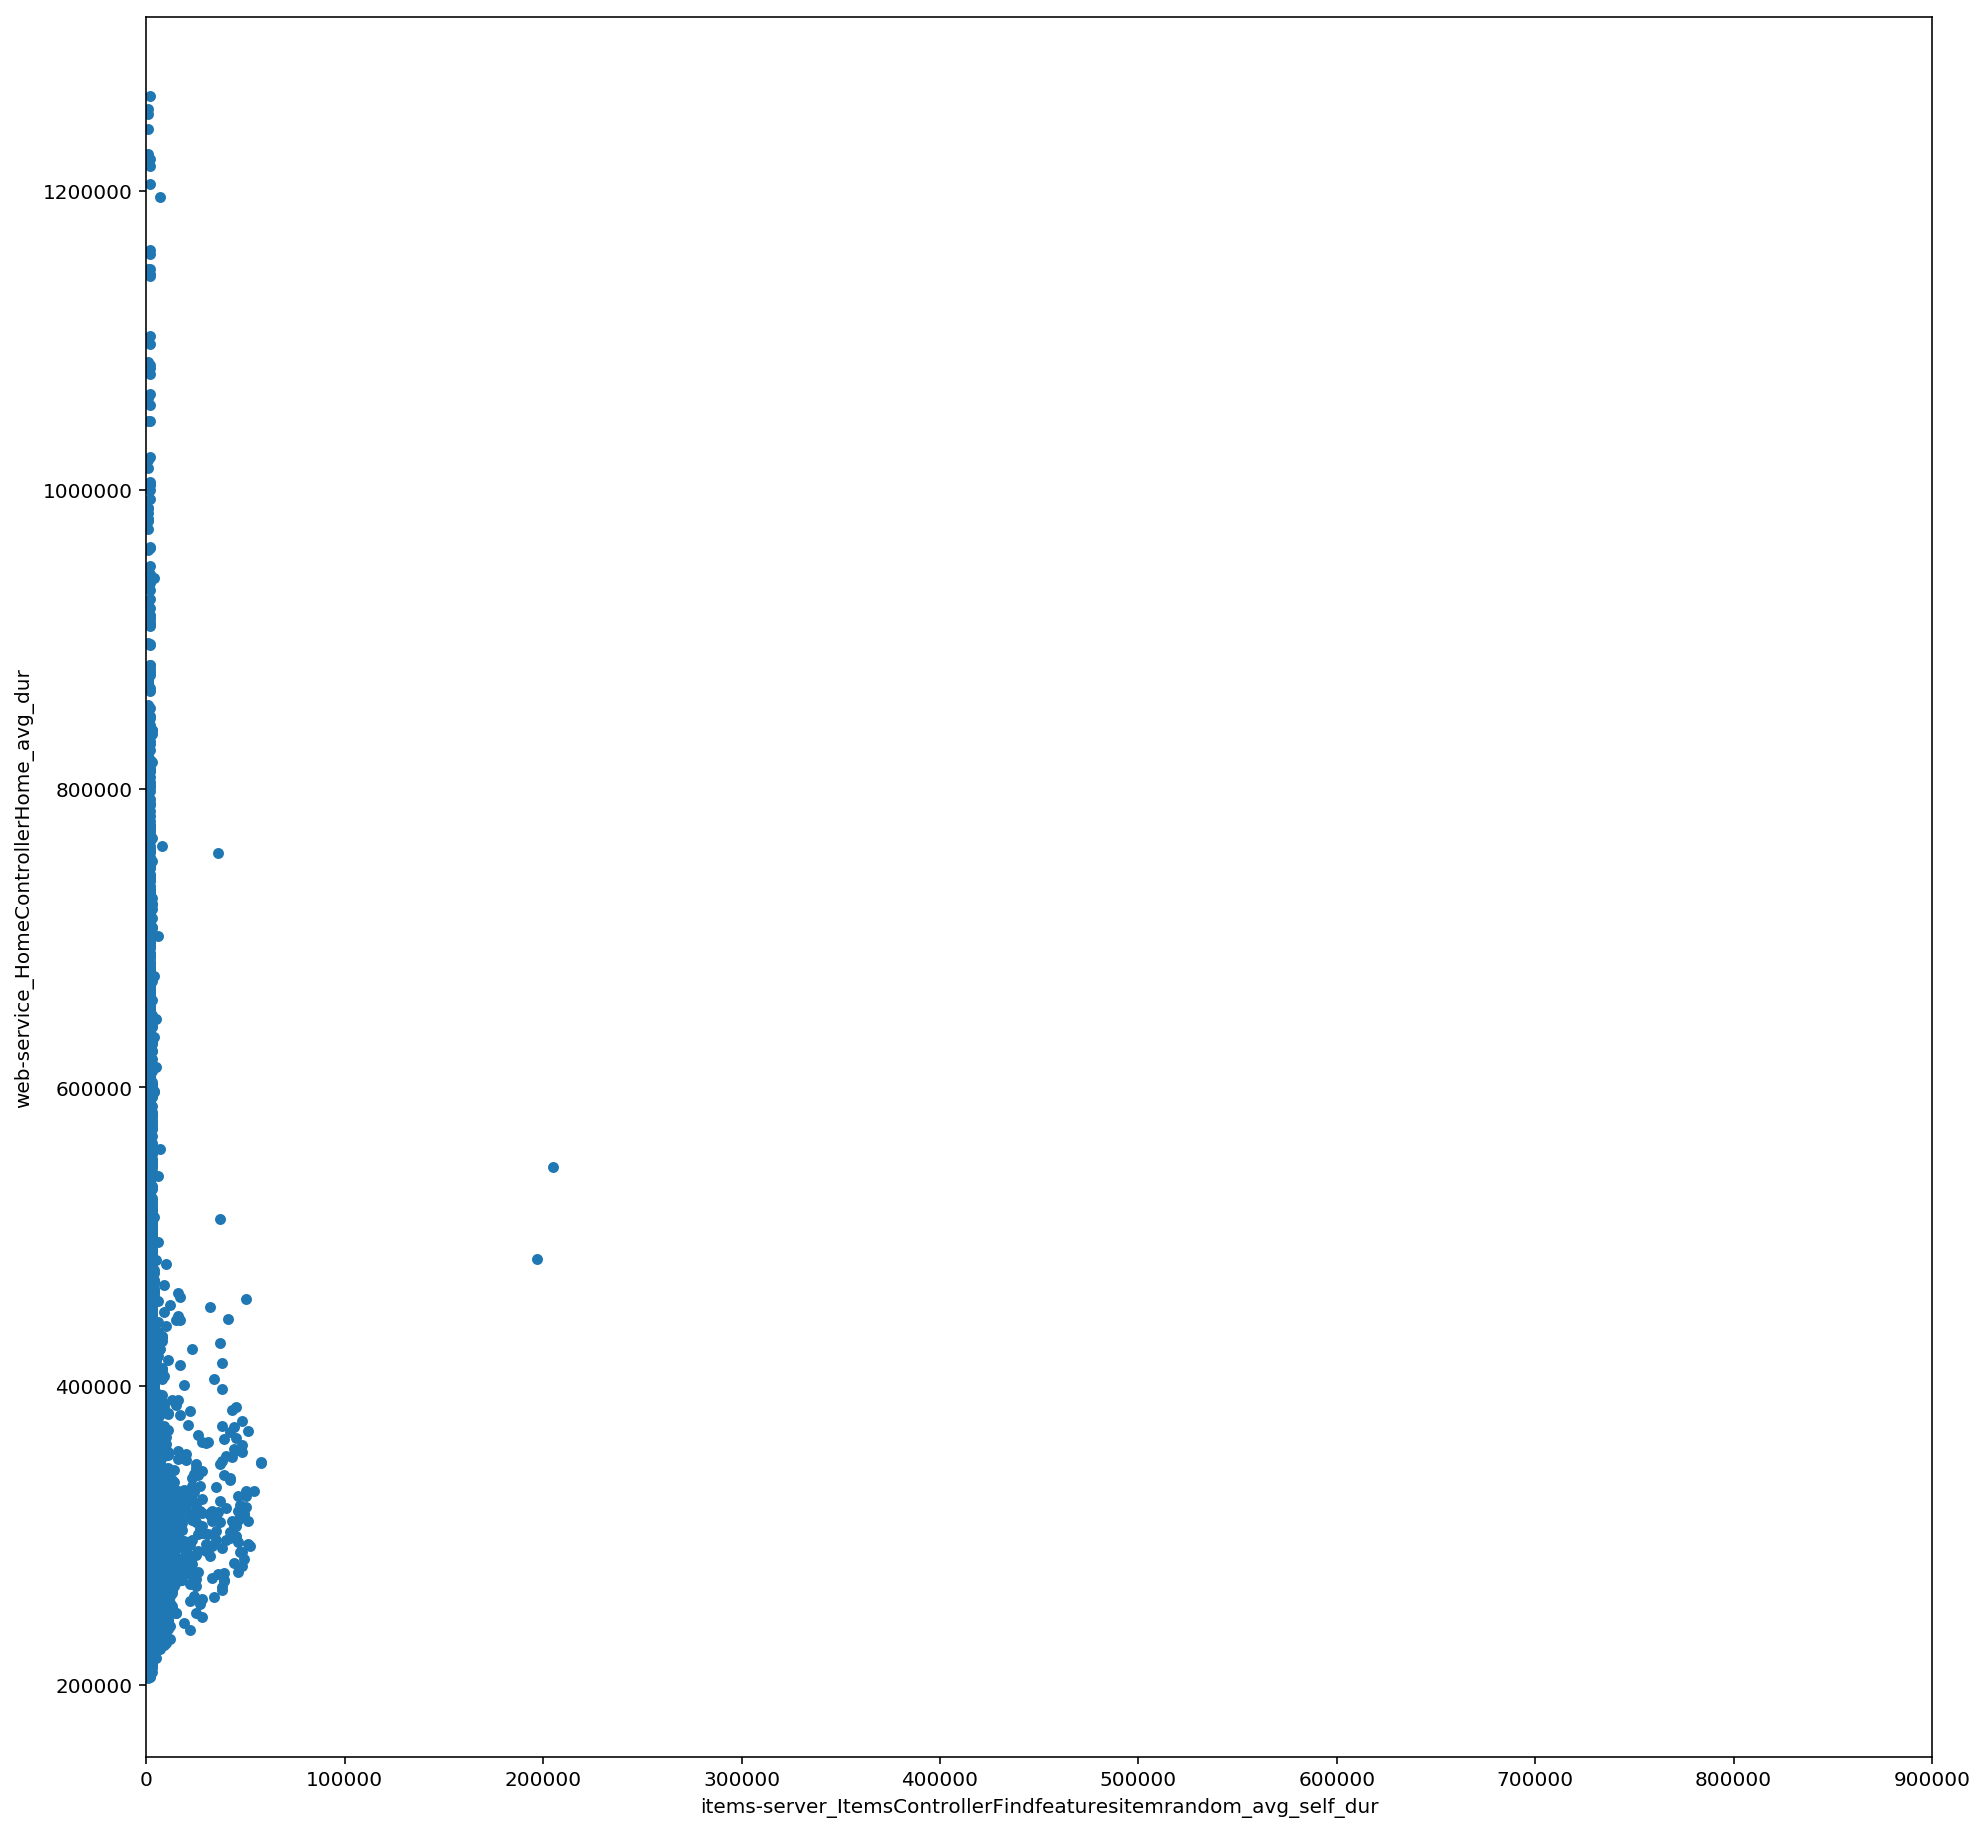

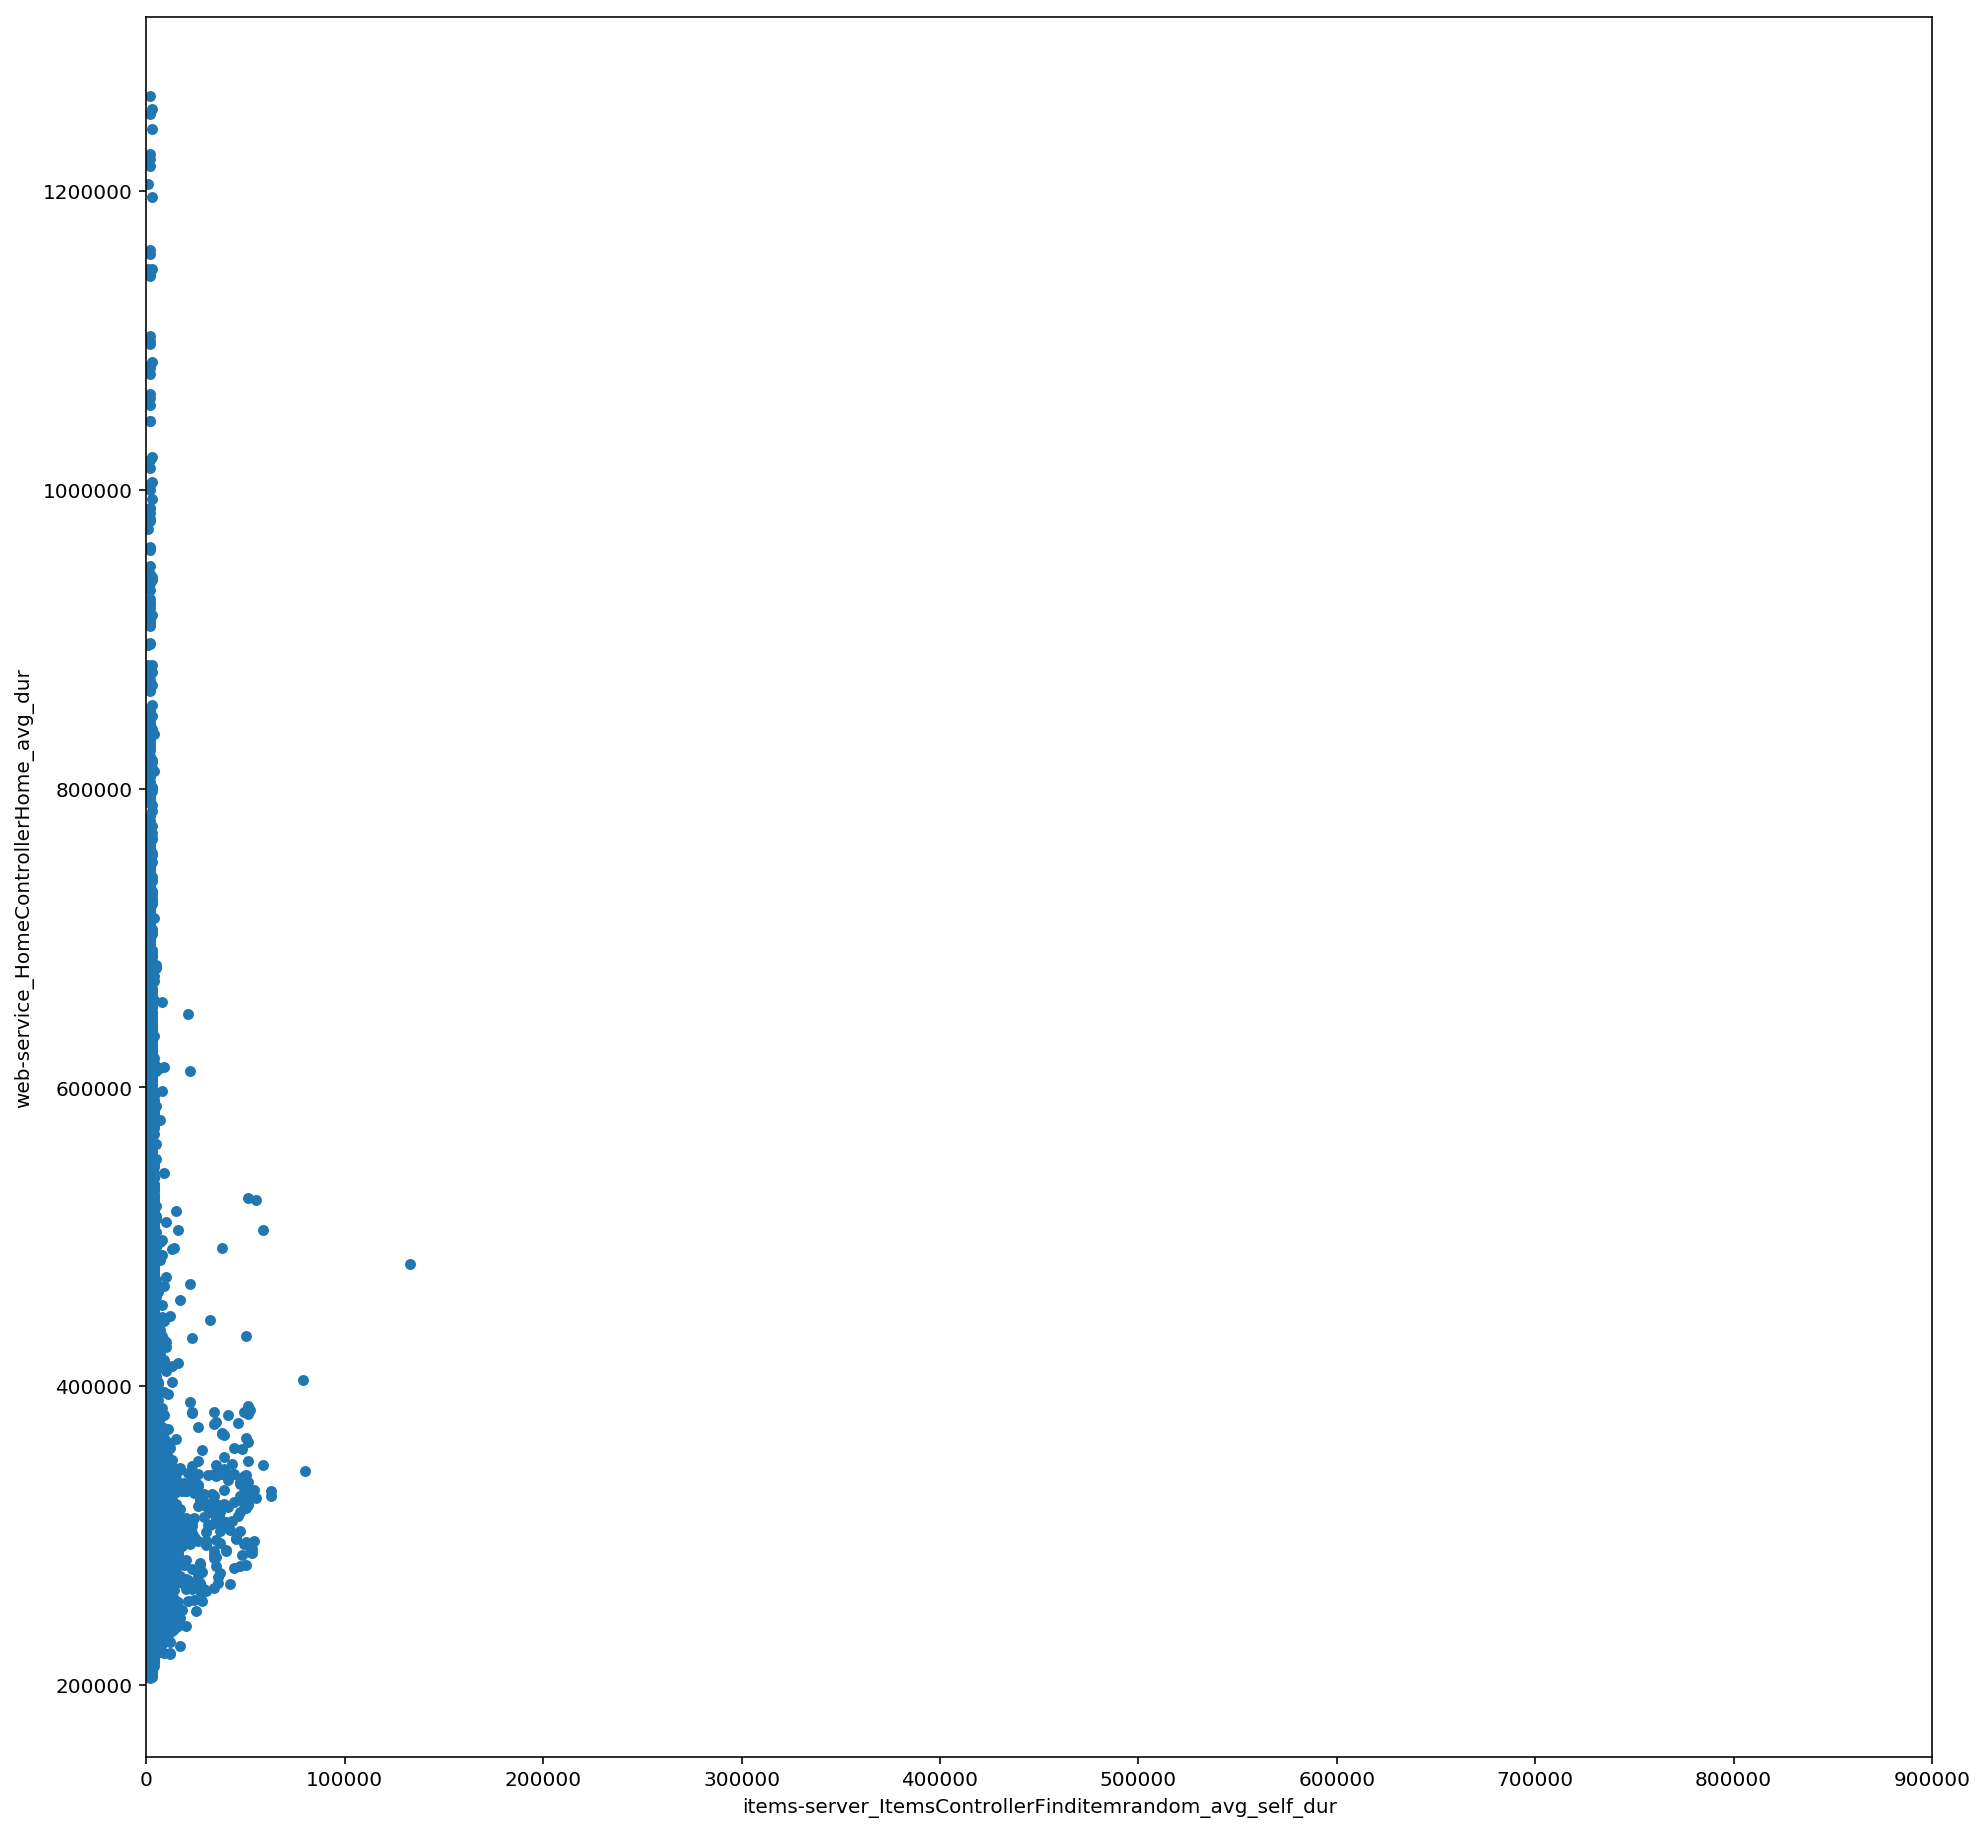

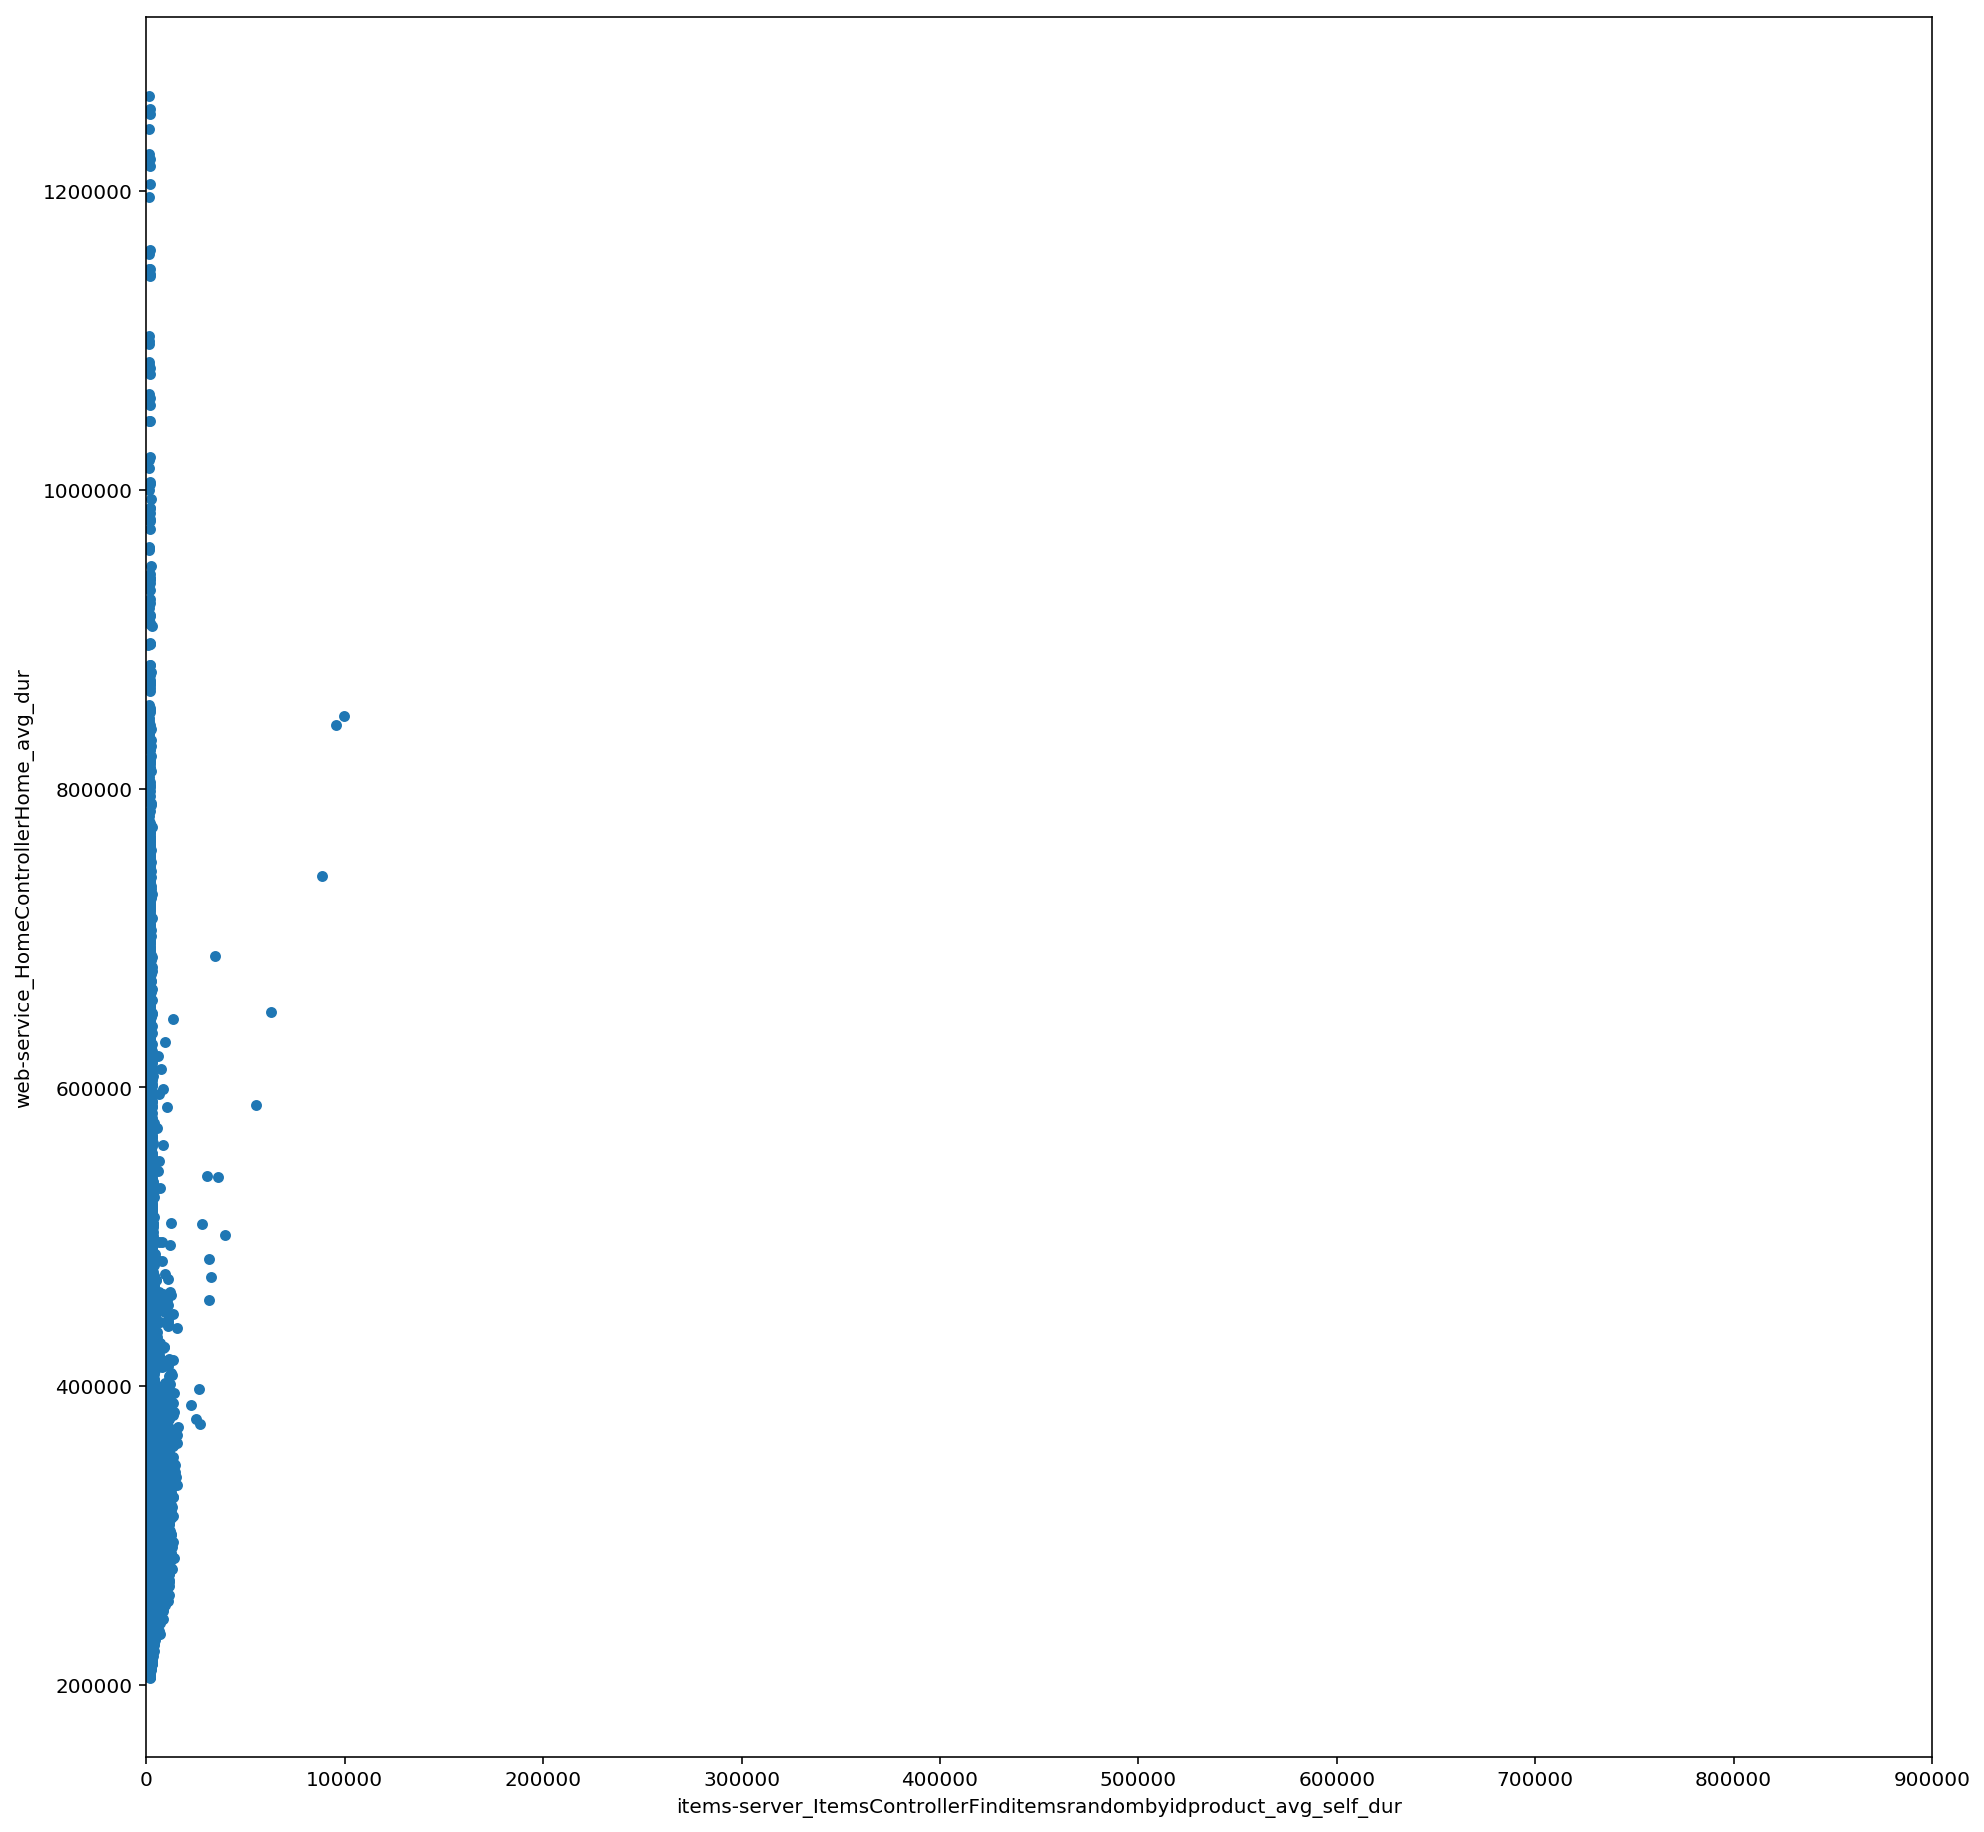

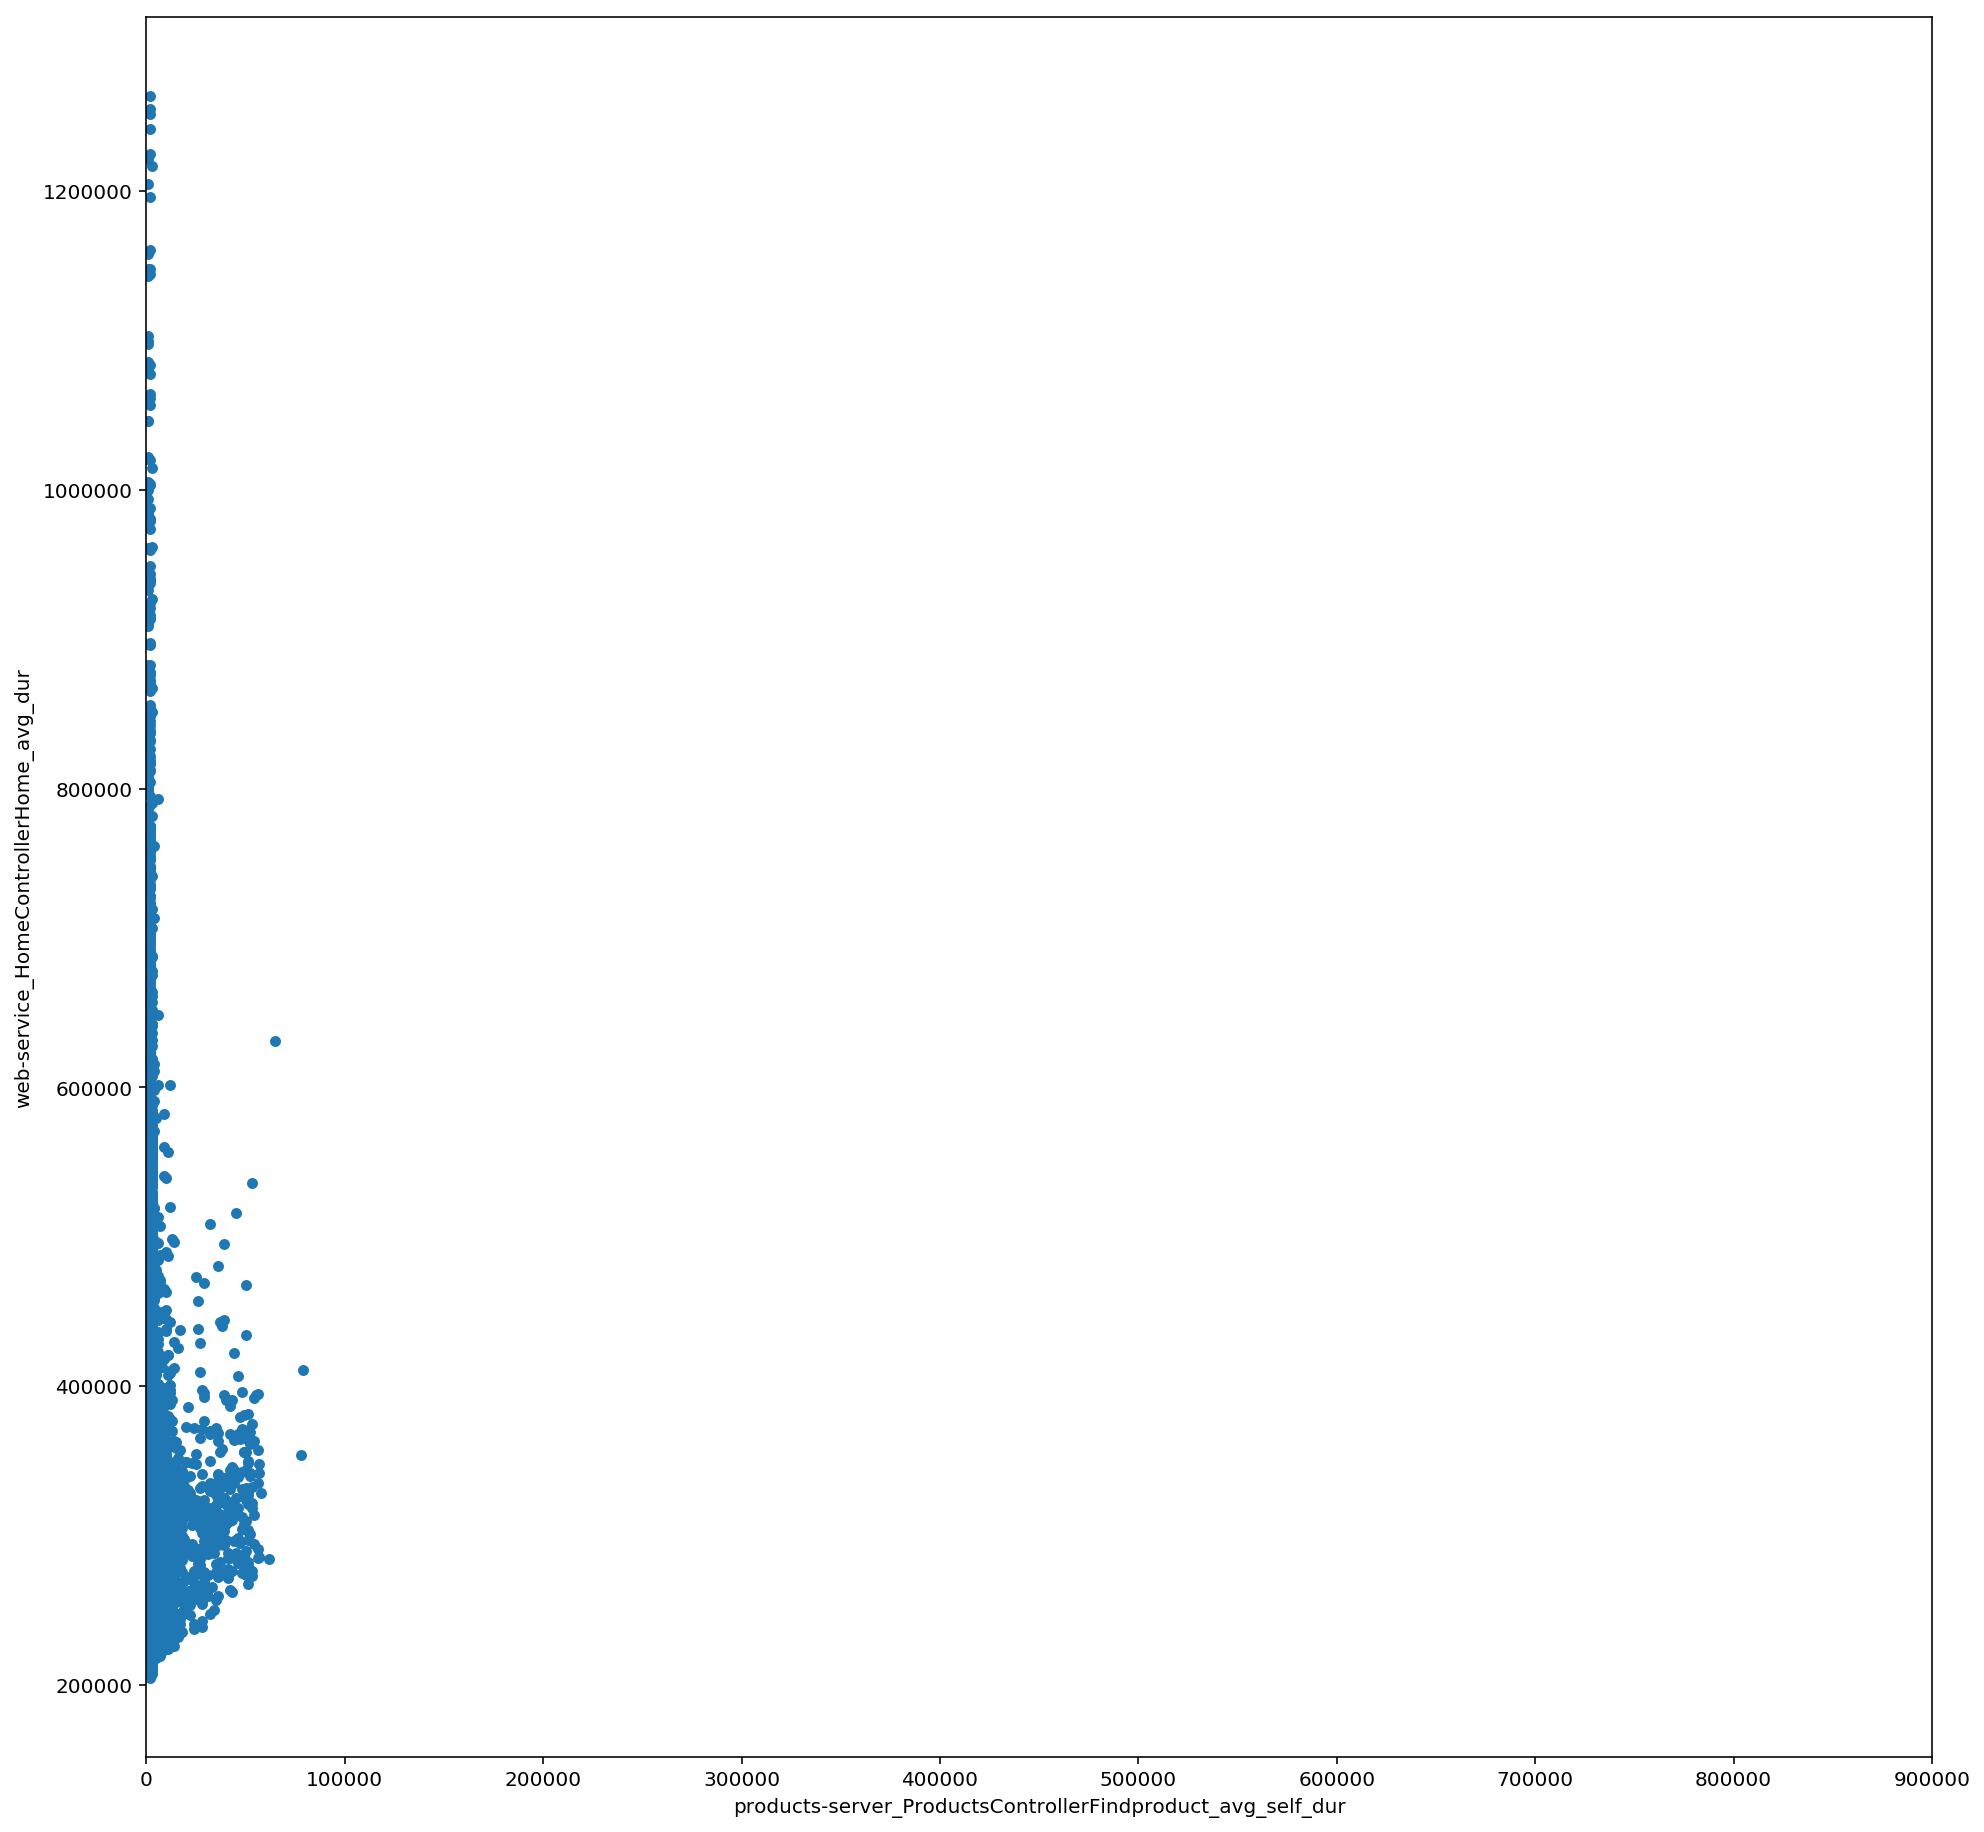

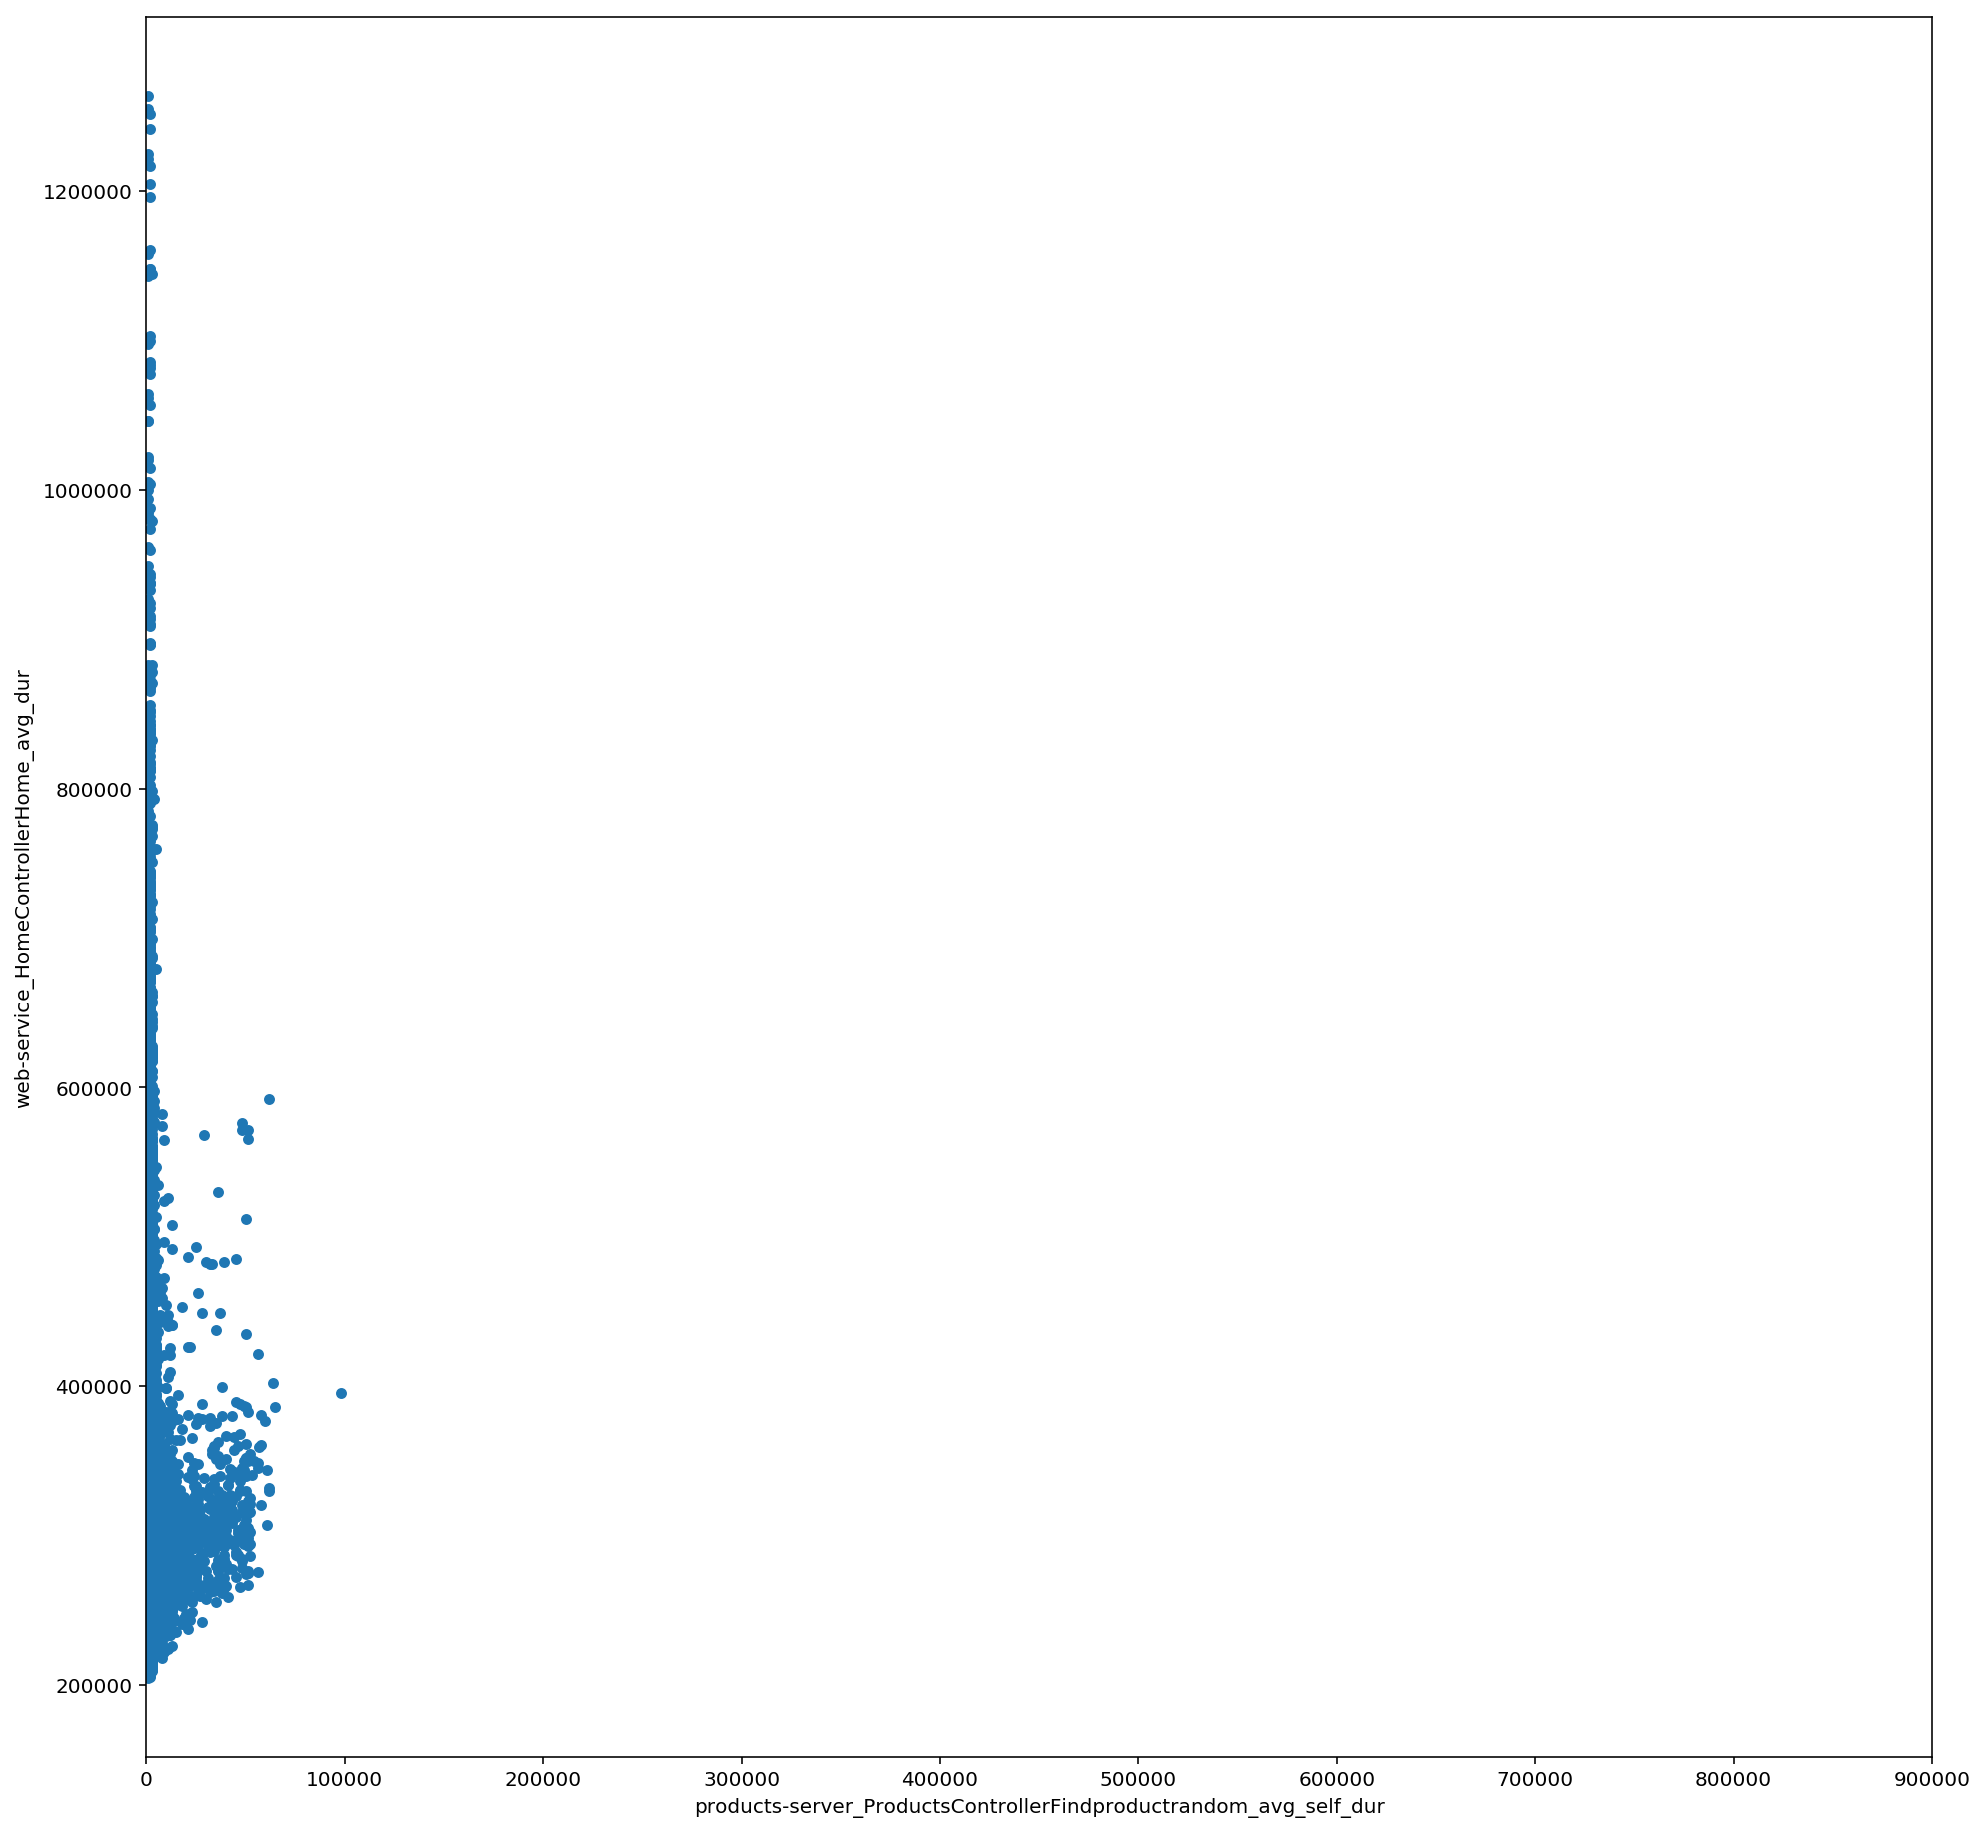

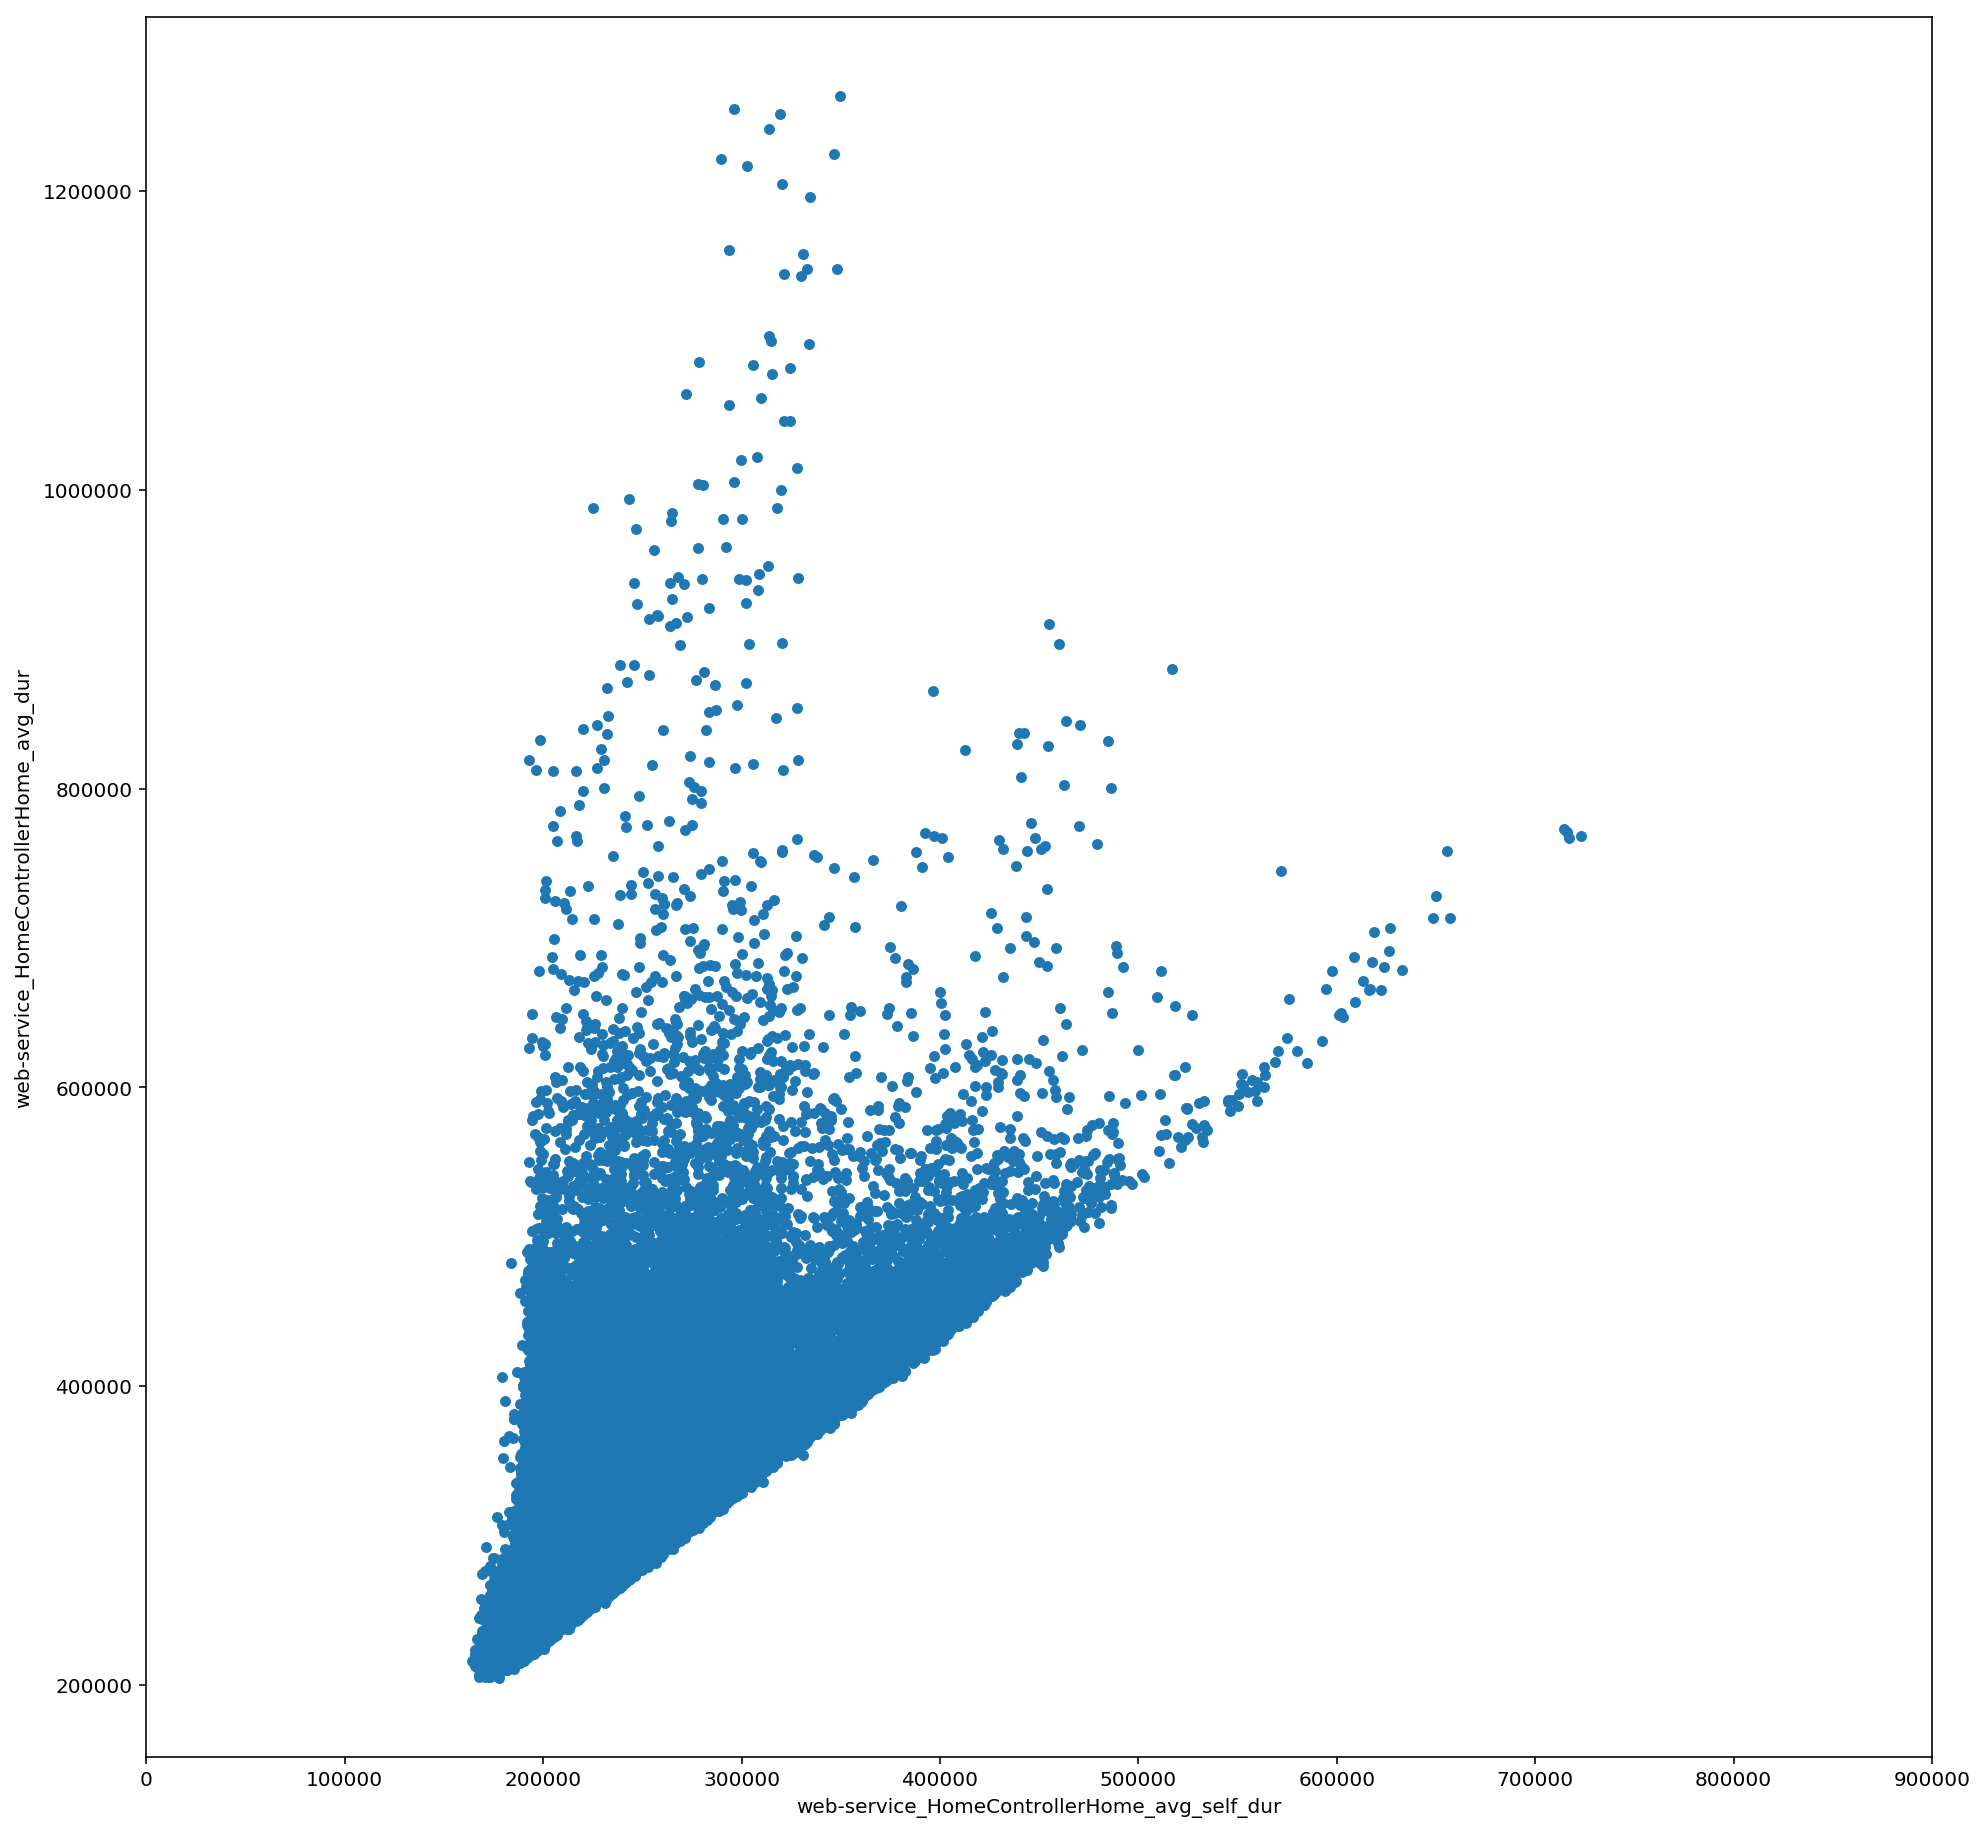

In [11]:
plt.rcParams['figure.figsize'] = (16,16)

for c in filterSelfDurations(traces.columns):
    pd_traces.plot.scatter(x=c, y='web-service_HomeControllerHome_avg_dur',xlim=(0,900000));

In [12]:
plt.rcParams['figure.figsize'] = (16,16)
for c in filterSelfDurations(traces.columns):
        print('Correlation with ',c, ':\n',traces.stat.corr('web-service_HomeControllerHome_avg_dur', c),'\n\n')

Correlation with  categories-server_CategoriesControllerGetcategory_avg_self_dur :
 0.03656721208415289 


Correlation with  gateway_get_avg_self_dur :
 0.08274843699705167 


Correlation with  items-server_ItemsControllerFindfeaturesitemrandom_avg_self_dur :
 0.019433755430786775 


Correlation with  items-server_ItemsControllerFinditemrandom_avg_self_dur :
 0.014227715056824039 


Correlation with  items-server_ItemsControllerFinditemsrandombyidproduct_avg_self_dur :
 0.054186369244355034 


Correlation with  products-server_ProductsControllerFindproduct_avg_self_dur :
 0.018570437529776846 


Correlation with  products-server_ProductsControllerFindproductrandom_avg_self_dur :
 0.03787721759334473 


Correlation with  web-service_HomeControllerHome_avg_self_dur :
 0.7504542970757205 


